<a href="https://colab.research.google.com/github/ocy0581/link_Jolssul/blob/master/python/CreateEVwithGNNv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install mediapipe

In [21]:
import mediapipe as mp
import numpy as np
import time
import cv2

In [22]:
# Prepare DrawingSpec
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Config holistic
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(
    min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 영상 가져오기
cap = cv2.VideoCapture("/content/drive/MyDrive/Video/KETI_SL_0000006020.avi")

# 영상...
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# cap.set(cv2.CAP_PROP_FPS, 1)

total_frames = cap.get(7)
print(total_frames)

print(cap.get(cv2.CAP_PROP_FPS))

frame_rate = 10
prev = 0
i = 0
left_hand_lists = []
right_hand_lists = []
face_lists = []
pose_lists = []

def LandmarkToList(SourceLandmark, parts):
  DstList = []
  if (SourceLandmark):
    for coord in SourceLandmark.landmark:
      DstList.append([coord.x, coord.y, coord.z])
    return DstList
  else:
    if (parts == "hands"):
      for i in range(21):
        DstList.append([0,0,0])
    if (parts == "face"):
      for i in range(468):
        DstList.append([0,0,0])
    if (parts == "pose"):
      for i in range(33):
        DstList.append([0,0,0])
    return DstList

while cap.isOpened():
#     time_elapsed = time.time() - prev
    success, image = cap.read()

#     if time_elapsed > 1./frame_rate:
#         prev = time.time()
        
    if not success:
        print("Ignoring empty camera frame.")
        # If loading a video, use 'break' instead of 'continue'.
        break

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
      image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    left_hand_lists.append(LandmarkToList(results.left_hand_landmarks,"hands"))
    right_hand_lists.append(LandmarkToList(results.right_hand_landmarks,"hands"))
    face_lists.append(LandmarkToList(results.face_landmarks,"face"))
    pose_lists.append(LandmarkToList(results.pose_landmarks,"pose"))
        
#     cv2.imshow('MediaPipe Holistic', image)
#     if cv2.waitKey(5) & 0xFF == ord('q'):
#         break
print(i)
holistic.close()
cap.release()
cv2.destroyAllWindows()

156.0
29.970029
Ignoring empty camera frame.
0


In [23]:
import torch

In [24]:
LeftHandTensor = torch.FloatTensor(left_hand_lists)
RightHandTensor = torch.FloatTensor(right_hand_lists)
FaceTensor = torch.FloatTensor(face_lists)
poseTensor = torch.FloatTensor(pose_lists)

print(LeftHandTensor.shape, RightHandTensor.shape, FaceTensor.shape, poseTensor.shape)

torch.Size([156, 21, 3]) torch.Size([156, 21, 3]) torch.Size([156, 468, 3]) torch.Size([156, 33, 3])


In [25]:
mp_holistic.FACE_CONNECTIONS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

## Edge Index 추출

In [26]:
mp_holistic.HAND_CONNECTIONS

frozenset({(<HandLandmark.WRIST: 0>, <HandLandmark.THUMB_CMC: 1>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.INDEX_FINGER_MCP: 5>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.PINKY_MCP: 17>),
           (<HandLandmark.THUMB_CMC: 1>, <HandLandmark.THUMB_MCP: 2>),
           (<HandLandmark.THUMB_MCP: 2>, <HandLandmark.THUMB_IP: 3>),
           (<HandLandmark.THUMB_IP: 3>, <HandLandmark.THUMB_TIP: 4>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.INDEX_FINGER_PIP: 6>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.MIDDLE_FINGER_MCP: 9>),
           (<HandLandmark.INDEX_FINGER_PIP: 6>,
            <HandLandmark.INDEX_FINGER_DIP: 7>),
           (<HandLandmark.INDEX_FINGER_DIP: 7>,
            <HandLandmark.INDEX_FINGER_TIP: 8>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.MIDDLE_FINGER_PIP: 10>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.RING_FINGER_MCP:

In [27]:
def ConvertEdgeIndex(target,is_face = False):
  if (is_face == False): #Pose나 Hands이면
    EdgeIdx = [[x[0].value, x[1].value] for x in target]
  else: # Face이면
    EdgeIdx = [list(x) for x in target]
  EdgeIdx = sorted(EdgeIdx) #정렬
  reverse_edge_index = [list(reversed(x)) for x in EdgeIdx]
  #비방향성 그래프를 위해서 리스트를 뒤집어서 추가, ex) 0->1이 있으면 1->0도 존재해야함
  CreatedEdgeIndex = EdgeIdx + reverse_edge_index
  return sorted(CreatedEdgeIndex)

In [28]:
PoseEdgeIndex = ConvertEdgeIndex(mp_holistic.POSE_CONNECTIONS)
HandsEdgeIndex = ConvertEdgeIndex(mp_holistic.HAND_CONNECTIONS)
FaceEdgeIndex = ConvertEdgeIndex(mp_holistic.FACE_CONNECTIONS,is_face=True)
#Pose와 Hands와는 다른 형태

## 그래프 그리기 & GNN 활용 임베딩

In [29]:
#필요한 패키지 설치
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

In [30]:
from torch_geometric.data import Data

In [31]:
#LeftHandEdgeTensor.dtype
#타입 확인

In [32]:
#TransposedHandEdge.shape

In [33]:
LeftHandEdgeTensor = torch.LongTensor(HandsEdgeIndex)
#엣지 인덱스는 LongTensor여야 함!

In [34]:
#RightHandEdgeTensor = LeftHandEdgeTensor.add(21)
#HandEdgeIndex = torch.cat([LeftHandEdgeTensor, RightHandEdgeTensor],dim=0)
#print(HandEdgeIndex.shape)
RightHandEdgeTensor = torch.LongTensor(HandsEdgeIndex)
print(RightHandEdgeTensor.shape)

torch.Size([42, 2])


In [35]:
#HandTensor =torch.cat([LeftHandTensor,RightHandTensor],dim=1)

In [36]:
LeftHandTensor.shape

torch.Size([156, 21, 3])

In [37]:
#train_mask, 일단은 모든 노드를 train에 활용
HandTrainMask = torch.BoolTensor([True]*LeftHandTensor.shape[1])
#HandTrainMask = torch.BoolTensor([True]*HandTensor.shape[1])
PoseTrainMask = torch.BoolTensor([True]*poseTensor.shape[1])
FaceTrainMask = torch.BoolTensor([True]*FaceTensor.shape[1])

In [38]:
HandTrainMask.shape

torch.Size([21])

In [39]:
#추가적인 edge_index 생성
TransposedHandEdge = torch.transpose(LeftHandEdgeTensor,0,1)
#한번 Transpose 시켜줌, Edge index의 shape은 2,node 여야함
#TransposedHandEdge = torch.transpose(HandEdgeIndex,0,1)
PoseEdgeIndexTensor = torch.LongTensor(PoseEdgeIndex)
FaceEdgeIndexTensor = torch.LongTensor(FaceEdgeIndex)
TransPosedPoseEdge = torch.transpose(PoseEdgeIndexTensor,0,1)
TransPosedFaceEdge = torch.transpose(FaceEdgeIndexTensor,0,1)

In [40]:
# 첫 번째 접근, 각 노드를 클래스로 생각, 즉 33개의 노드 == 33개의 클래스
HandY = torch.LongTensor([i for i in range(LeftHandTensor.shape[1])])
#HandY = torch.LongTensor([i for i in range(HandTensor.shape[1])])
PoseY = torch.LongTensor([i for i in range(poseTensor.shape[1])])
FaceY = torch.LongTensor([i for i in range(FaceTensor.shape[1])])

In [41]:
#임의의 한 프레임에서 그래프를 추출
#데이터를 그려주고 활용하기 위해서 pytorch geometric의 Data를 활용해 Data object를 생성
LeftHandData = Data(x=LeftHandTensor[100],edge_index=TransposedHandEdge,y=HandY, train_mask = HandTrainMask)
RightHandData = Data(x=RightHandTensor[100],edge_index=TransposedHandEdge,y=HandY, train_mask = HandTrainMask)
#HandData = Data(x=HandTensor[100],edge_index=TransposedHandEdge,y=HandY, train_mask = HandTrainMask)
PoseData = Data(x=poseTensor[100],edge_index=TransPosedPoseEdge, y=PoseY, train_mask = PoseTrainMask)
FaceData = Data(x=FaceTensor[100],edge_index=TransPosedFaceEdge, y=FaceY, train_mask=FaceTrainMask)

In [42]:
from torch_geometric.utils import to_networkx

In [43]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
def visualize(h, color="red", epoch=None, loss=None): #그래프를 matplotlib을 활용하여 출력하는 함수
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [45]:
LeftHandG = to_networkx(LeftHandData, to_undirected=True)
RightHandG = to_networkx(RightHandData, to_undirected=True)
#HandG = to_networkx(HandData, to_undirected=True)
PoseG = to_networkx(PoseData,to_undirected=True)
FaceG = to_networkx(FaceData, to_undirected=True)

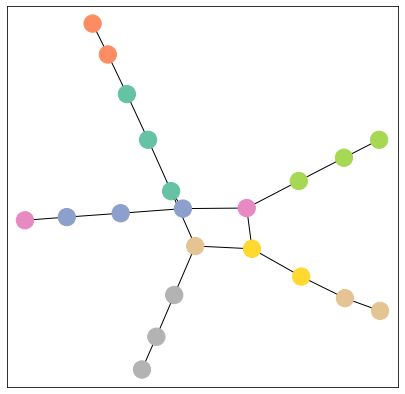

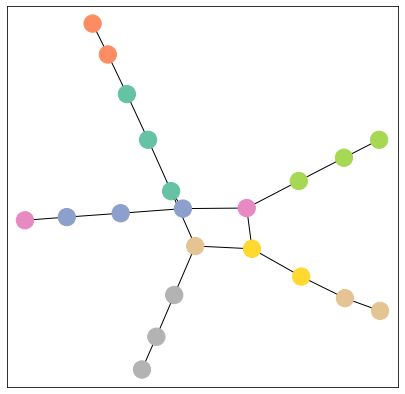

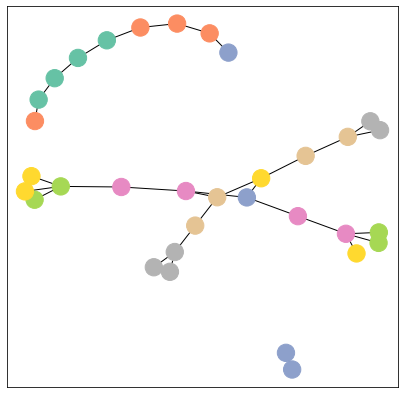

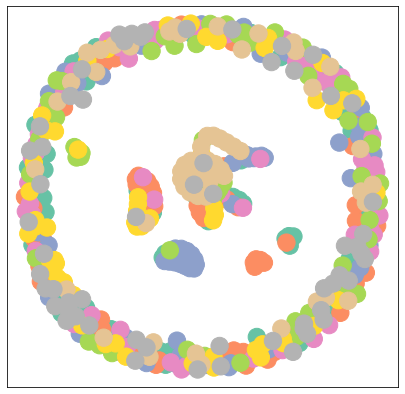

In [46]:
#Graph Visualize
visualize(LeftHandG,color=LeftHandData.y)
visualize(RightHandG,color=RightHandData.y)
#visualize(HandG,color=HandData.y)
visualize(PoseG,color=PoseData.y)
visualize(FaceG,color=FaceData.y)

## GCN 모델 생성

In [47]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv, GraphConv

num_features = 3

class GCN(torch.nn.Module):
    def __init__(self,parts):
        super(GCN, self).__init__()
        torch.manual_seed(42)
        self.conv1 = GraphConv(num_features, 256)
        self.conv2 = GraphConv(256, 128)
        self.conv3 = GraphConv(128, 128)
        self.conv4 = GraphConv(128, 128)
        self.classifier = Linear(128 ,parts.shape[1])

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        h = self.conv4(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN(LeftHandTensor)
print(model)

GCN(
  (conv1): GraphConv(3, 256)
  (conv2): GraphConv(256, 128)
  (conv3): GraphConv(128, 128)
  (conv4): GraphConv(128, 128)
  (classifier): Linear(in_features=128, out_features=21, bias=True)
)


### LeftHand

Embedding shape: [21, 128]


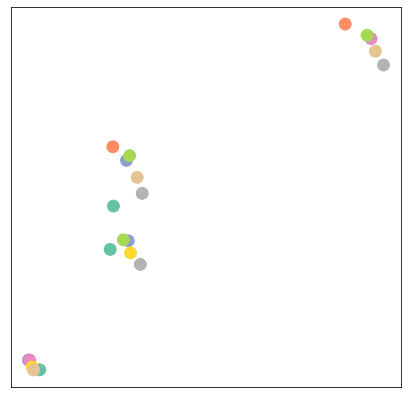

In [48]:
model = GCN(LeftHandTensor)

_, h = model(LeftHandData.x, LeftHandData.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=LeftHandData.y)

### RightHand

Embedding shape: [21, 128]


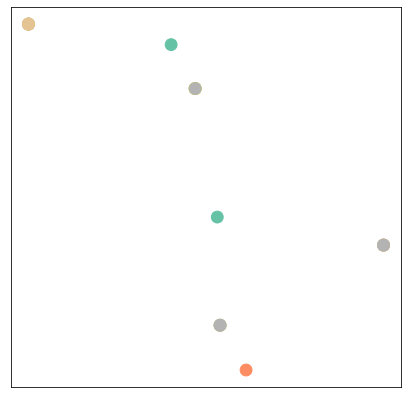

In [49]:
model = GCN(RightHandTensor)

_, h = model(RightHandData.x, RightHandData.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=RightHandData.y)

### Pose

Embedding shape: [33, 128]


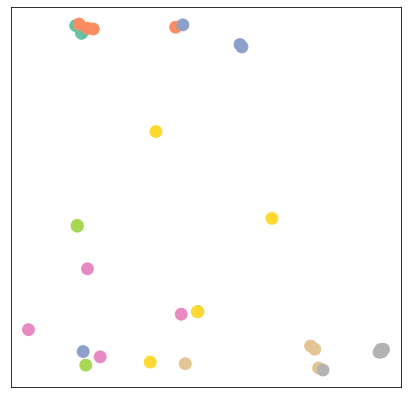

In [50]:
model = GCN(poseTensor)

_, h = model(PoseData.x, PoseData.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=PoseData.y)

### Face

Embedding shape: [468, 128]


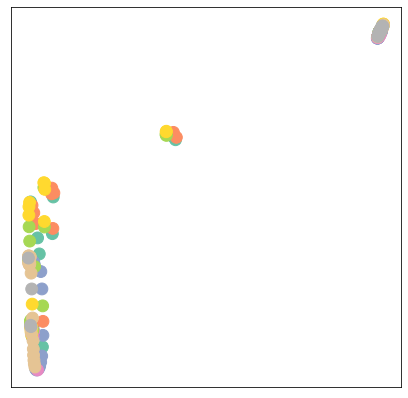

In [51]:
model = GCN(FaceTensor)

_, h = model(FaceData.x, FaceData.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=FaceData.y)

## Training

In [52]:
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

### 1. Left Hand Training

<IPython.core.display.Javascript object>

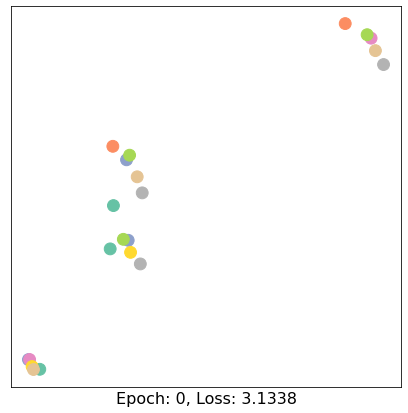

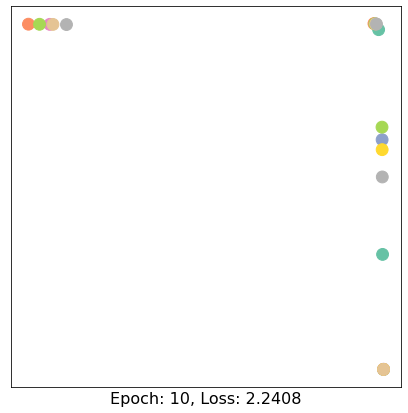

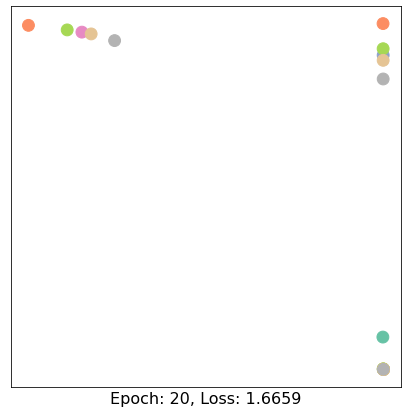

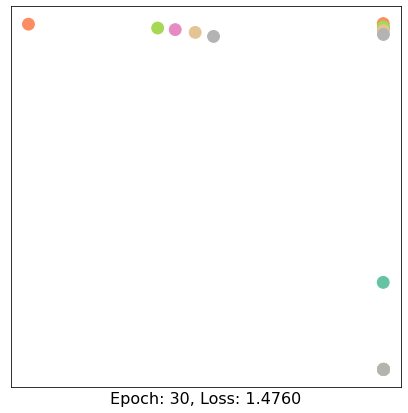

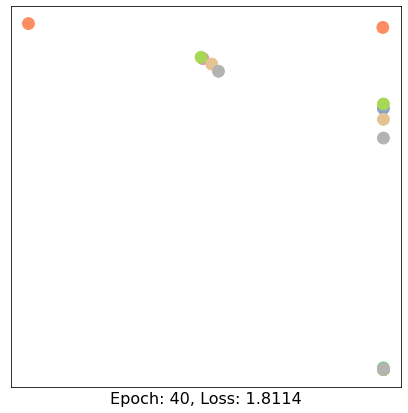

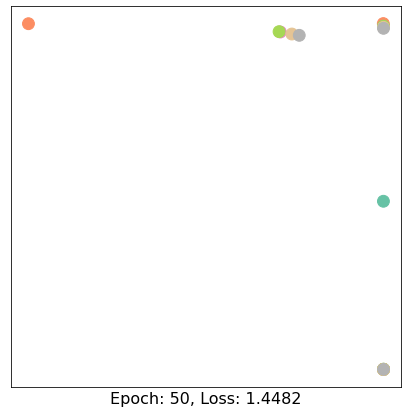

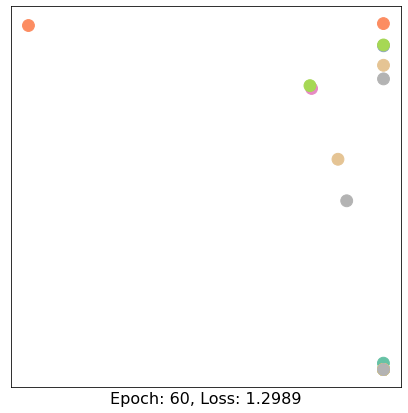

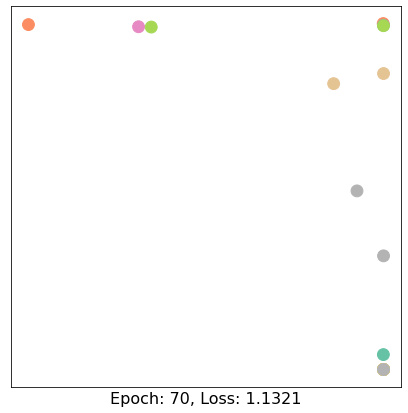

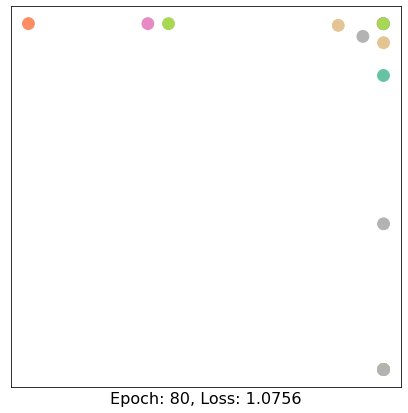

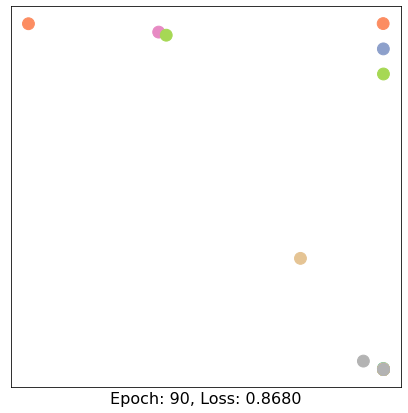

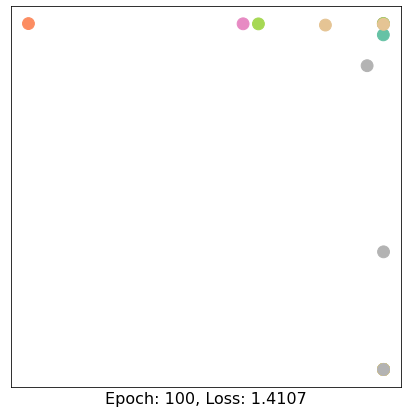

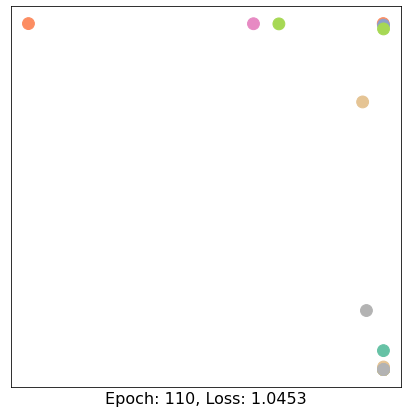

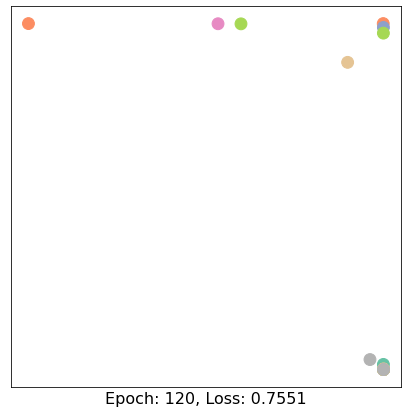

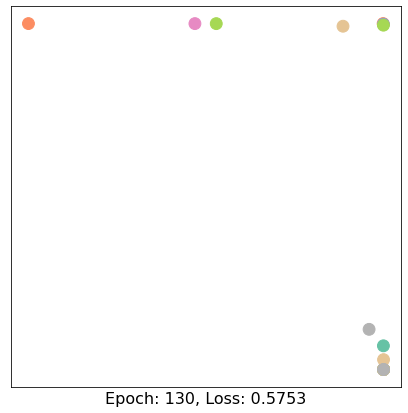

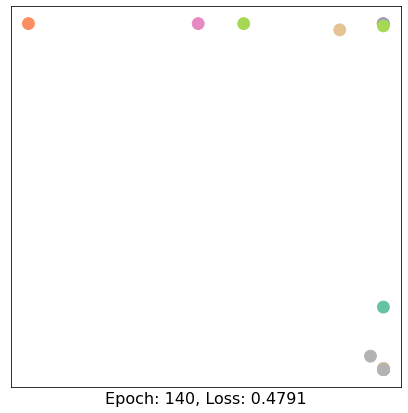

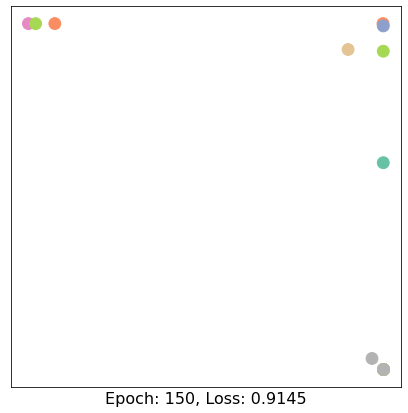

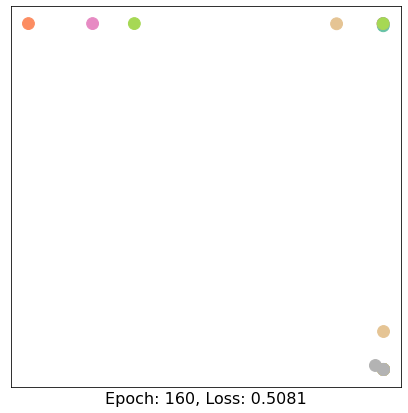

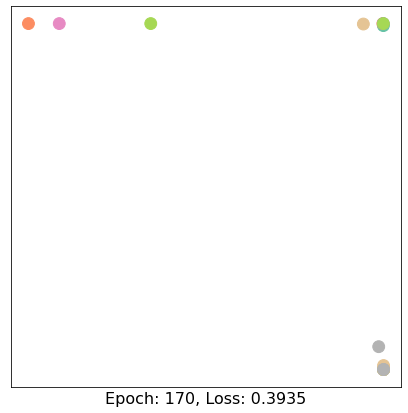

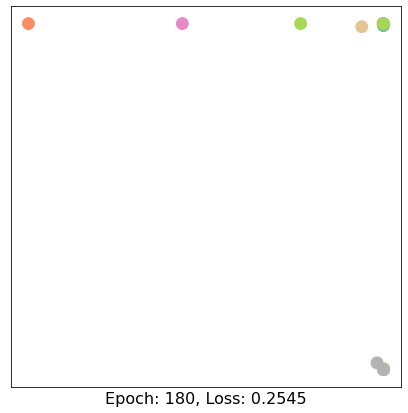

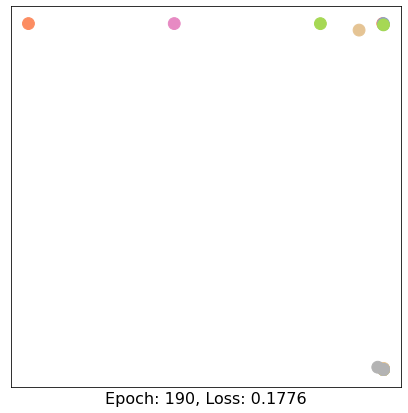

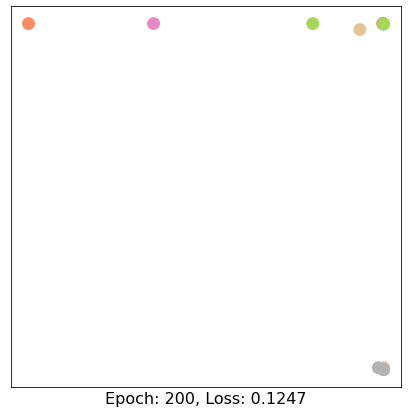

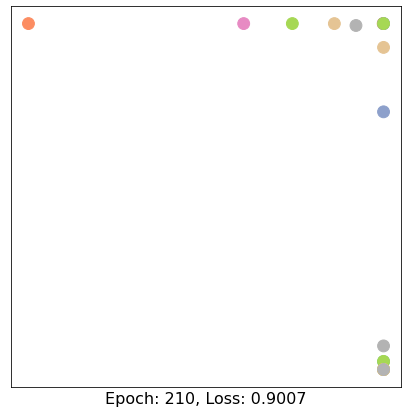

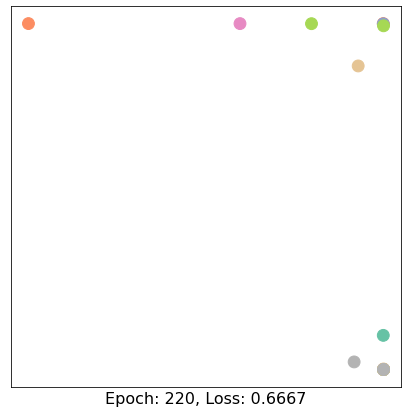

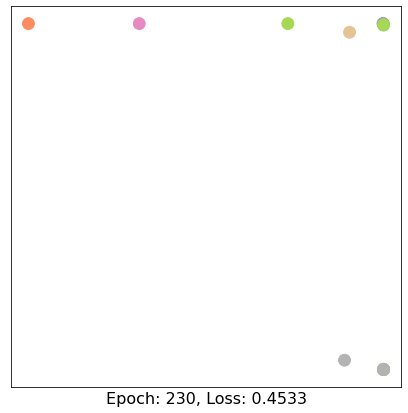

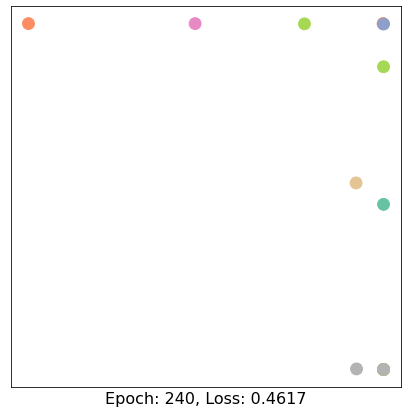

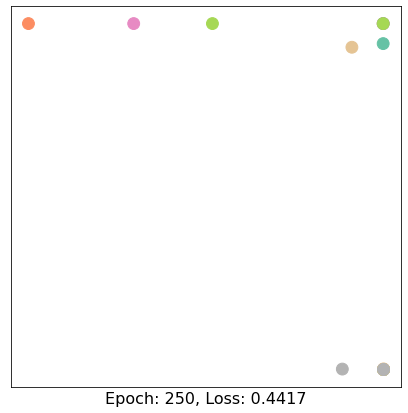

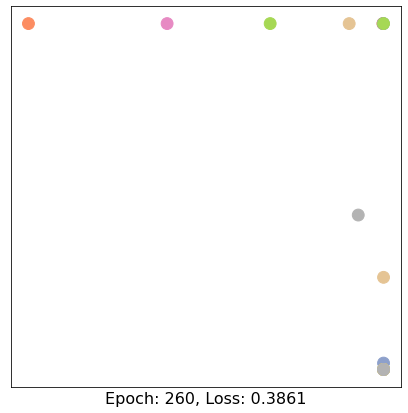

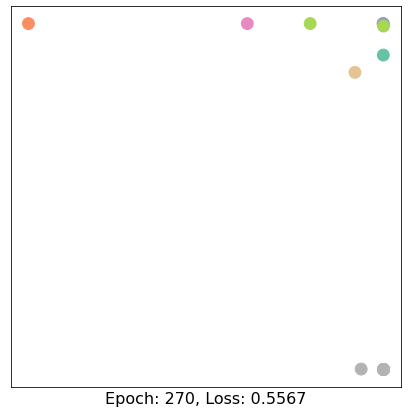

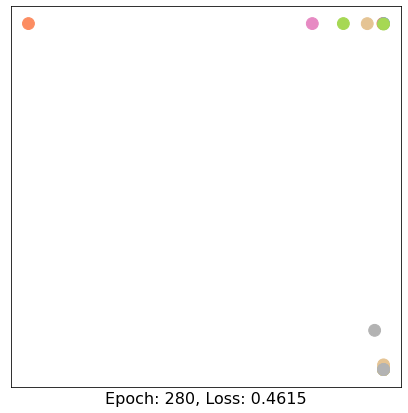

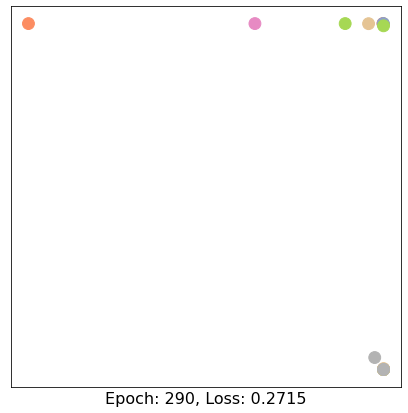

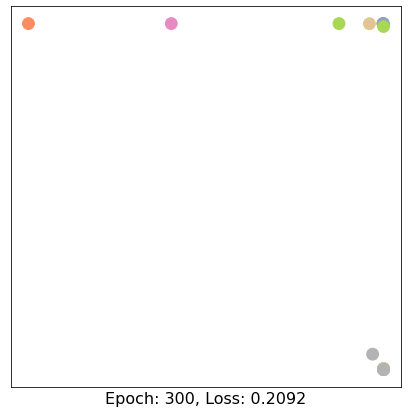

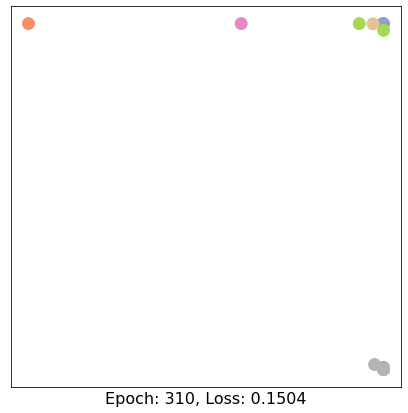

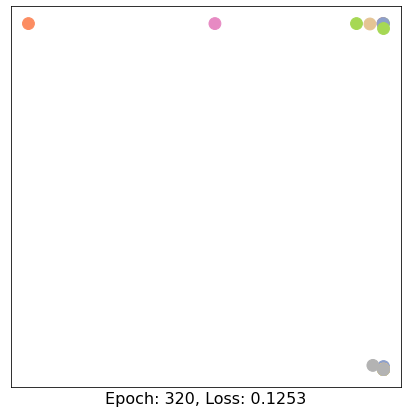

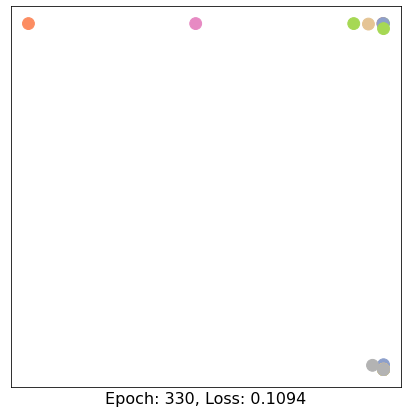

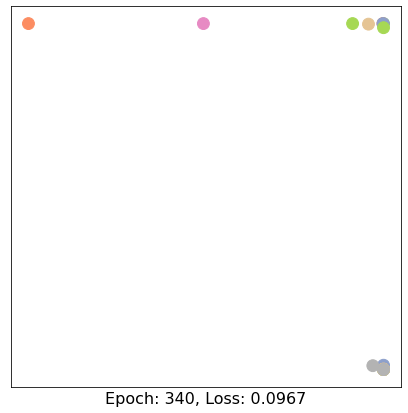

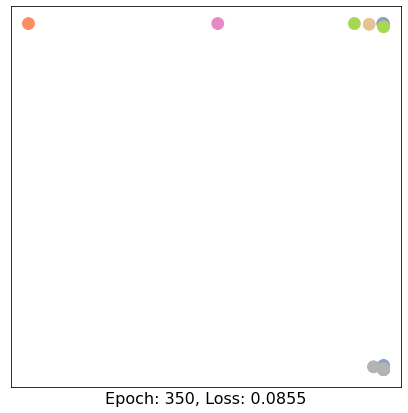

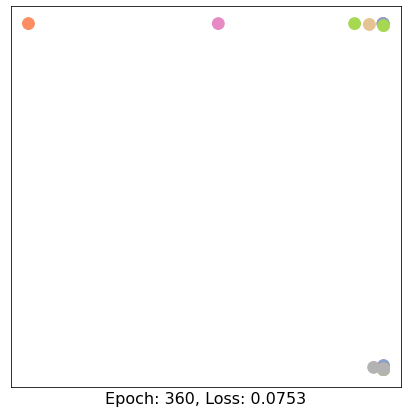

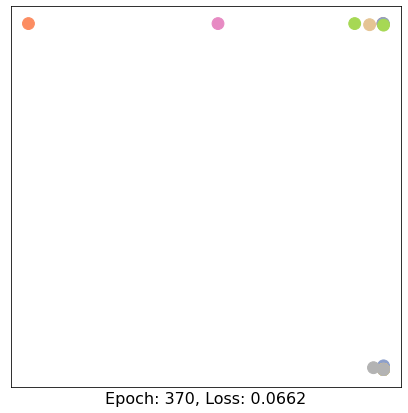

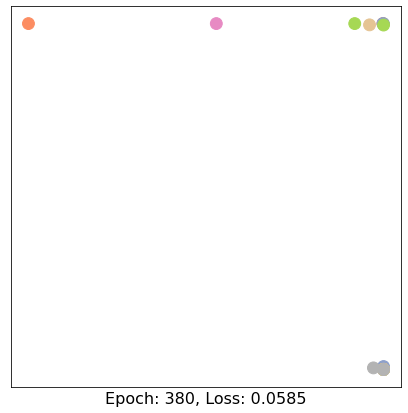

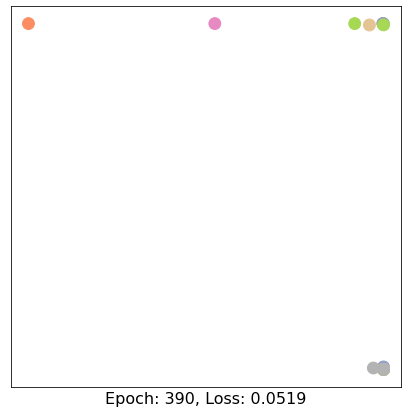

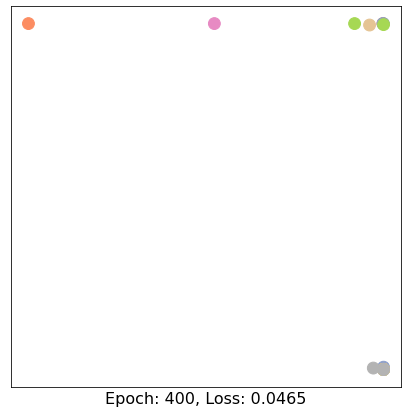

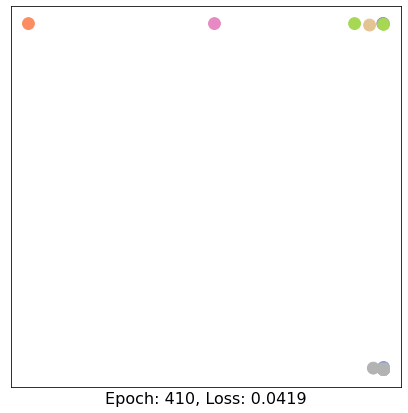

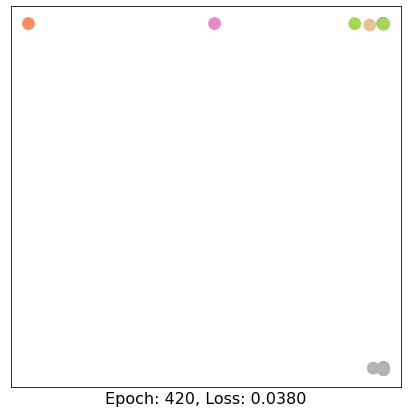

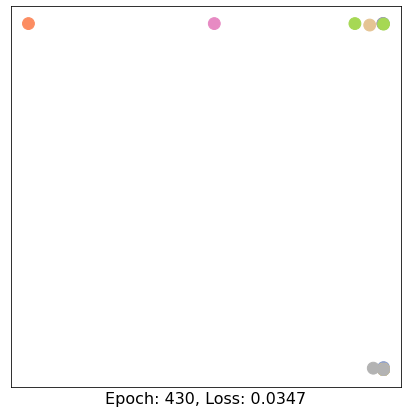

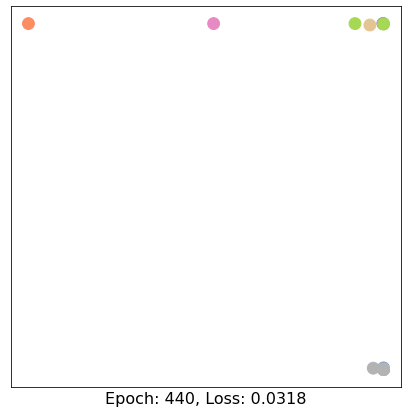

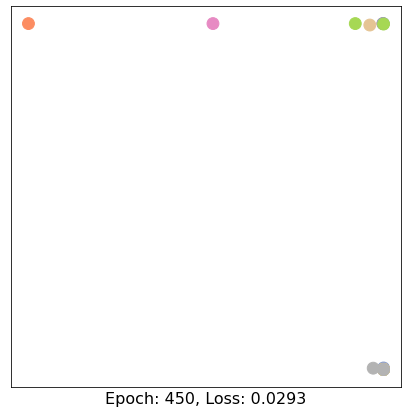

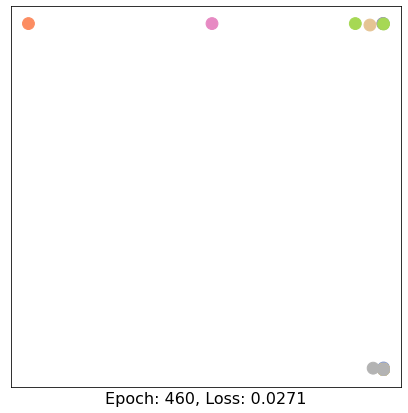

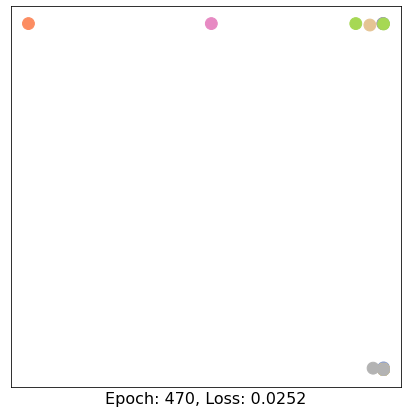

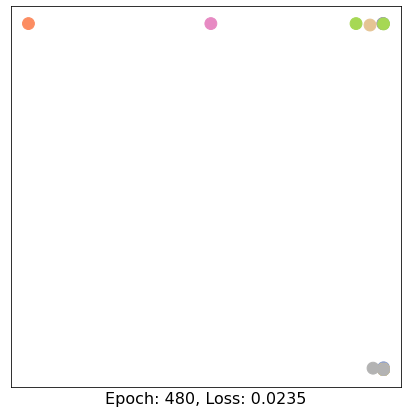

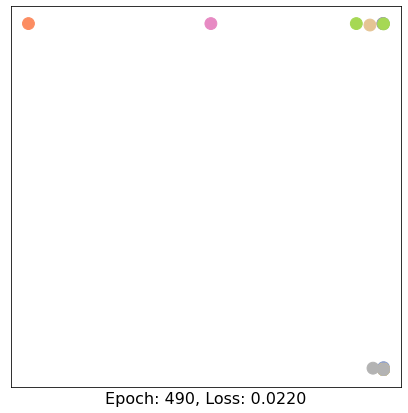

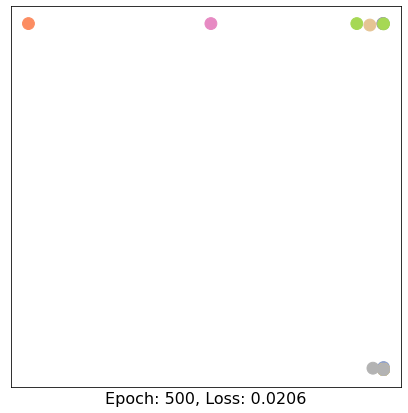

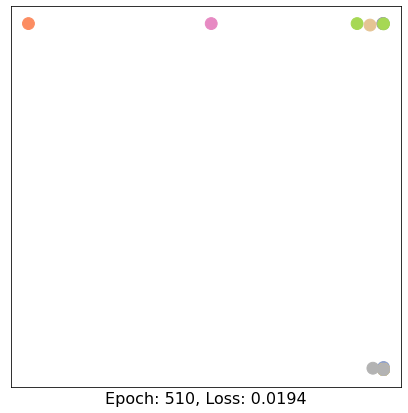

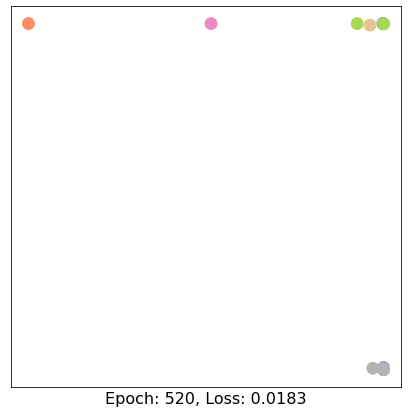

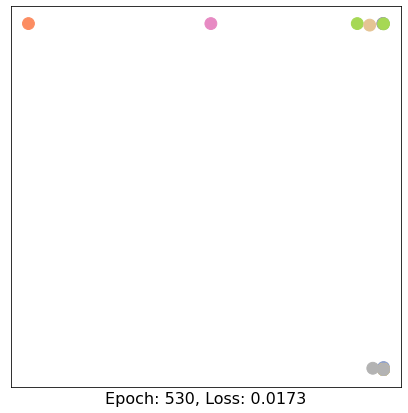

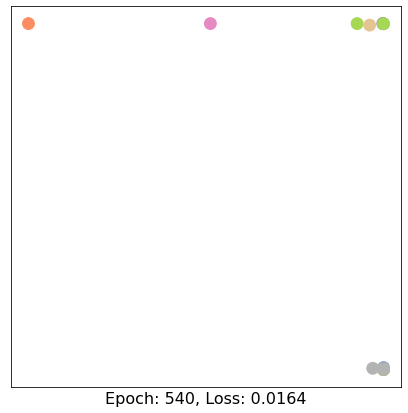

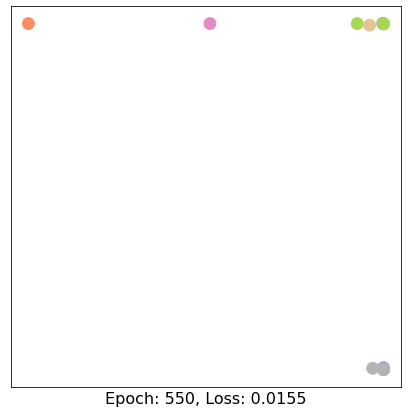

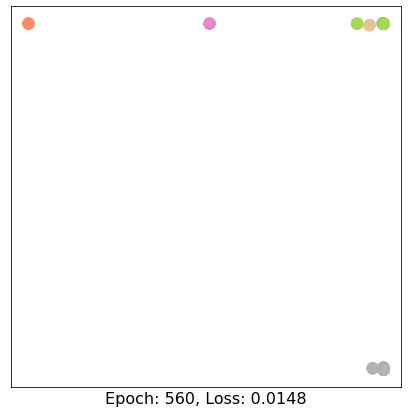

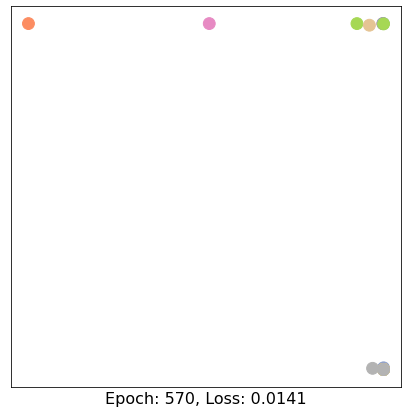

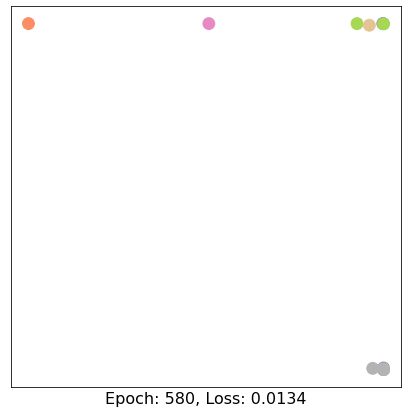

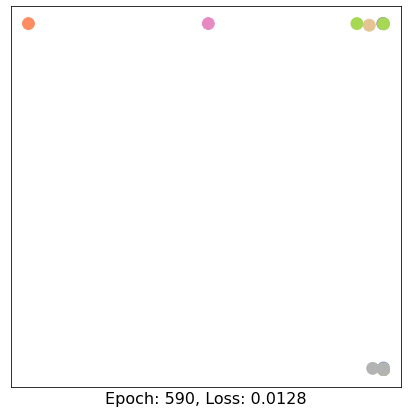

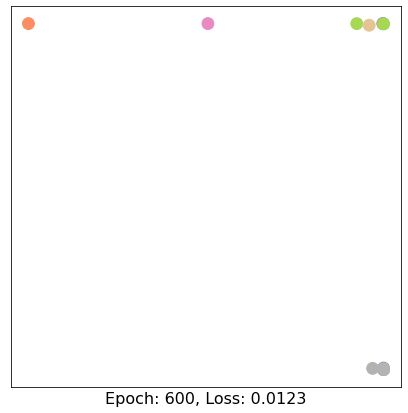

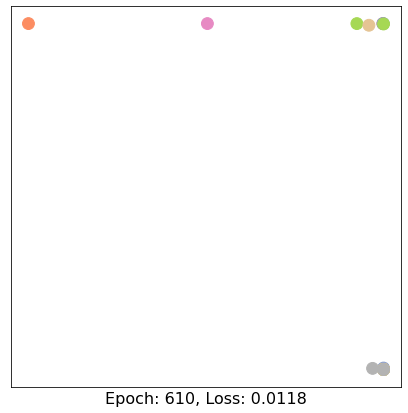

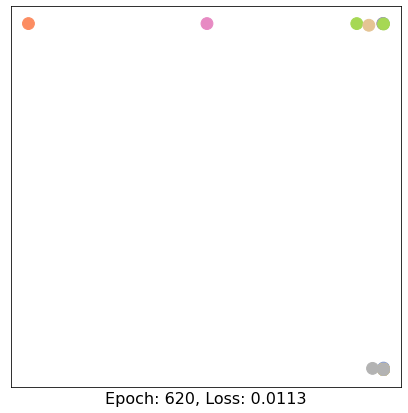

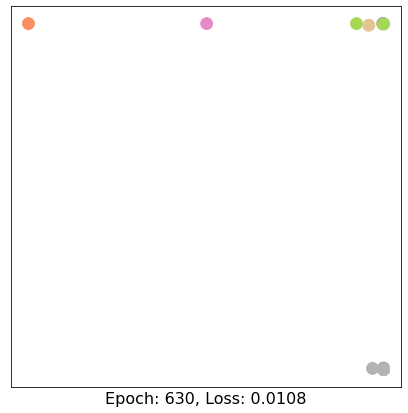

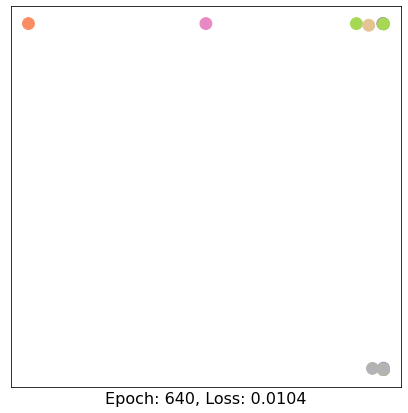

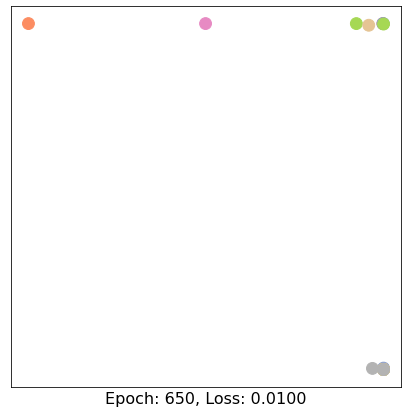

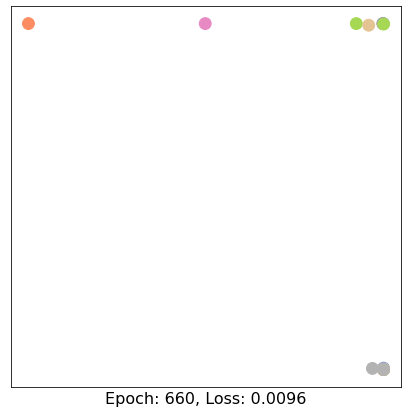

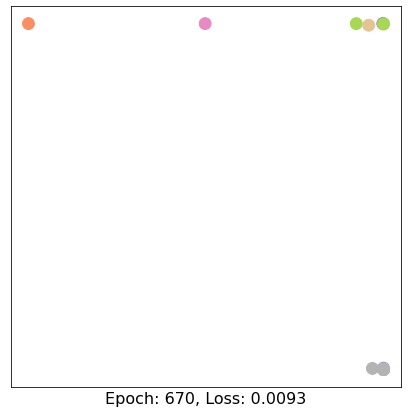

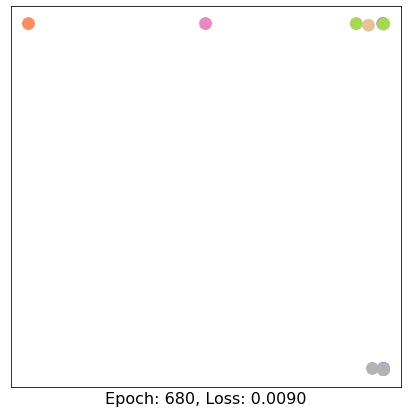

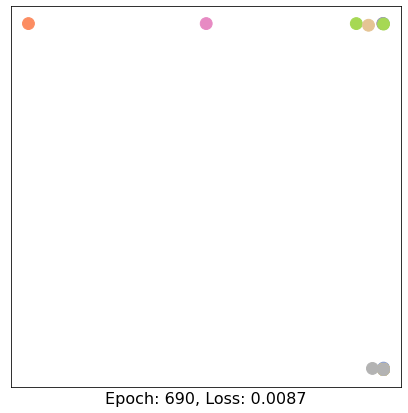

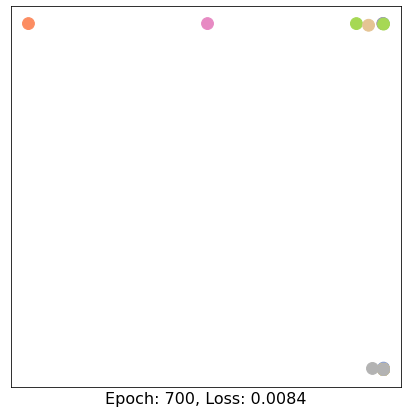

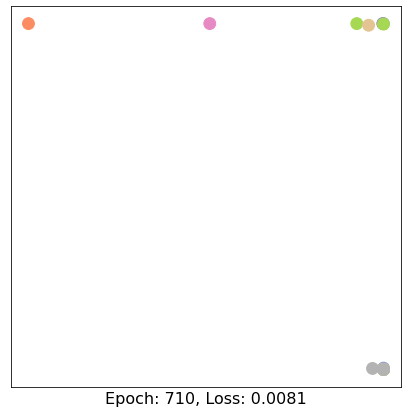

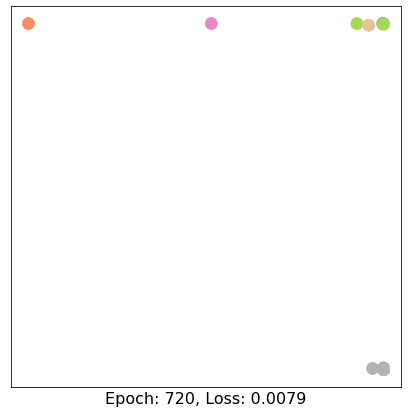

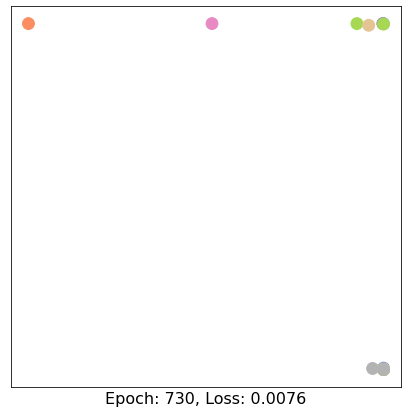

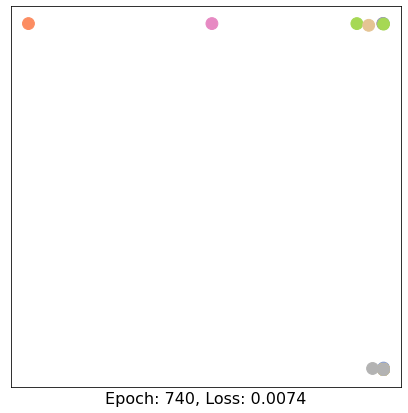

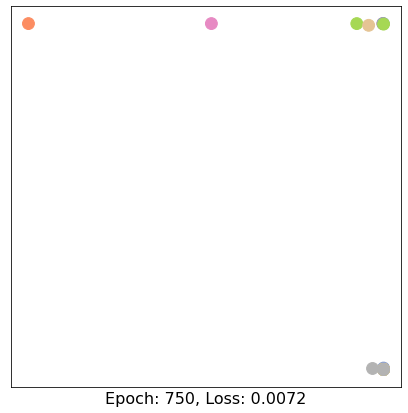

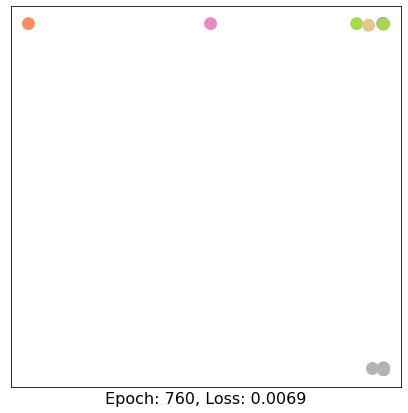

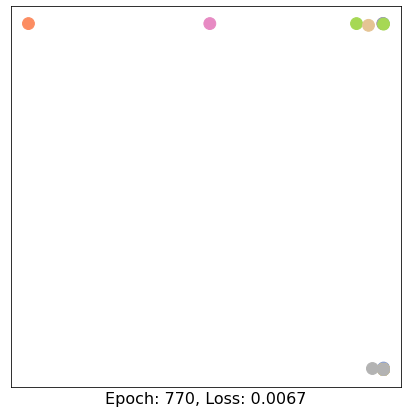

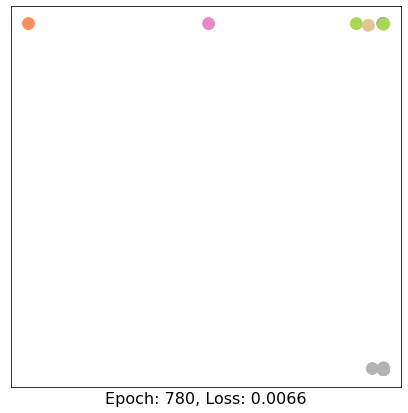

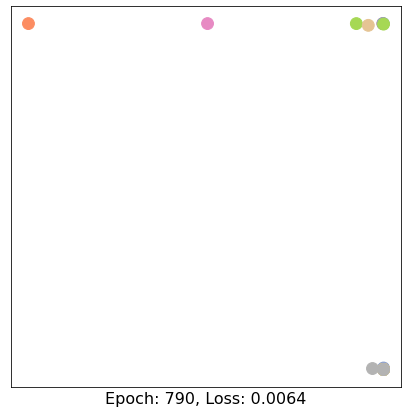

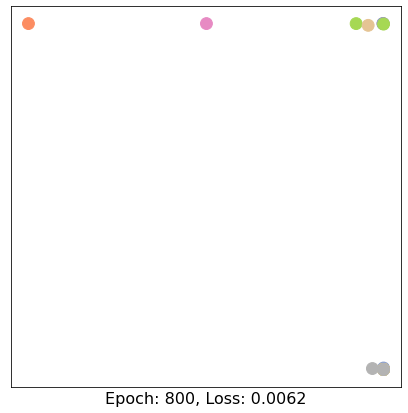

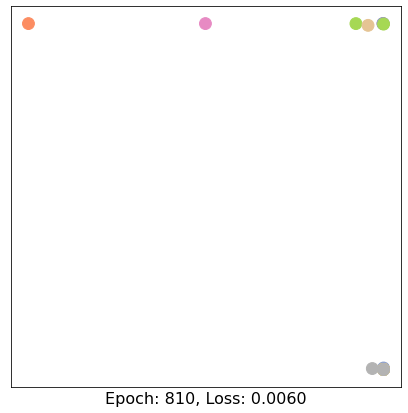

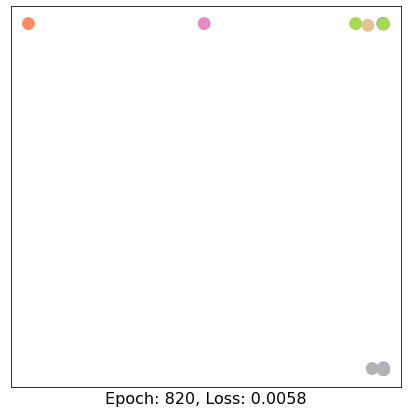

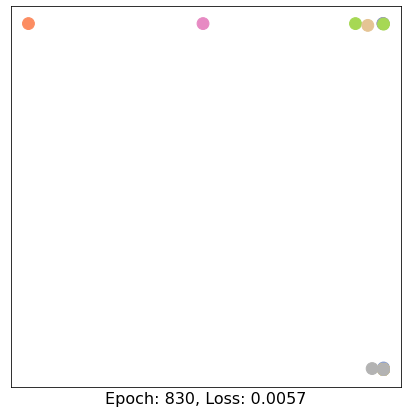

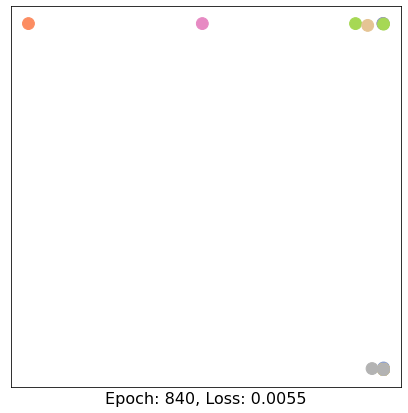

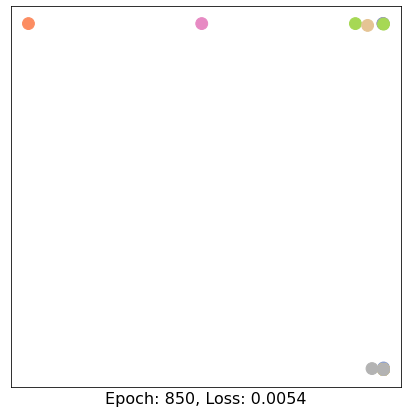

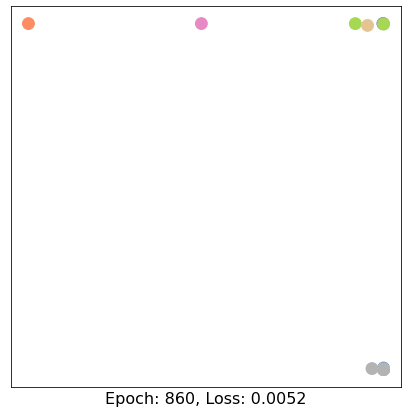

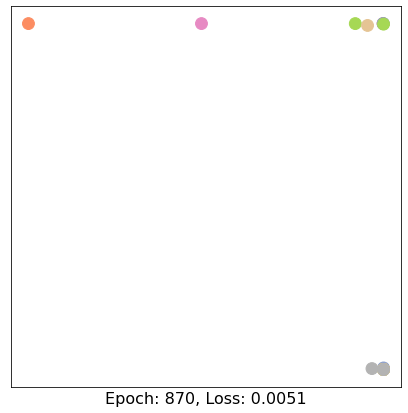

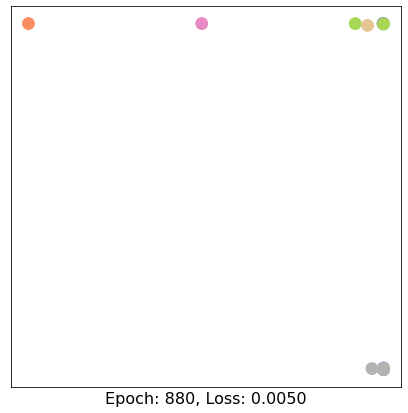

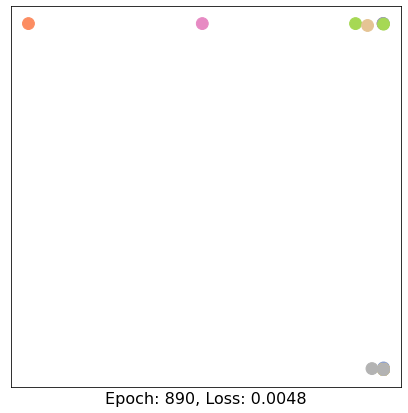

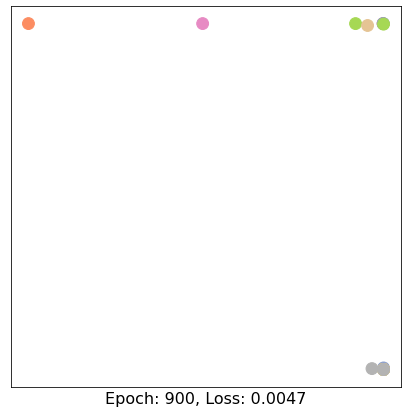

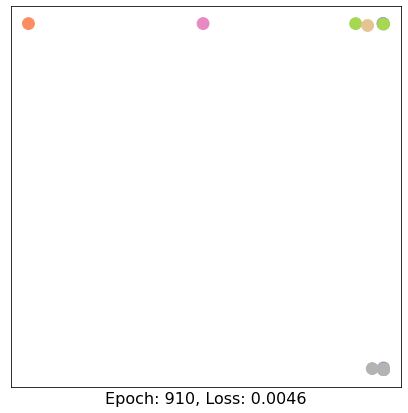

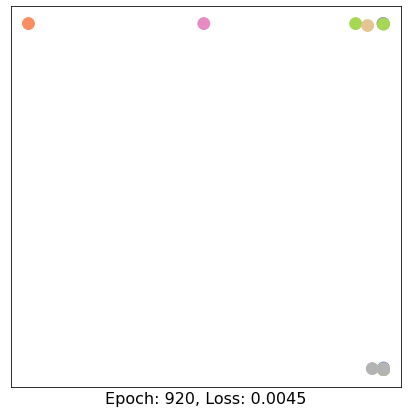

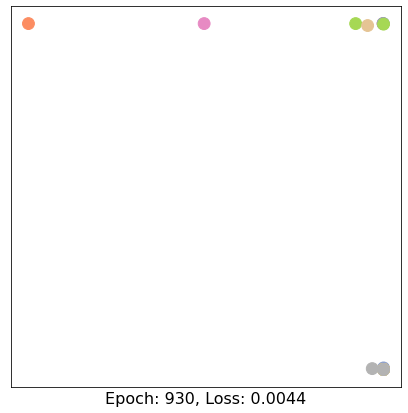

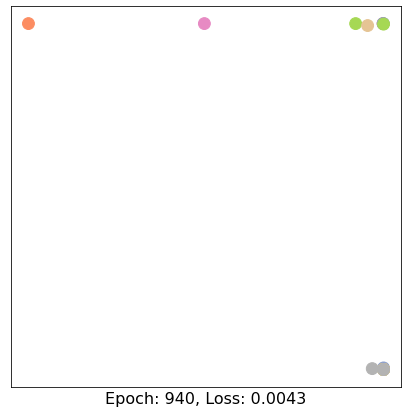

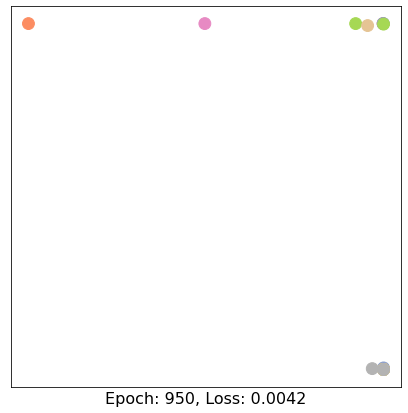

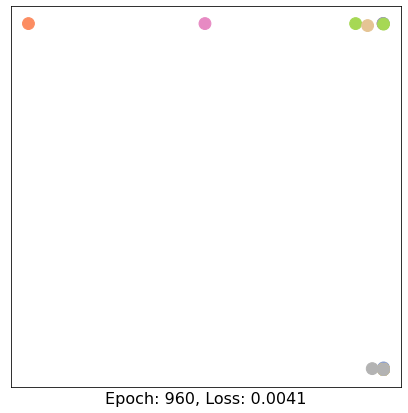

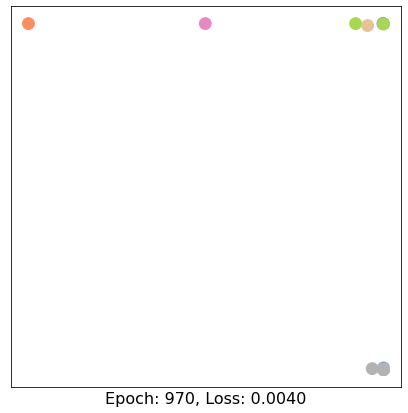

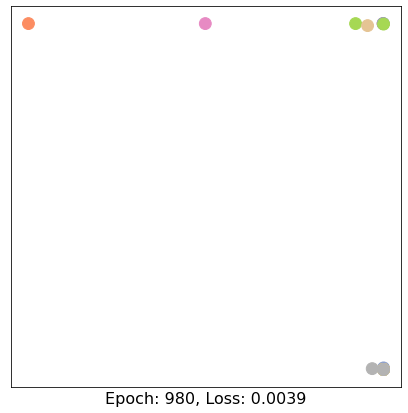

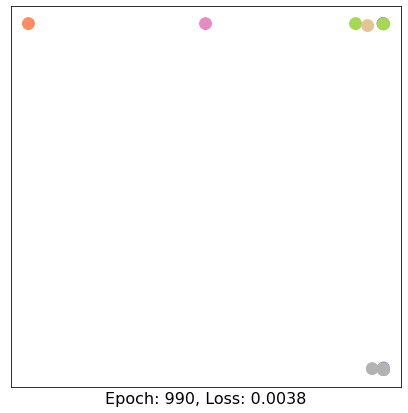

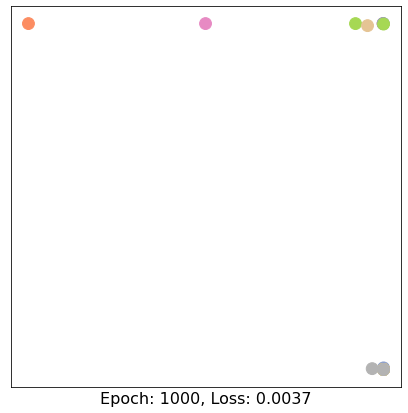

In [53]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN(LeftHandTensor)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

for epoch in range(1001):
    loss, h = train(LeftHandData)
    if epoch % 10 == 0:
        visualize(h, color=LeftHandData.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

### 2. Right Hand Training

<IPython.core.display.Javascript object>

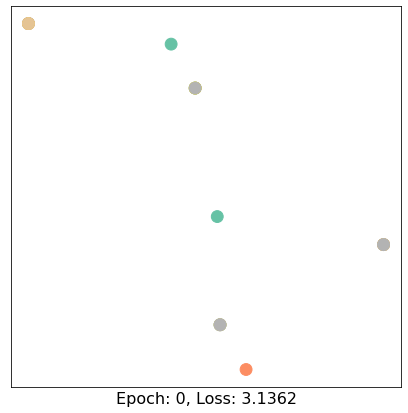

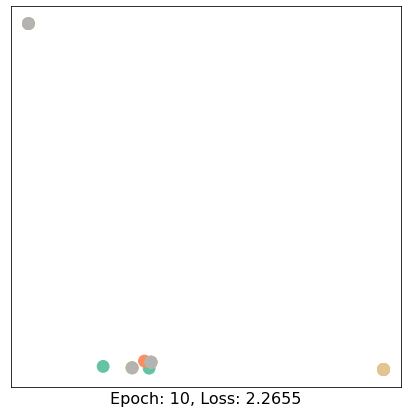

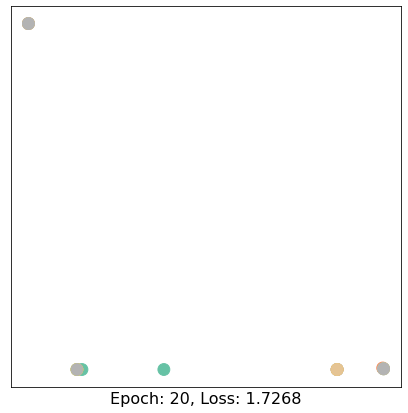

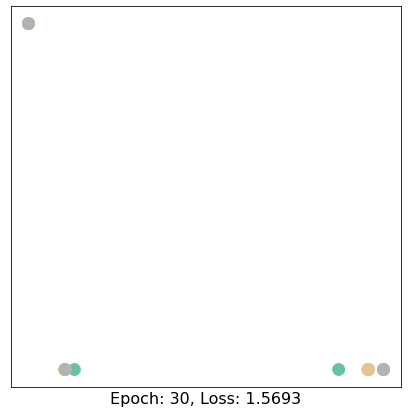

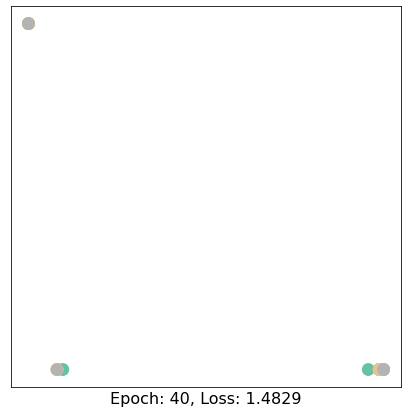

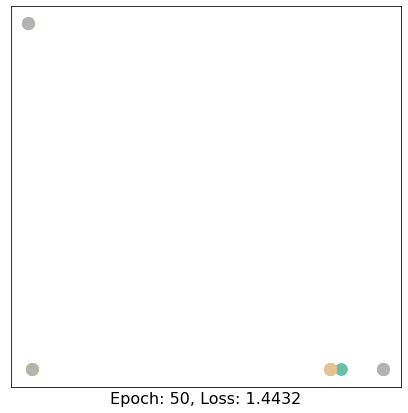

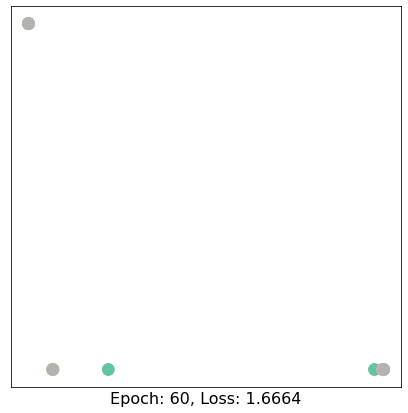

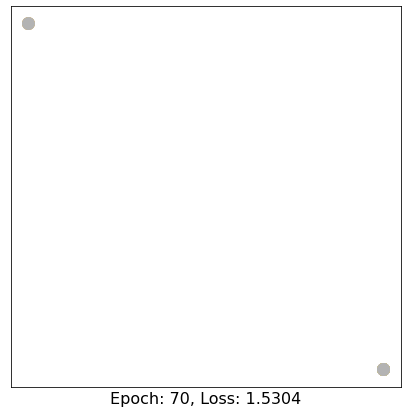

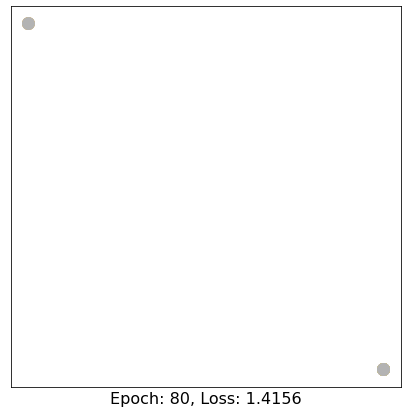

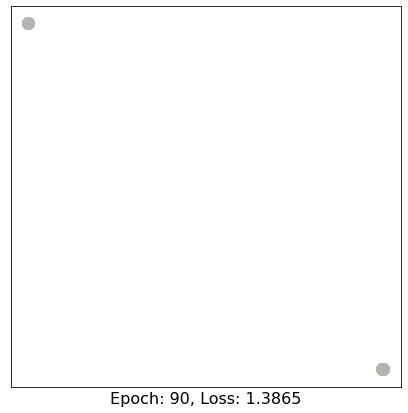

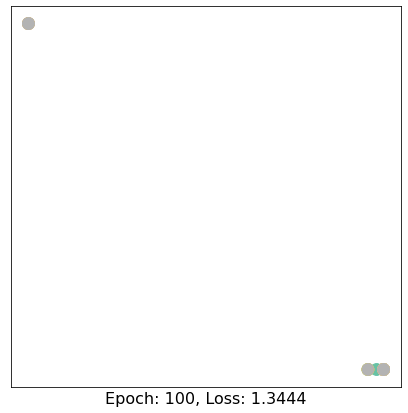

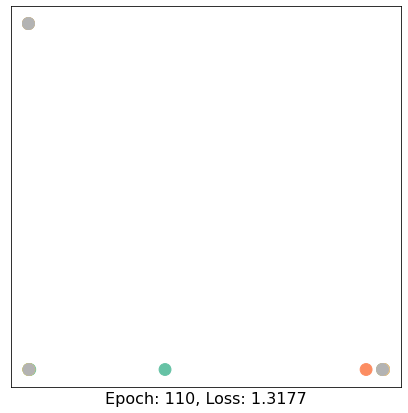

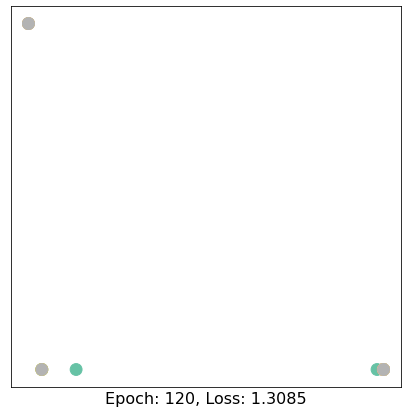

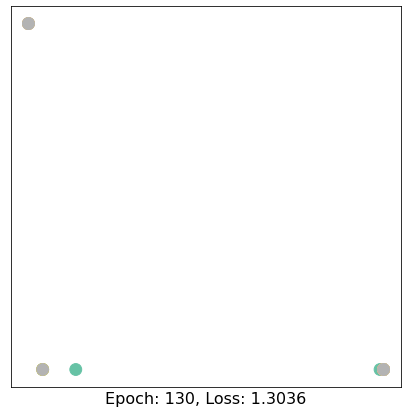

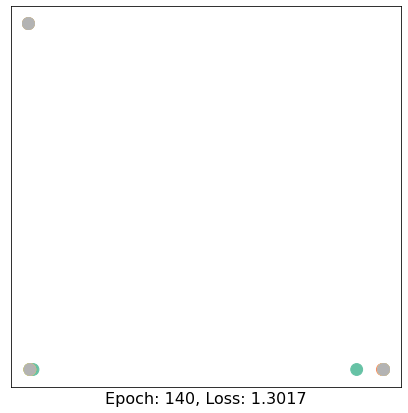

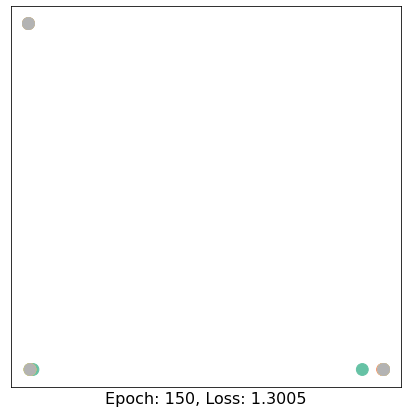

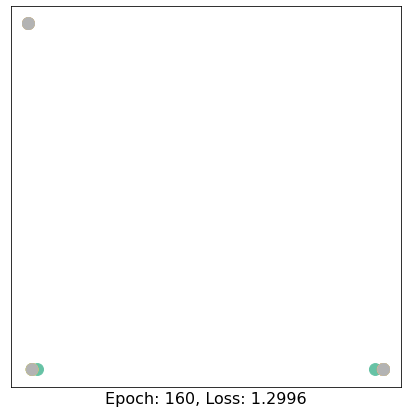

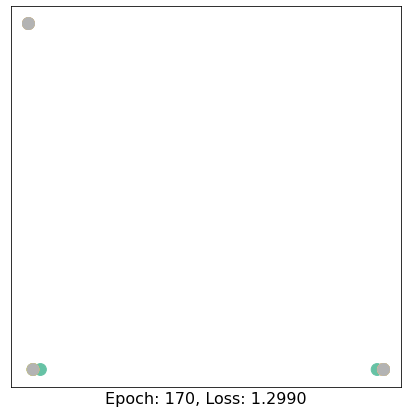

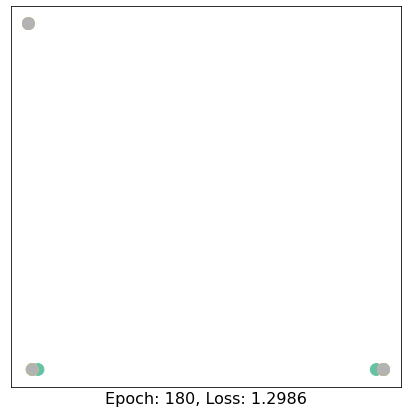

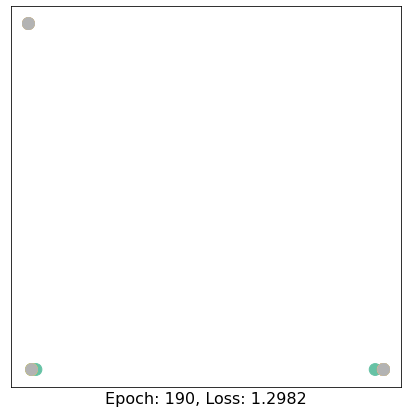

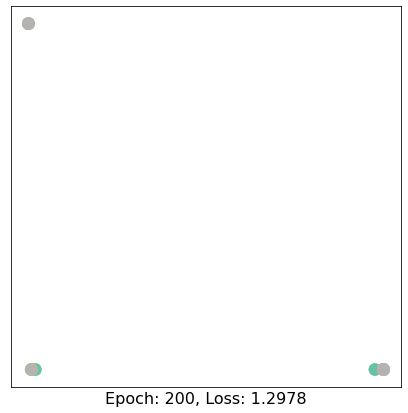

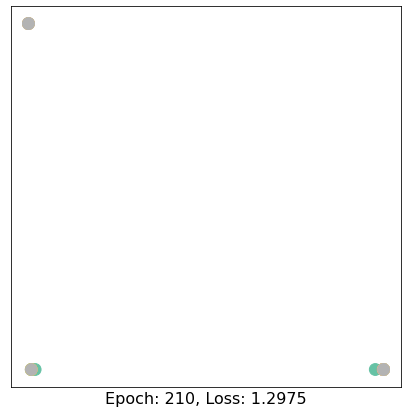

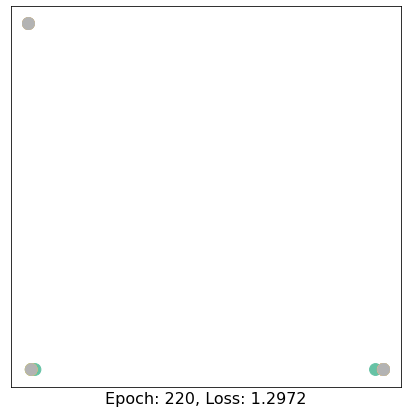

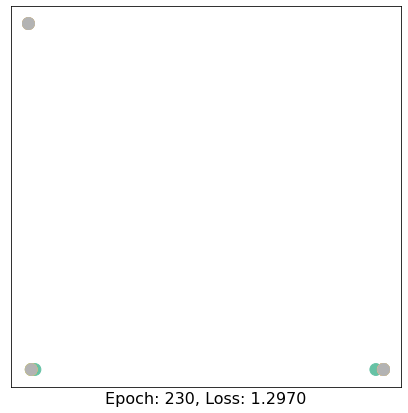

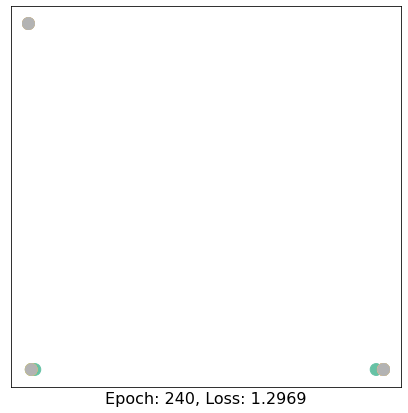

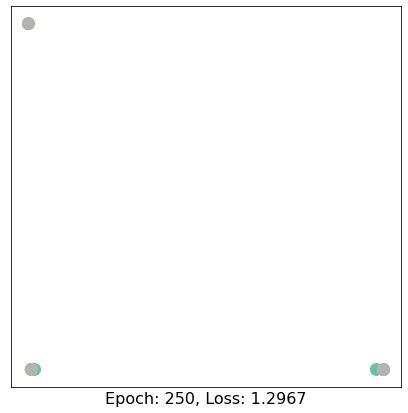

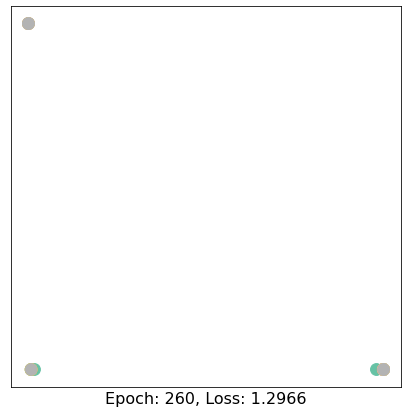

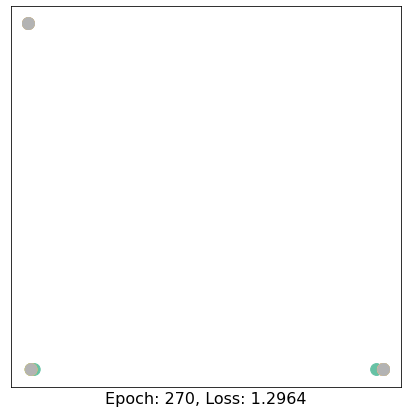

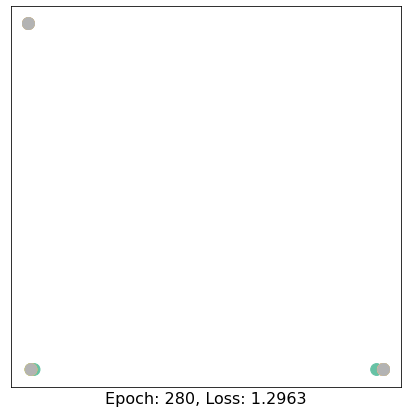

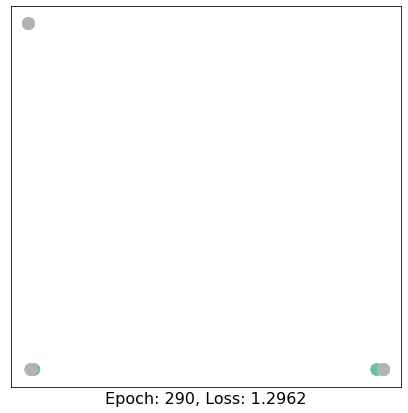

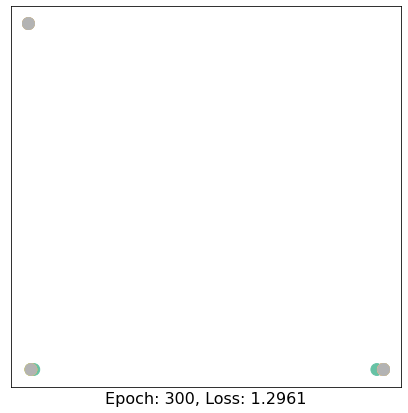

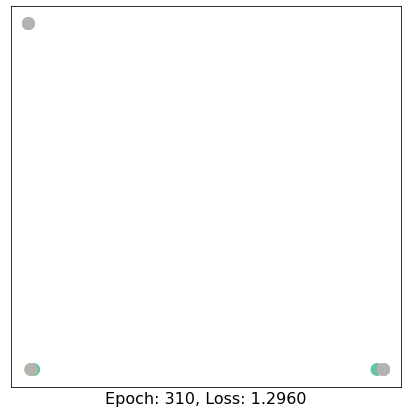

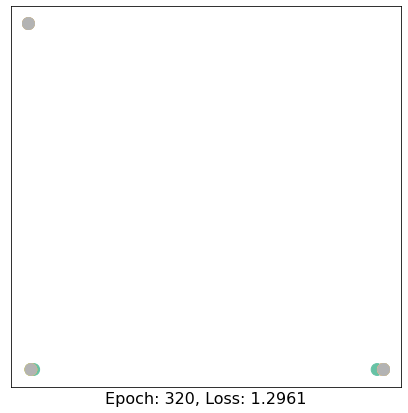

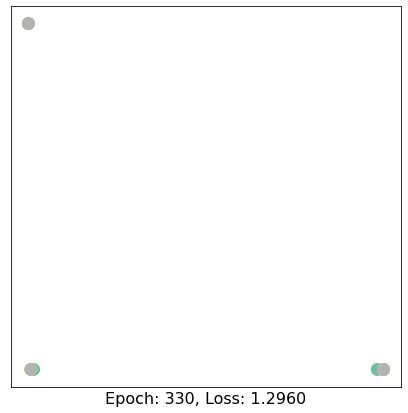

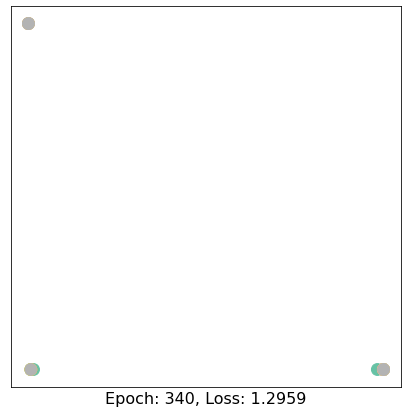

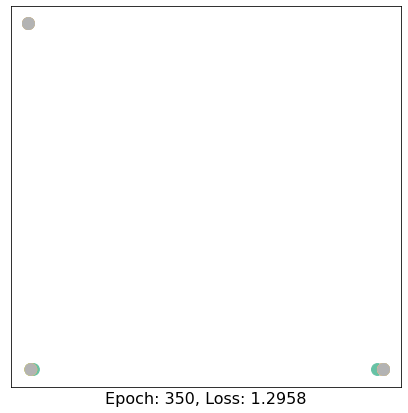

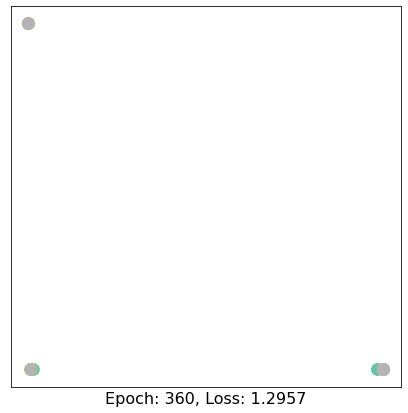

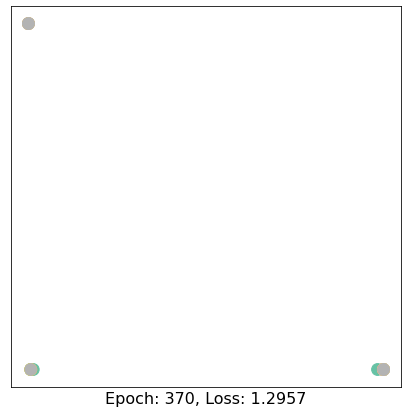

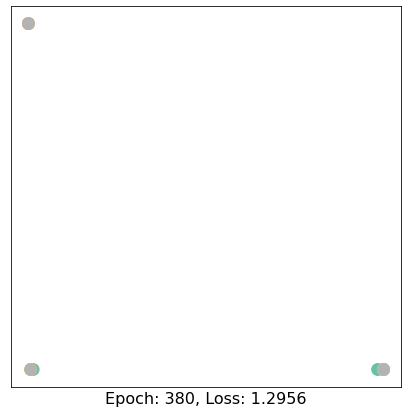

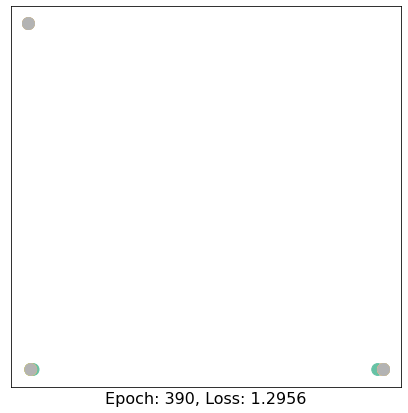

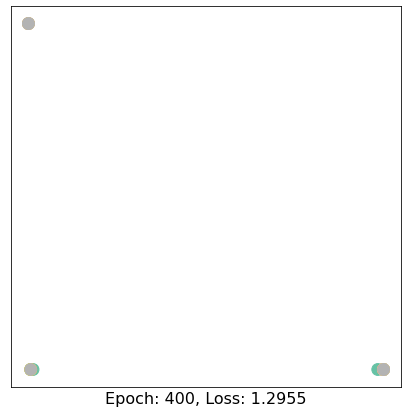

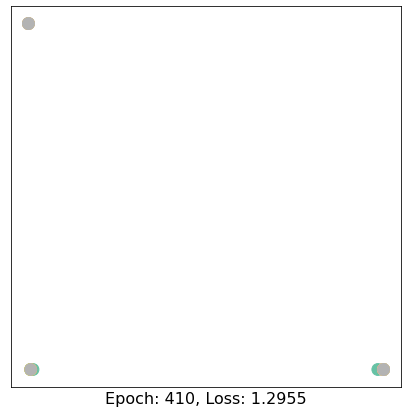

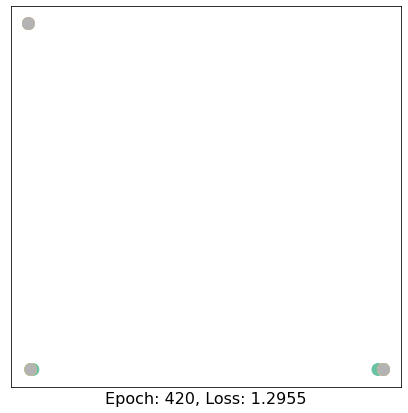

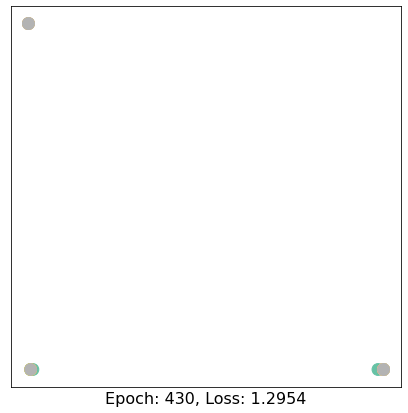

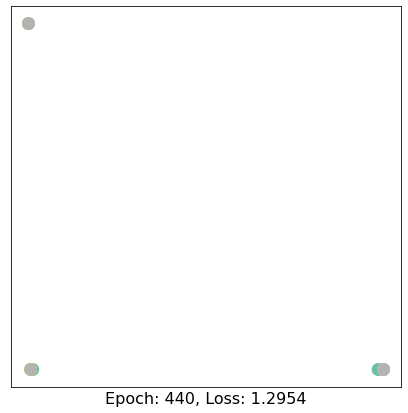

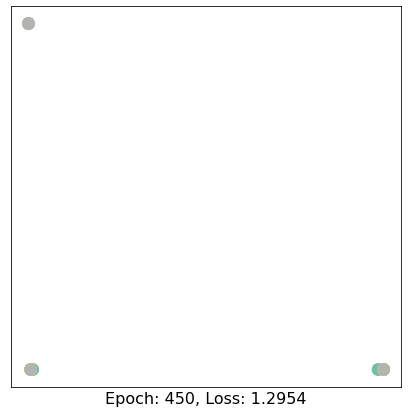

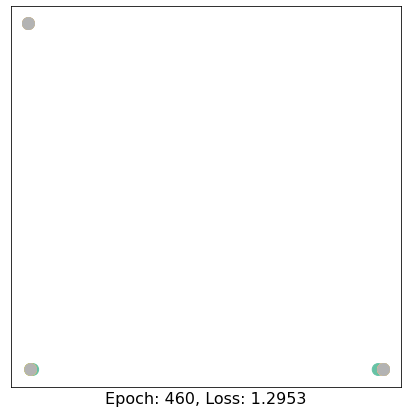

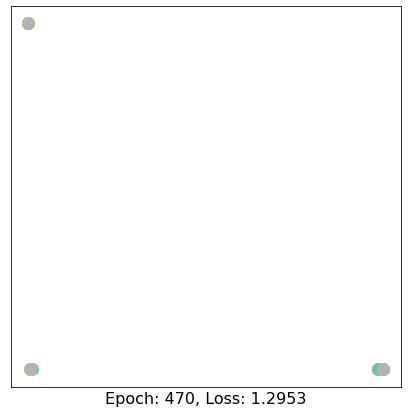

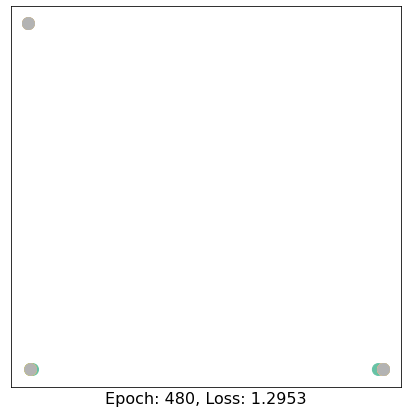

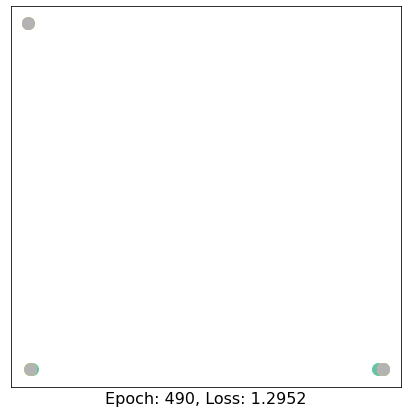

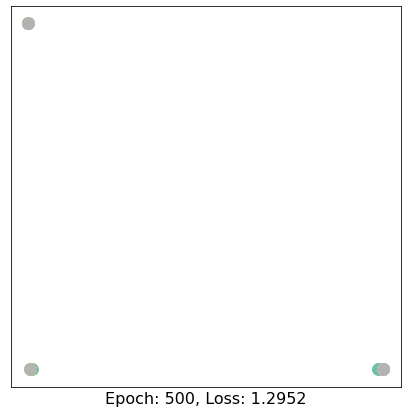

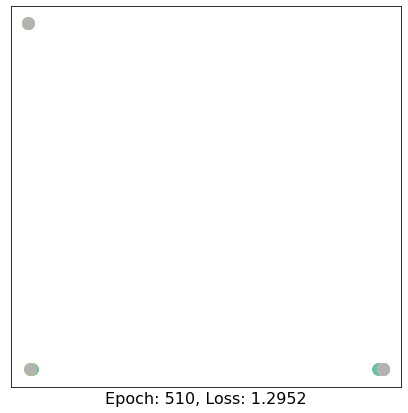

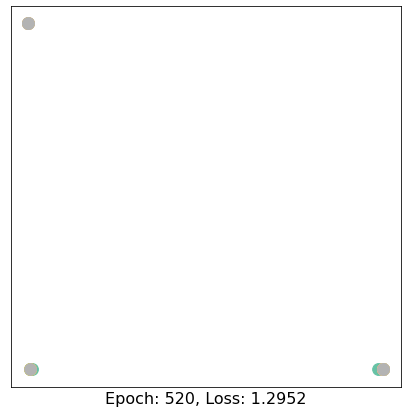

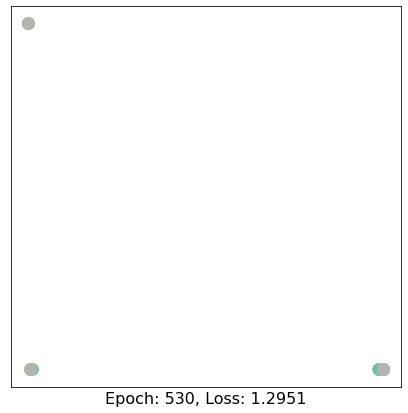

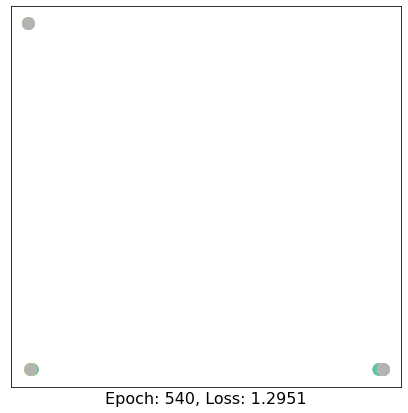

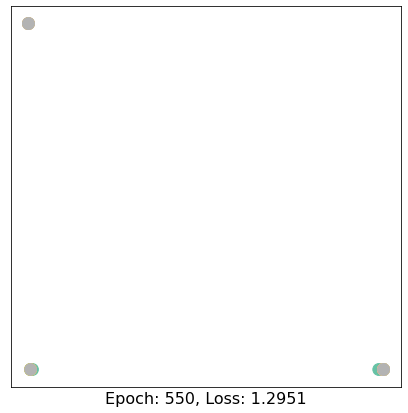

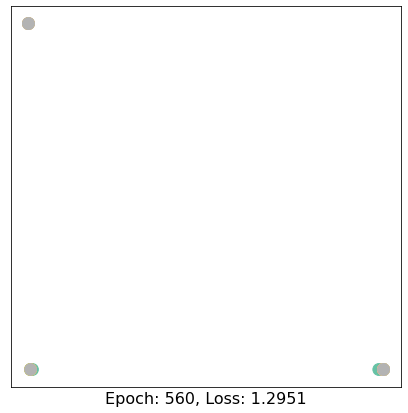

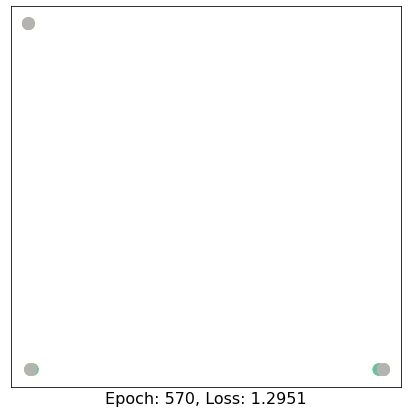

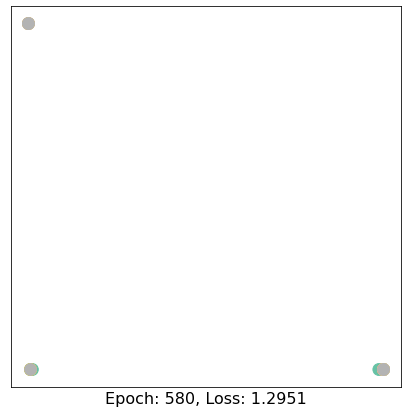

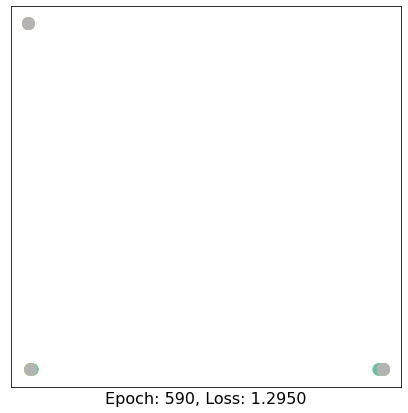

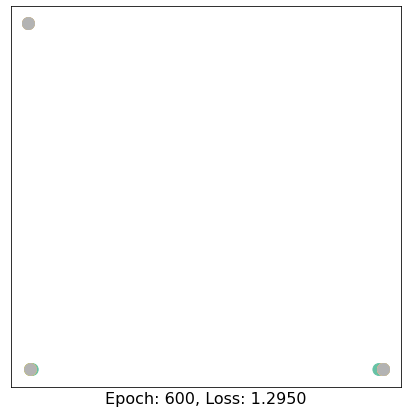

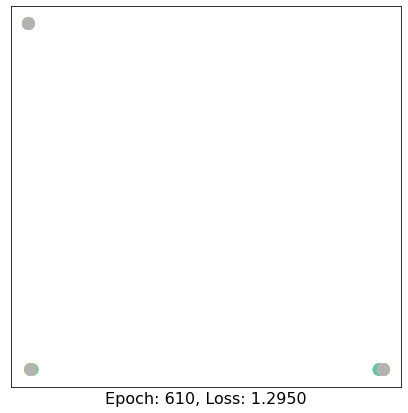

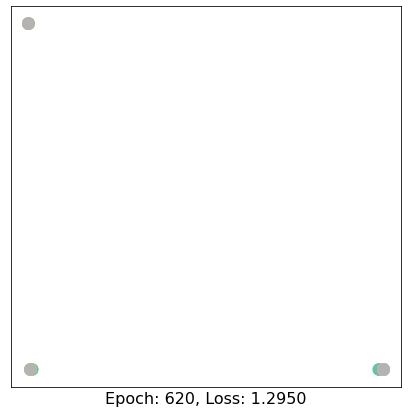

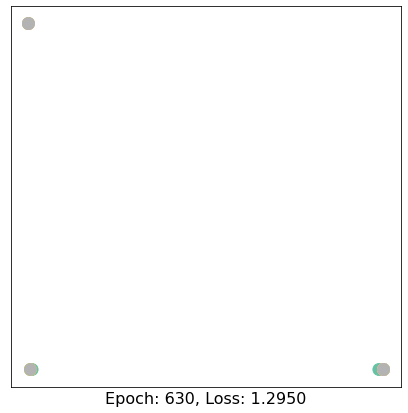

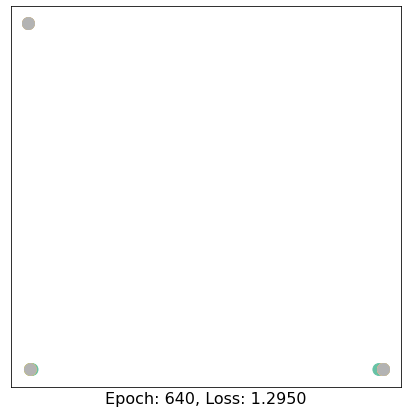

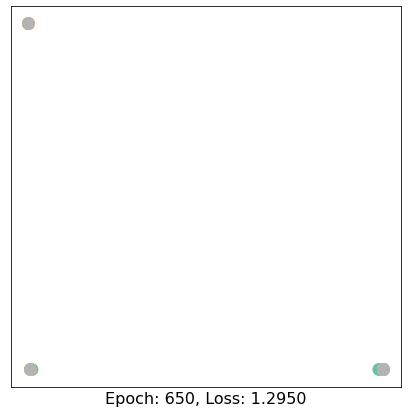

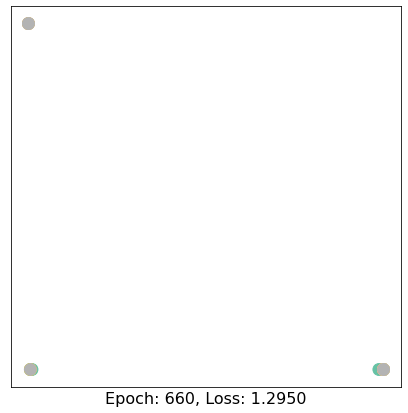

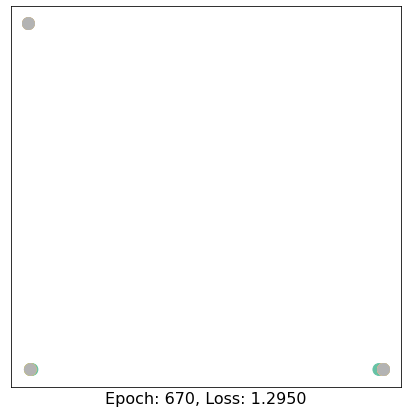

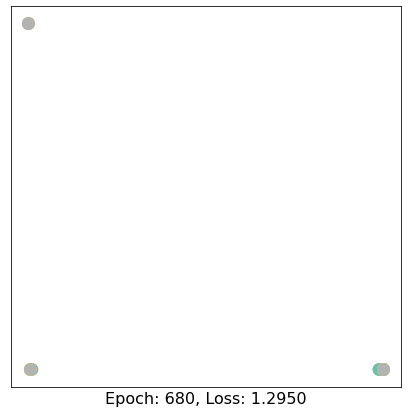

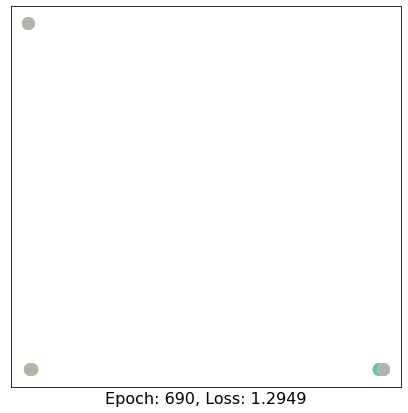

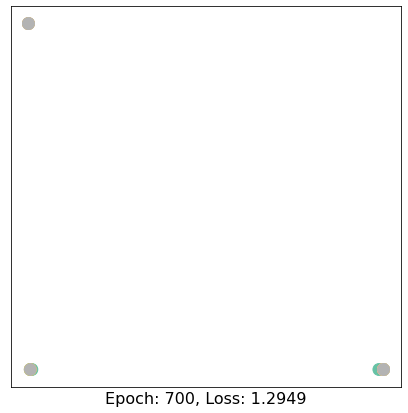

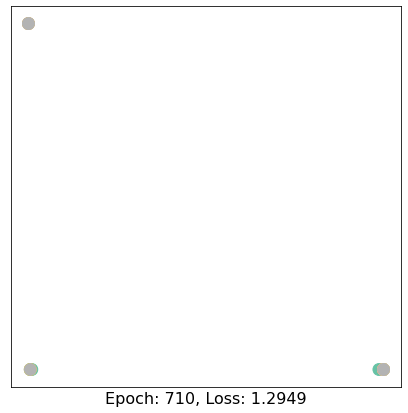

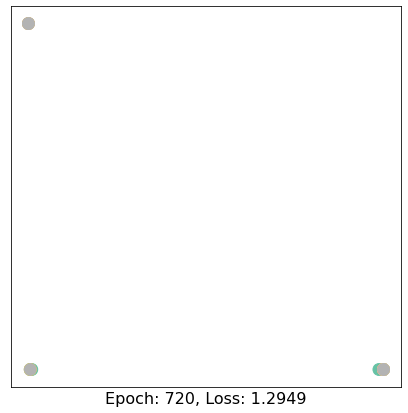

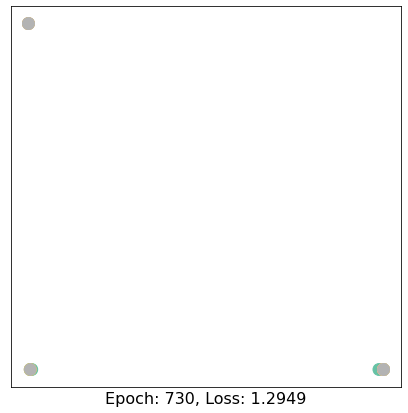

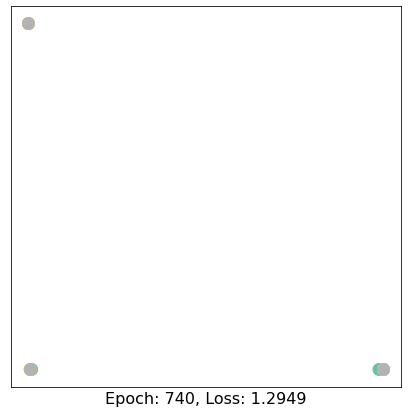

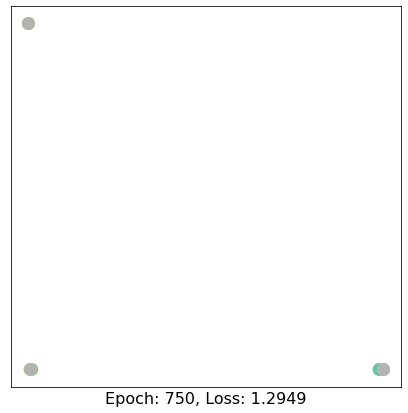

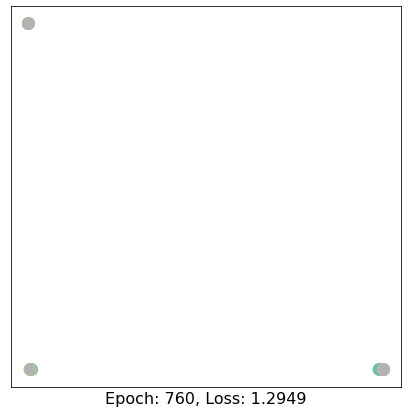

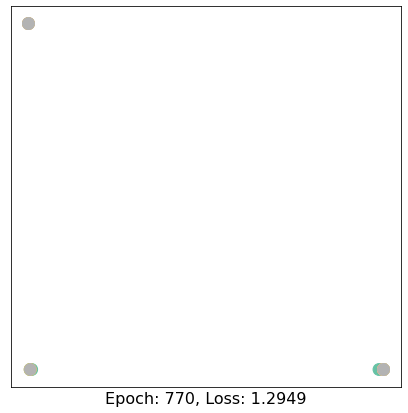

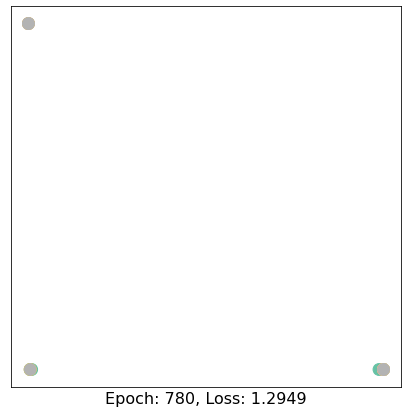

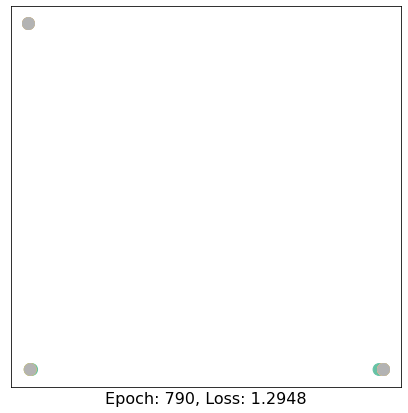

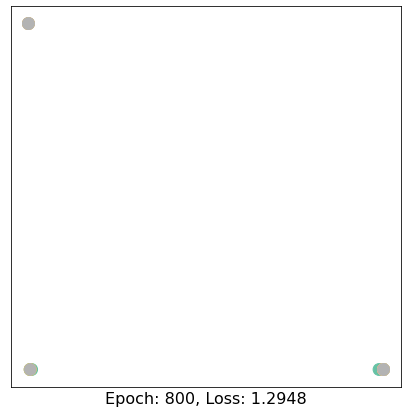

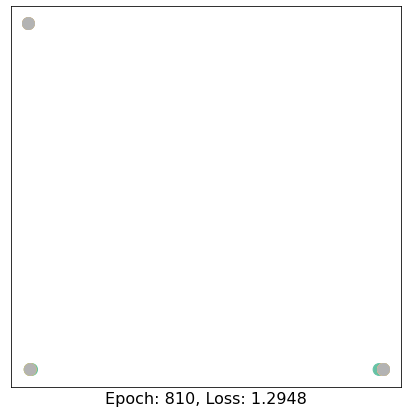

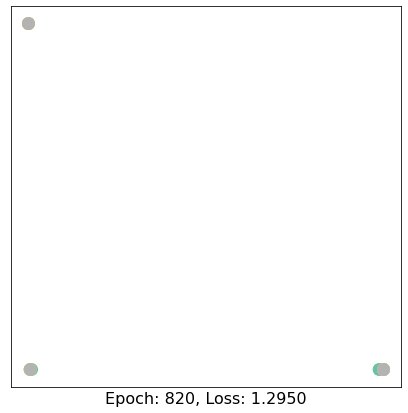

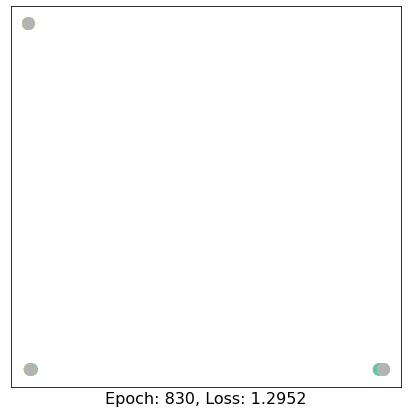

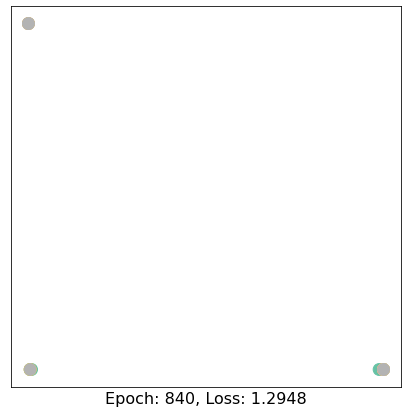

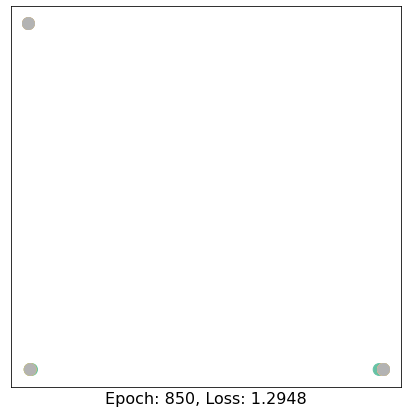

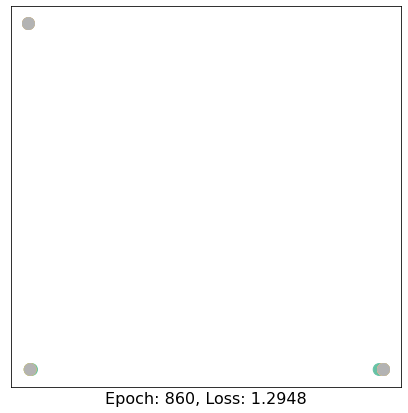

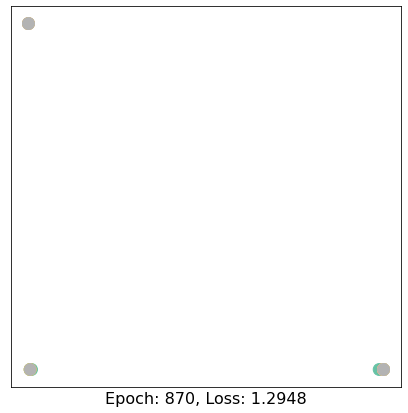

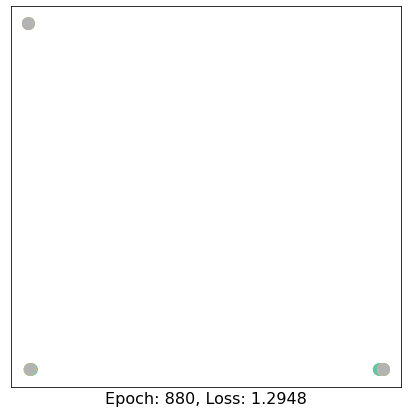

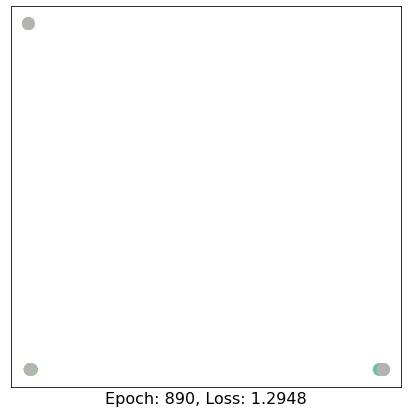

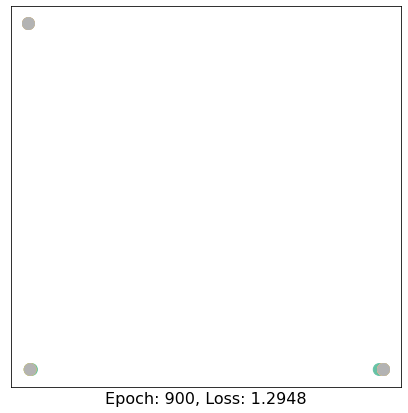

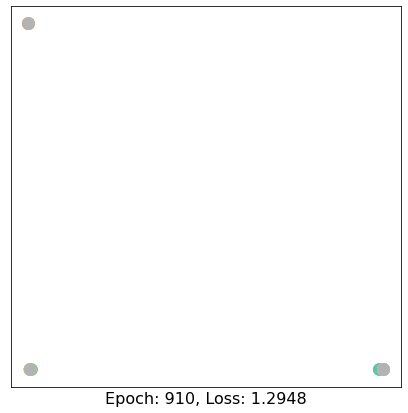

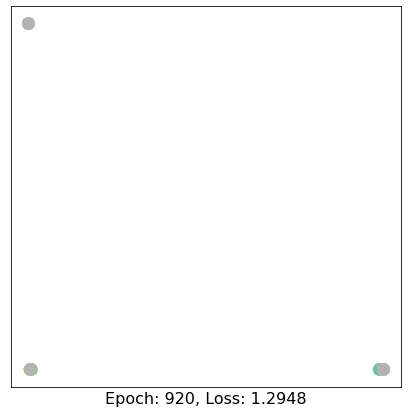

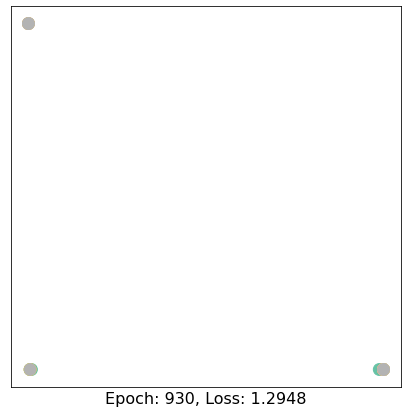

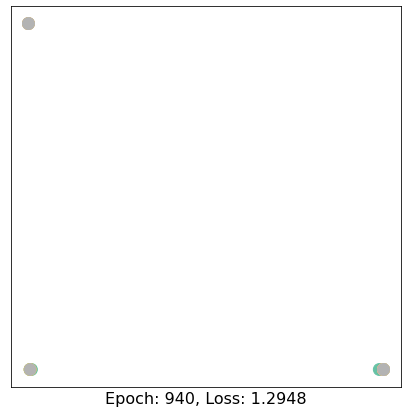

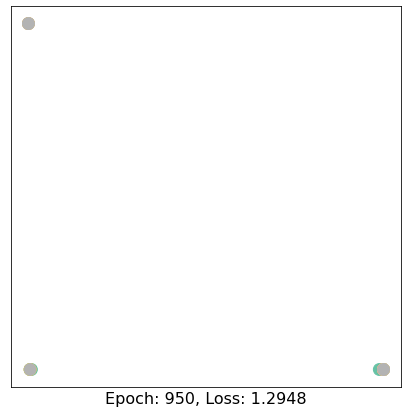

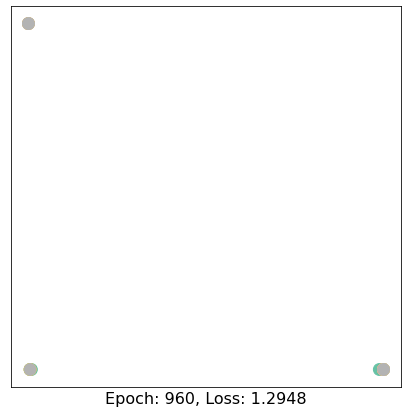

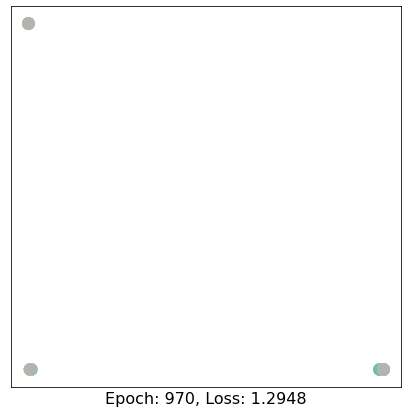

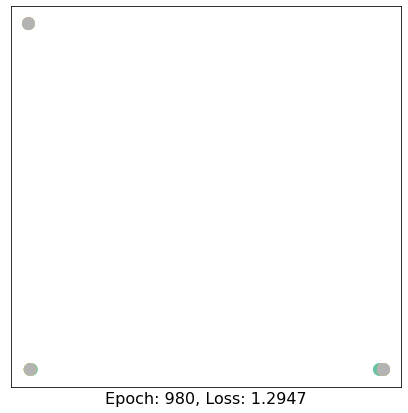

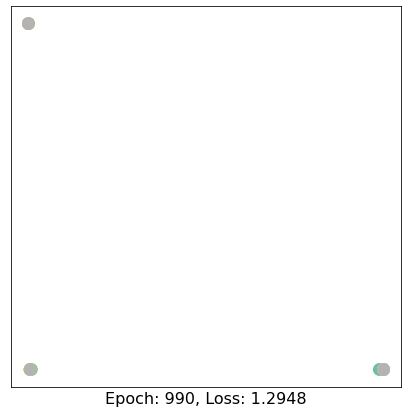

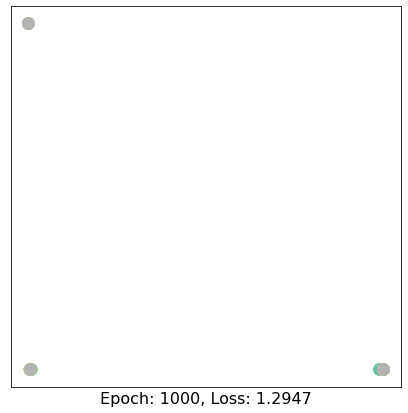

In [54]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN(RightHandTensor)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

for epoch in range(1001):
    loss, h = train(RightHandData)
    if epoch % 10 == 0:
        visualize(h, color=RightHandData.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

### 3. Pose Training

<IPython.core.display.Javascript object>

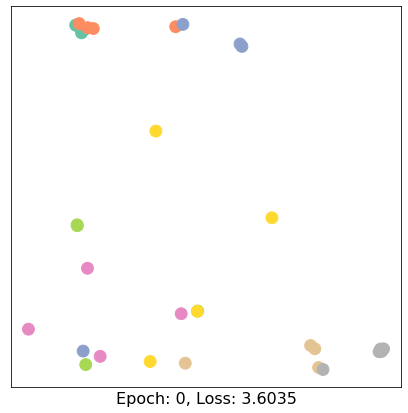

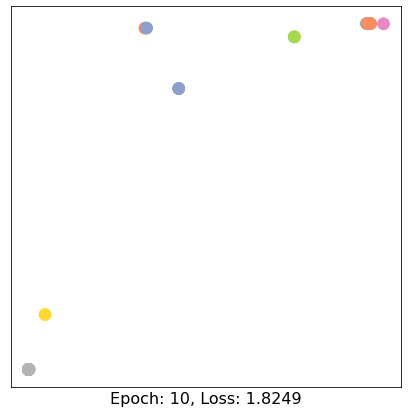

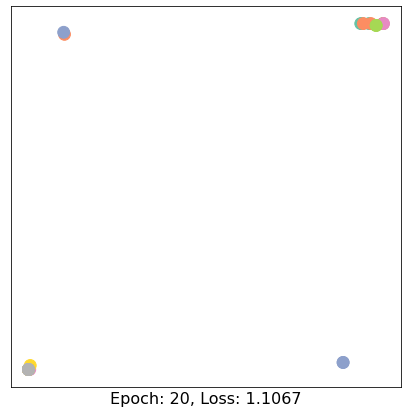

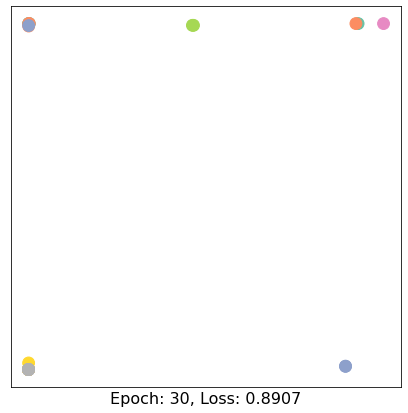

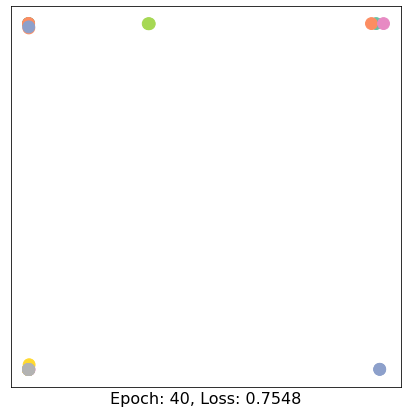

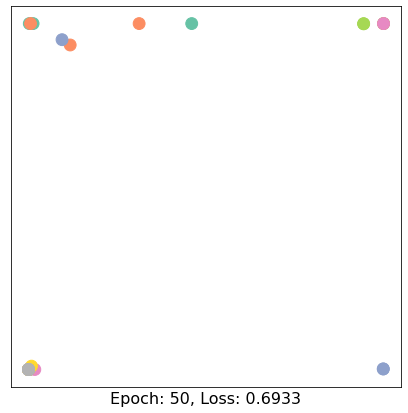

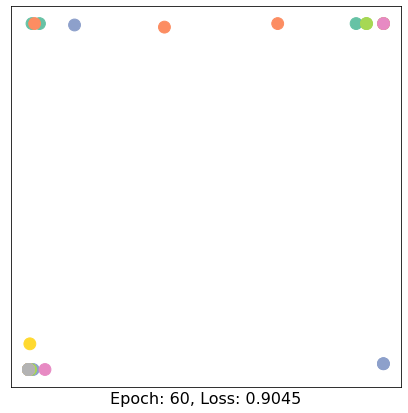

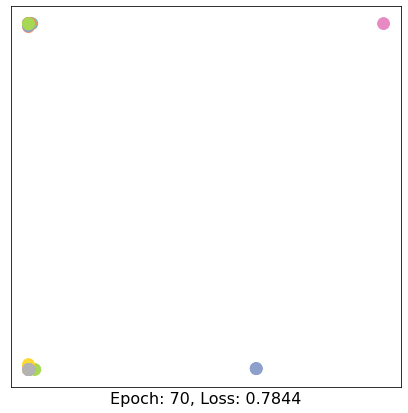

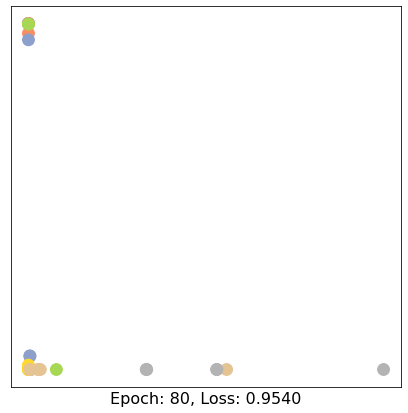

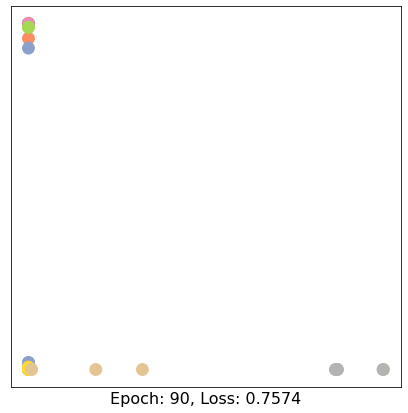

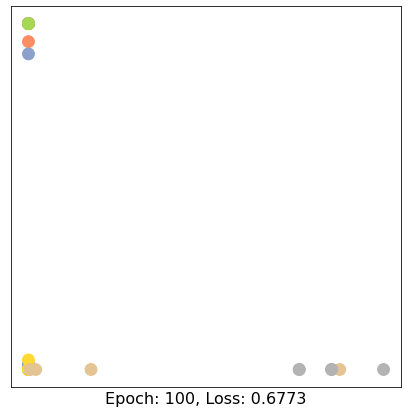

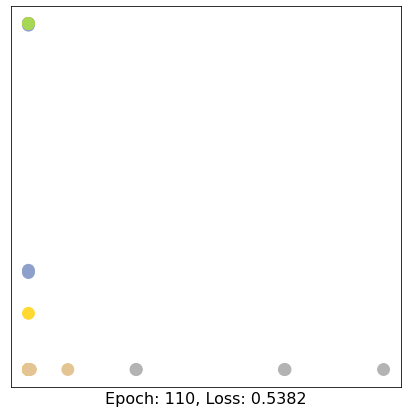

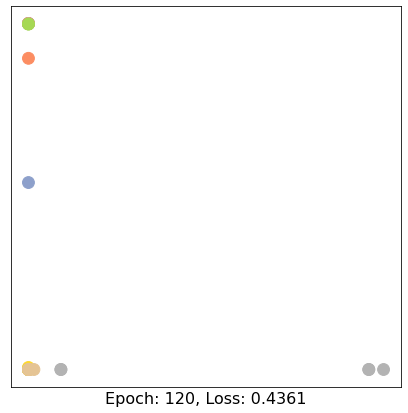

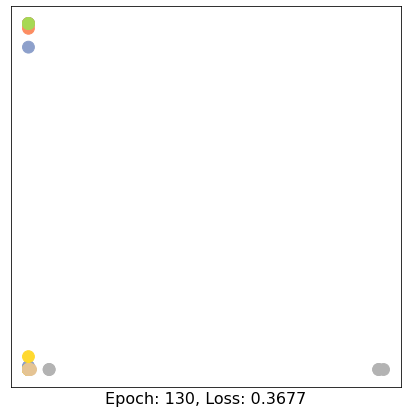

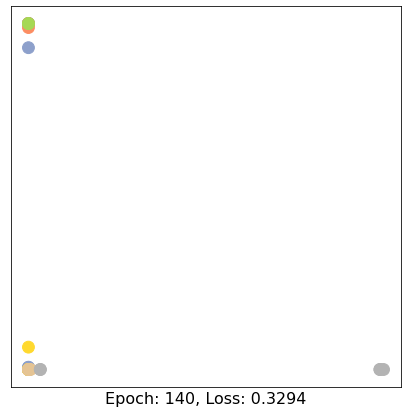

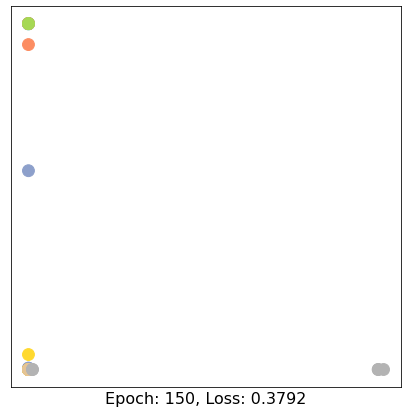

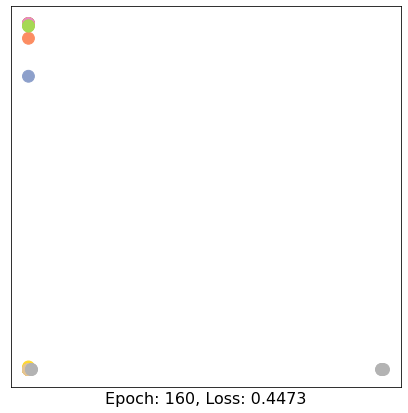

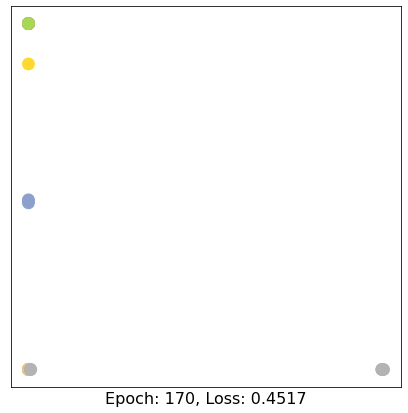

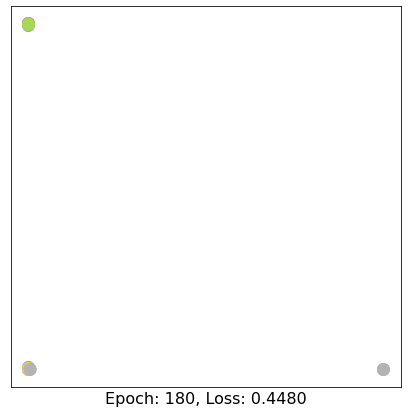

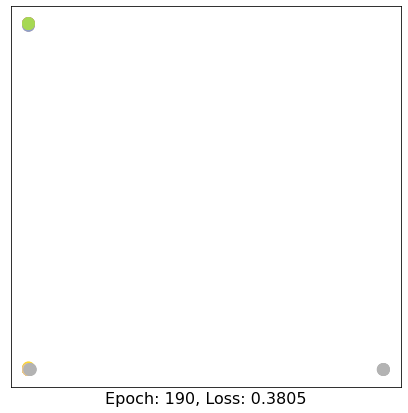

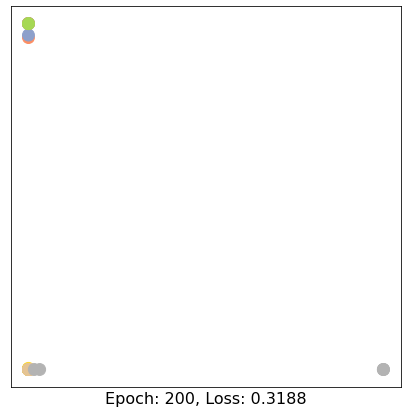

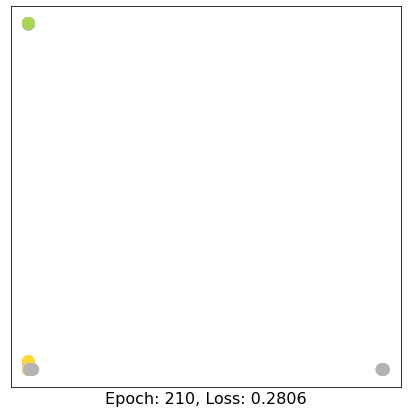

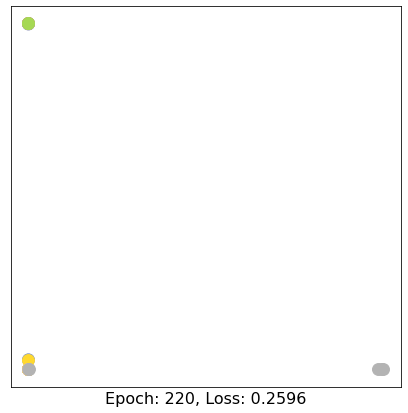

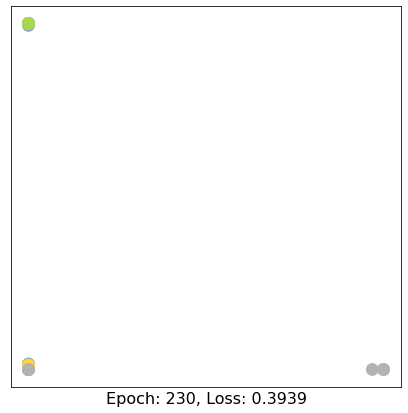

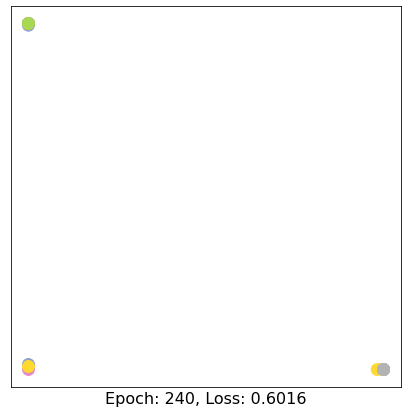

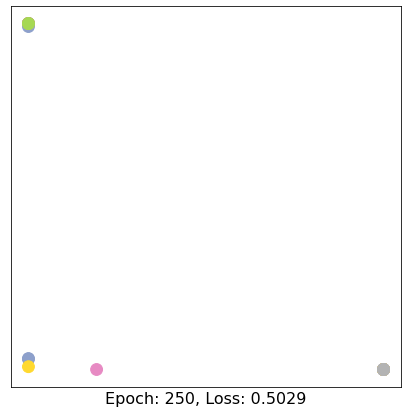

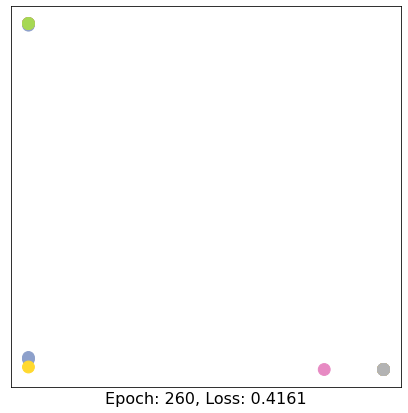

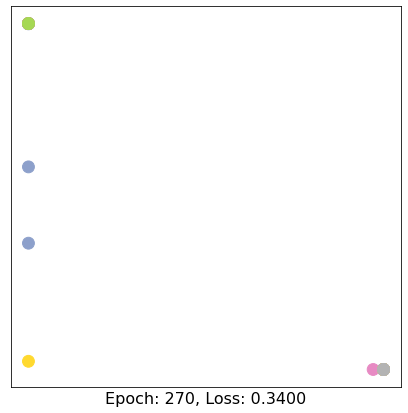

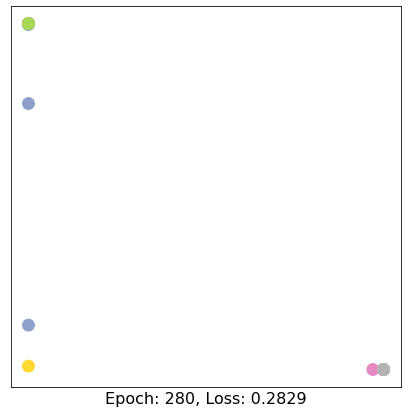

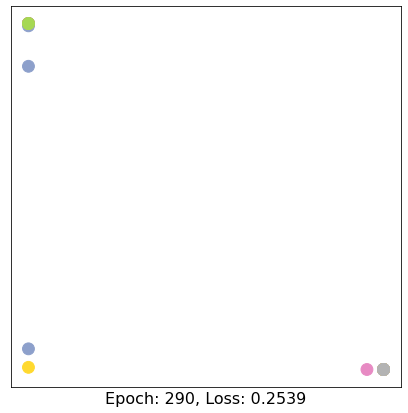

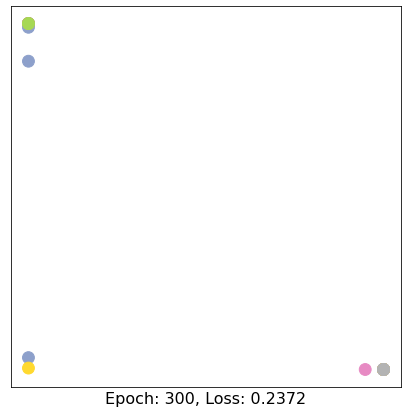

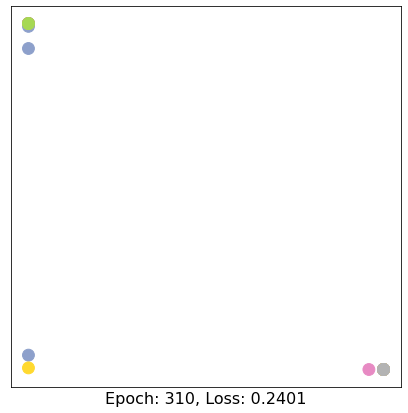

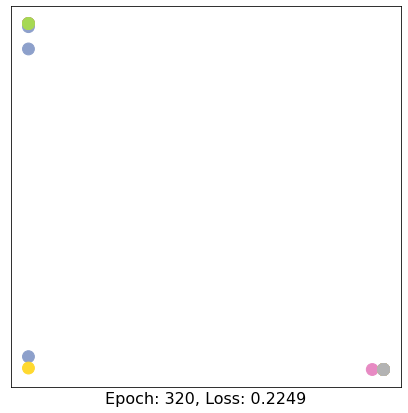

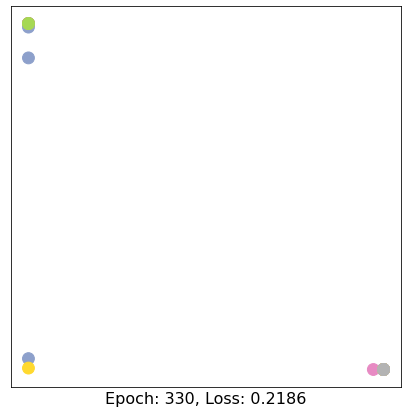

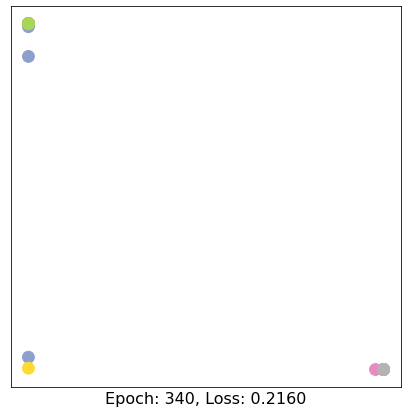

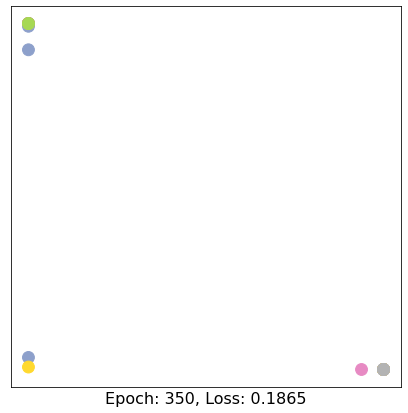

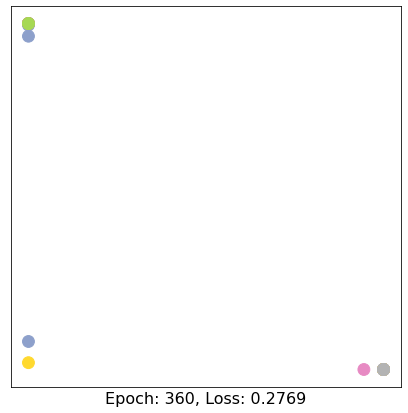

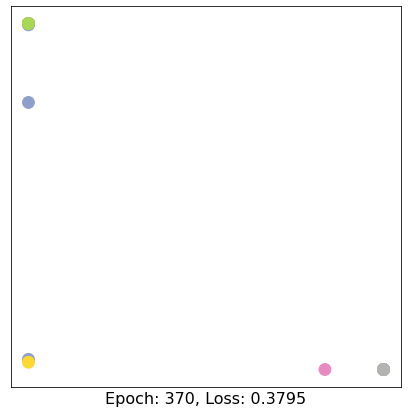

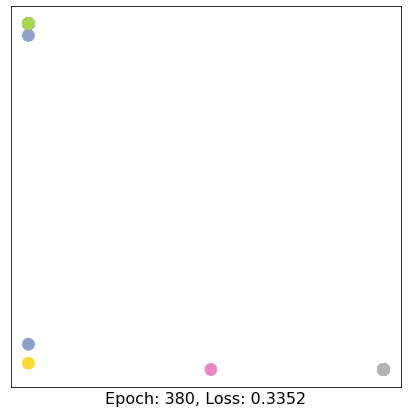

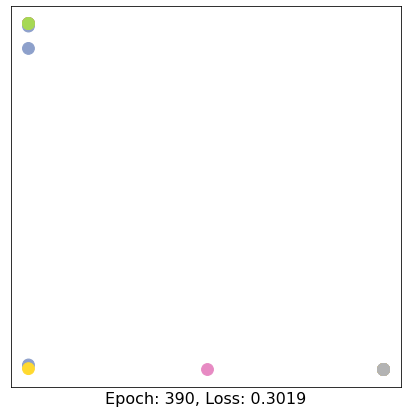

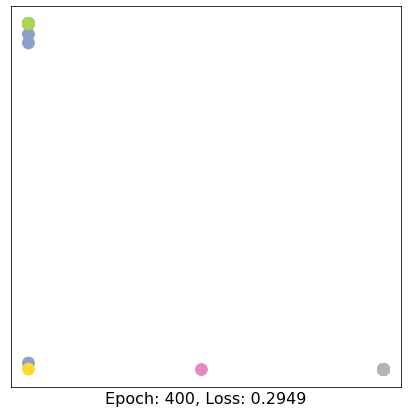

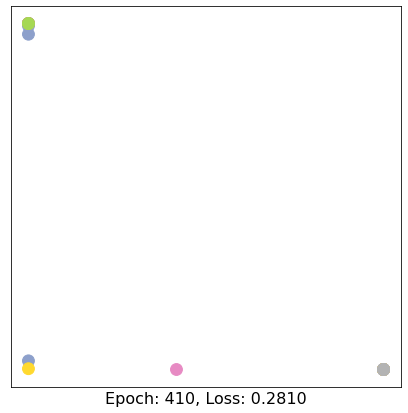

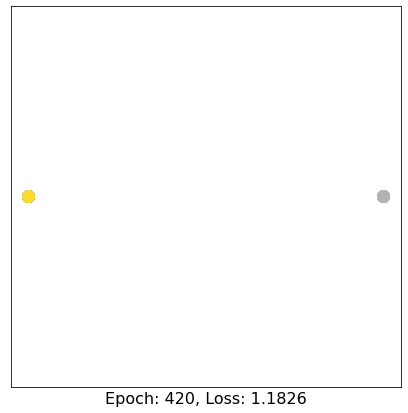

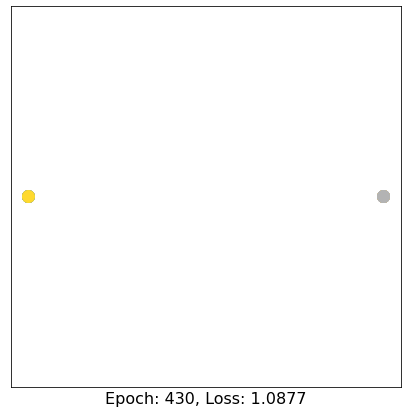

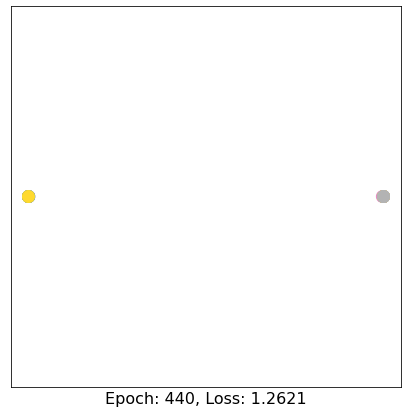

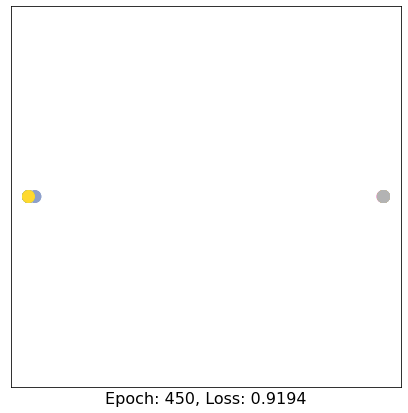

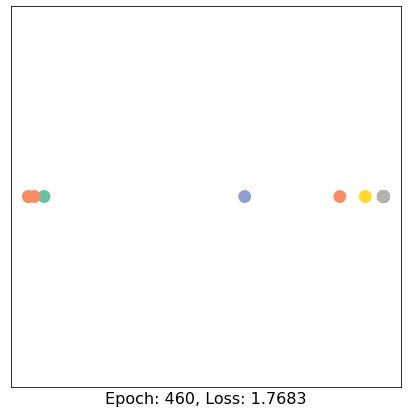

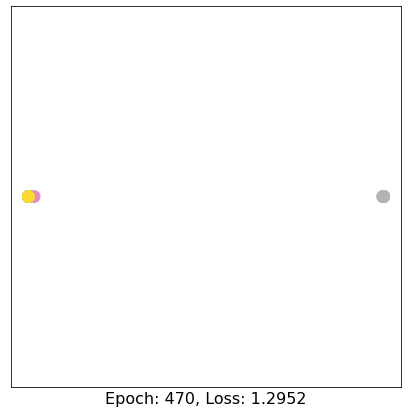

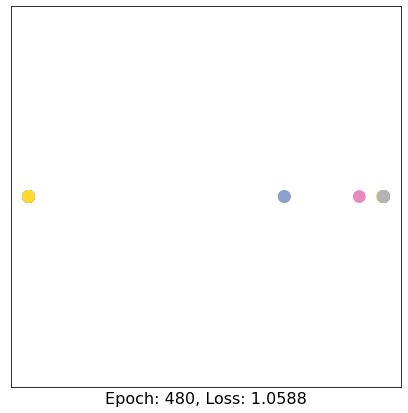

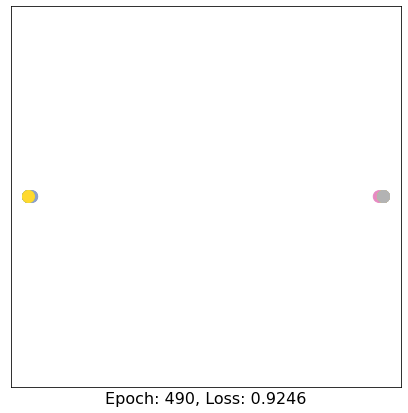

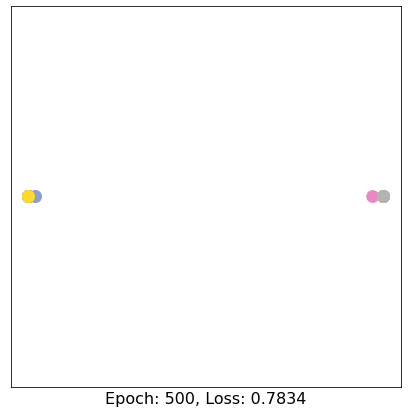

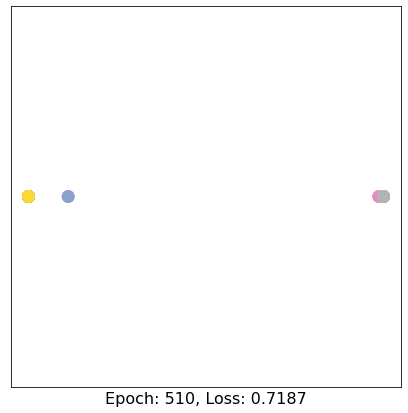

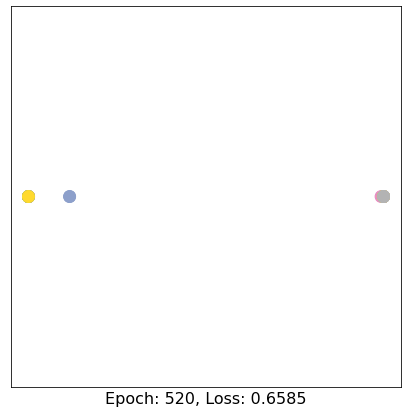

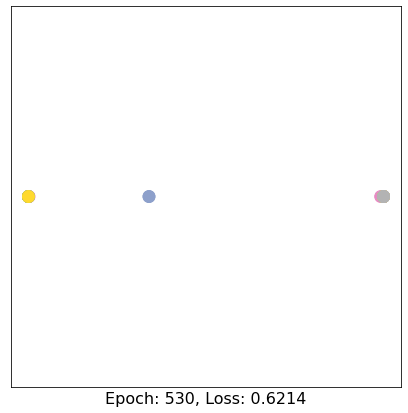

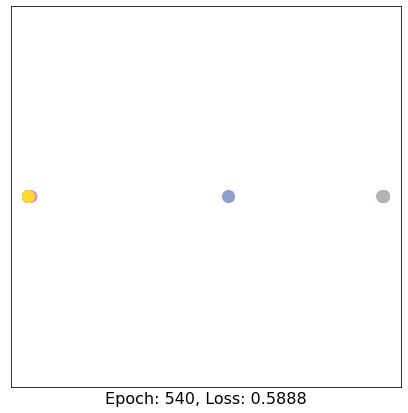

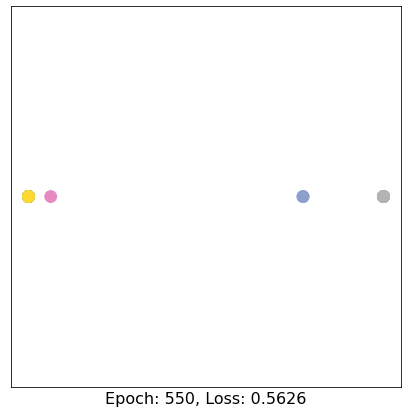

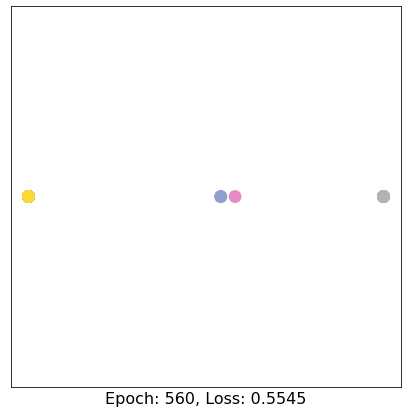

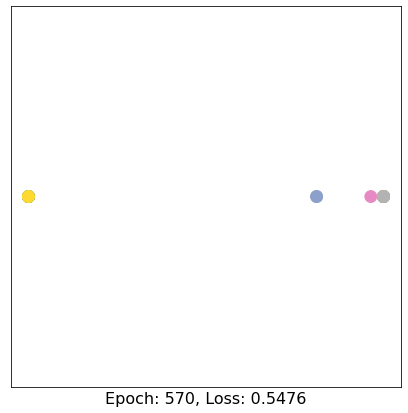

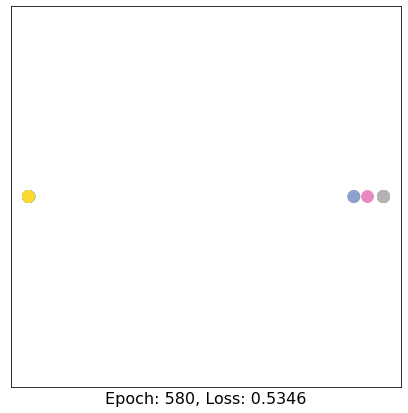

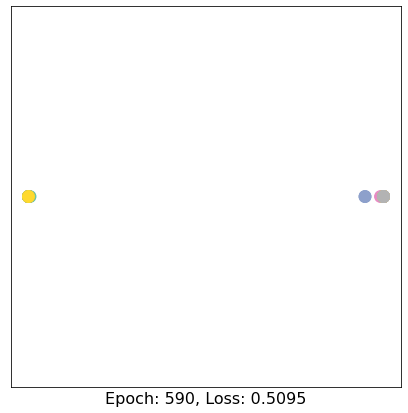

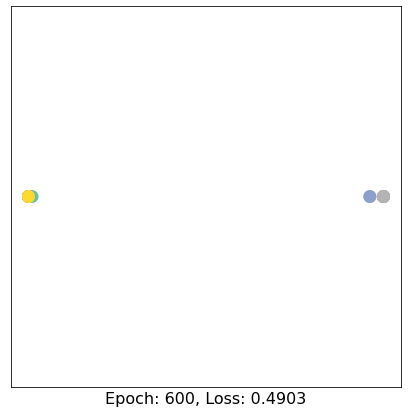

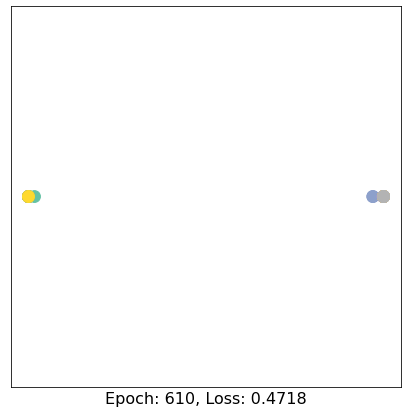

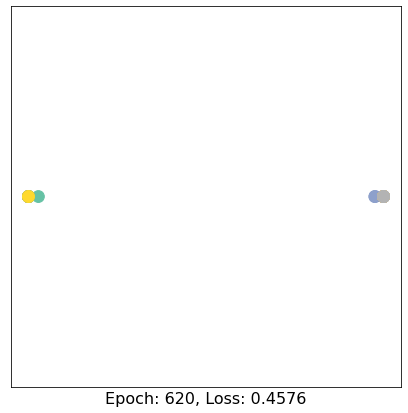

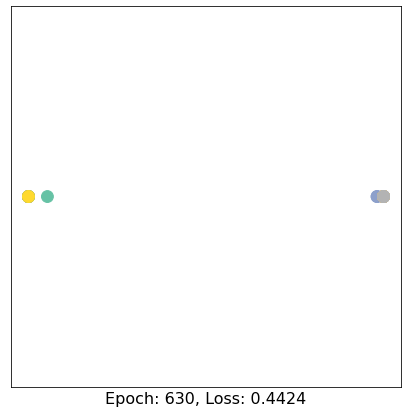

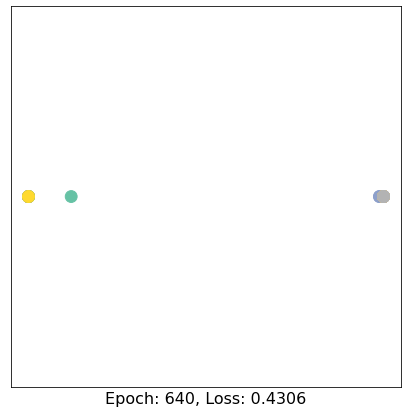

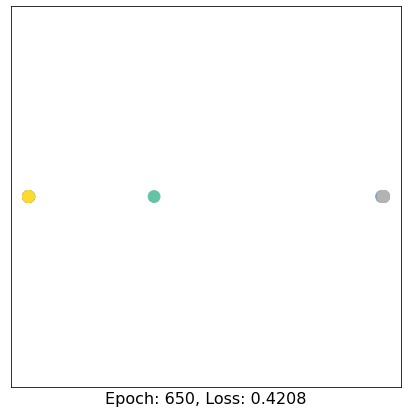

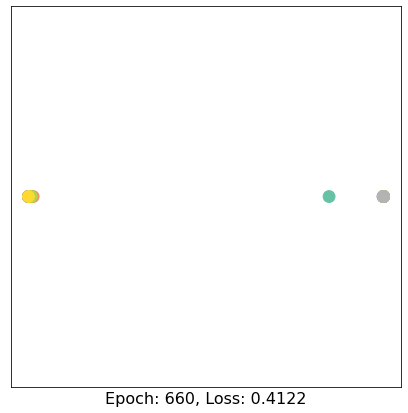

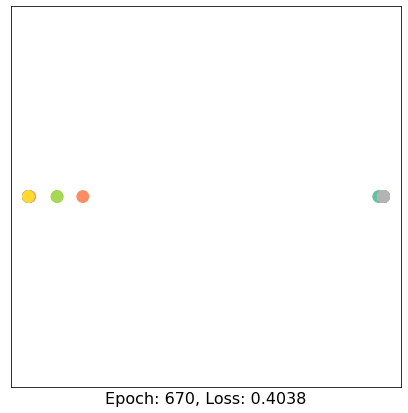

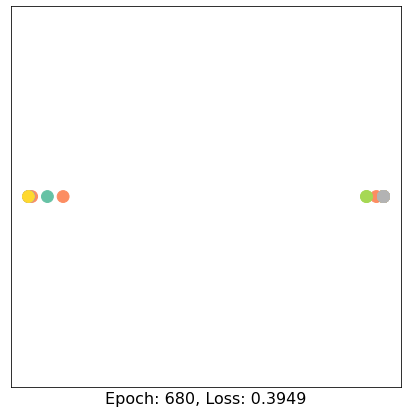

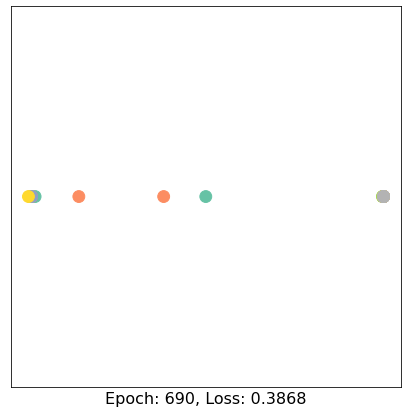

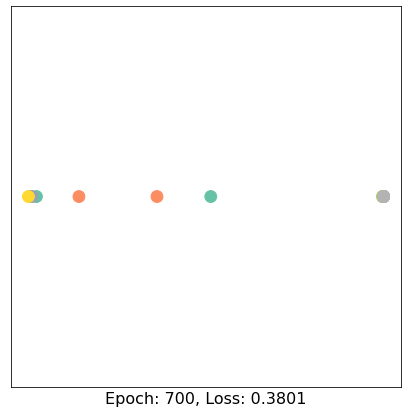

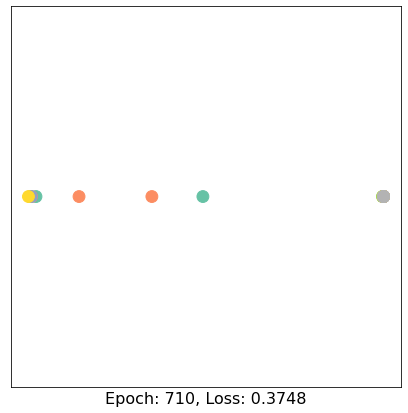

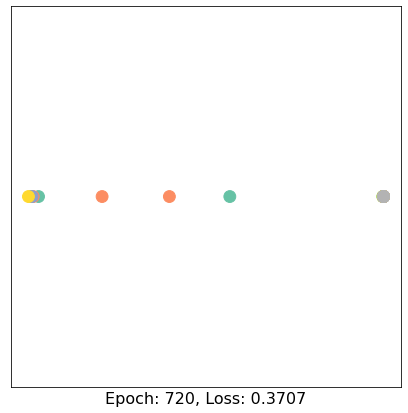

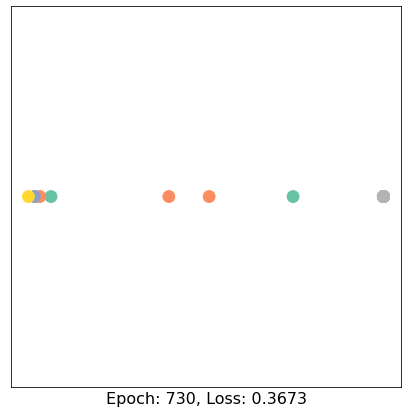

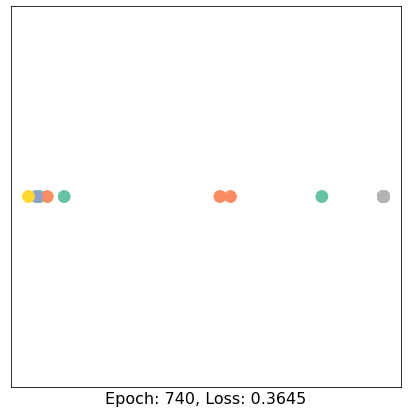

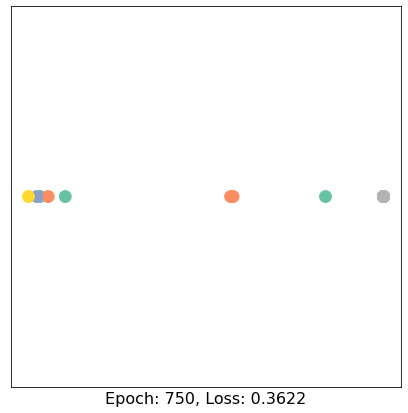

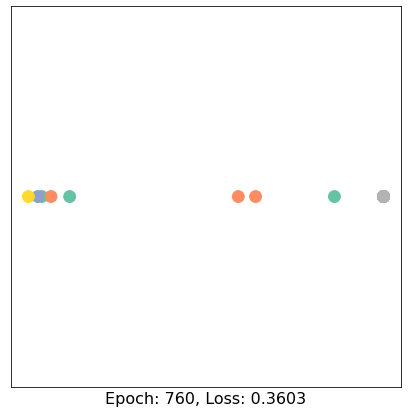

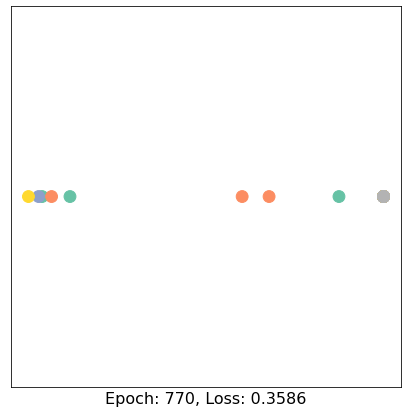

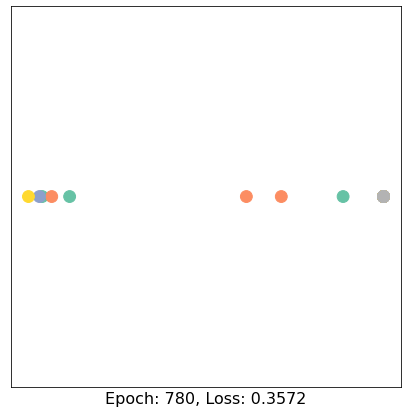

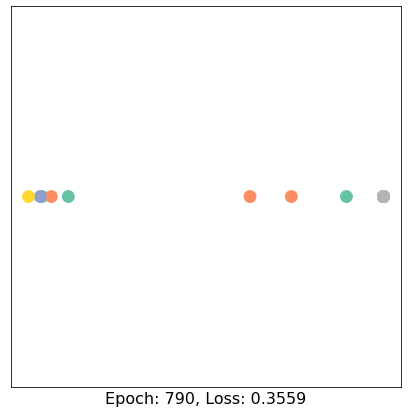

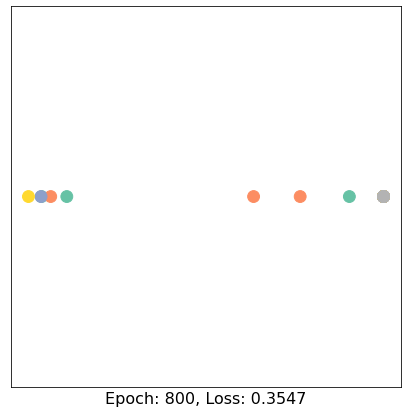

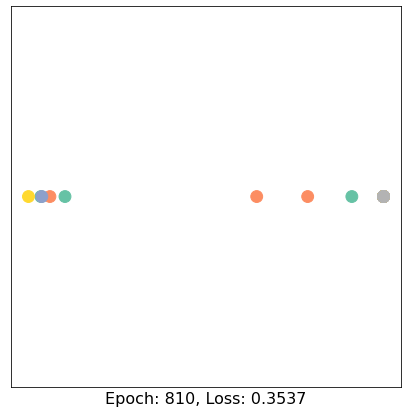

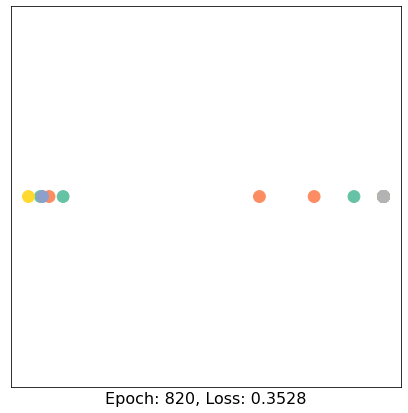

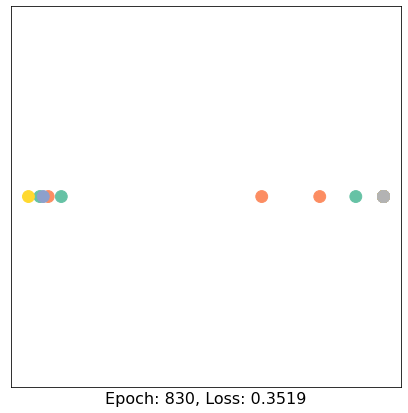

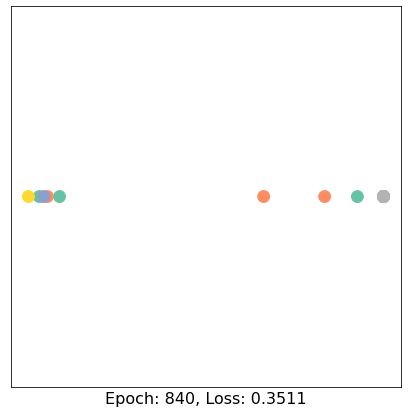

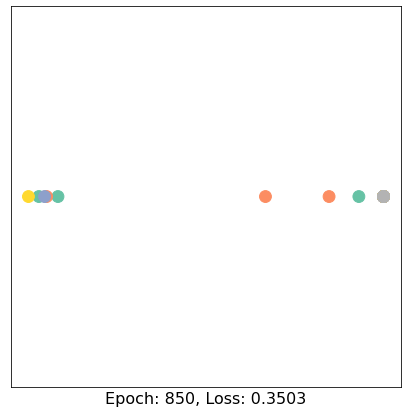

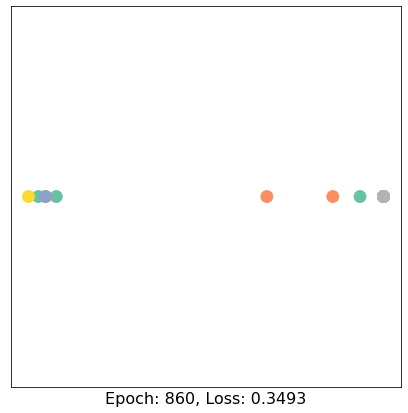

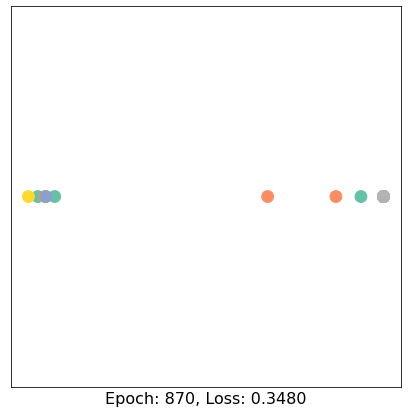

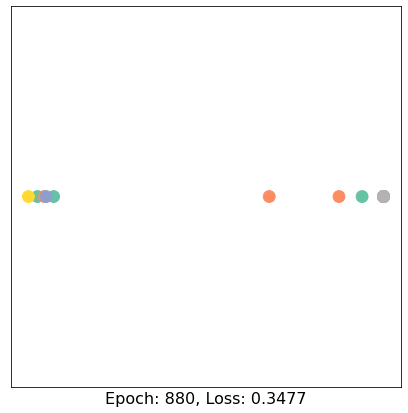

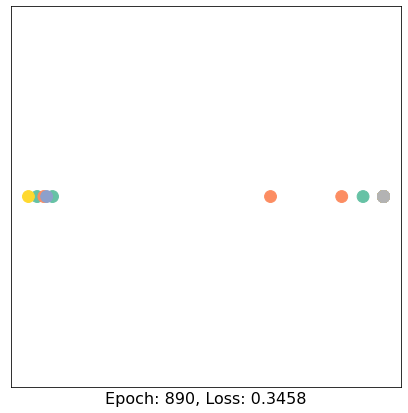

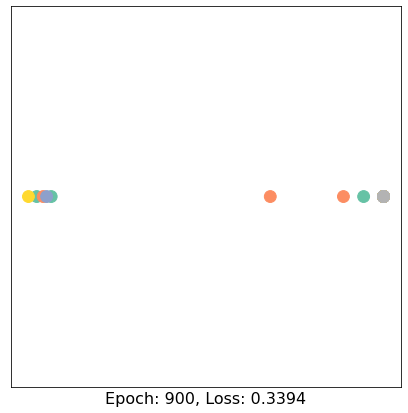

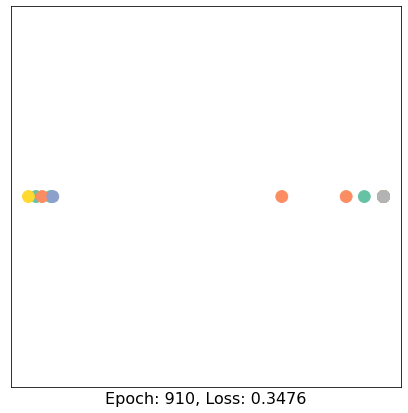

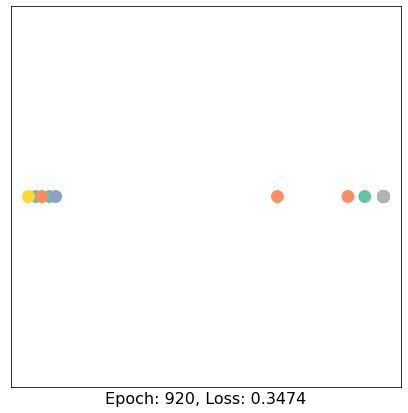

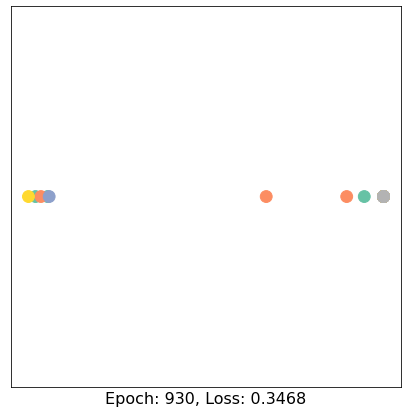

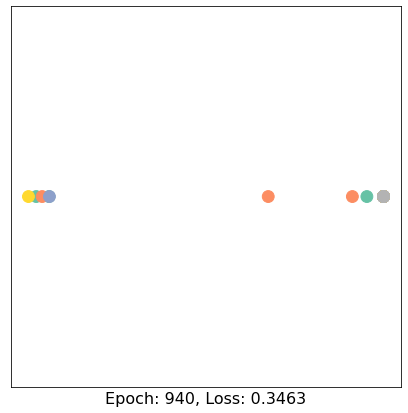

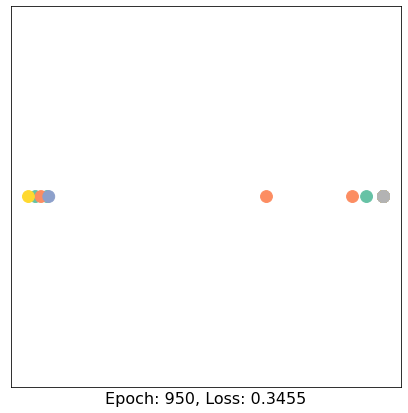

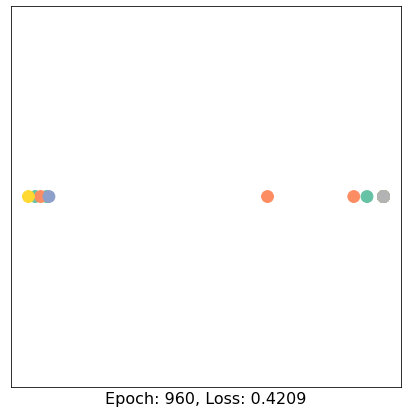

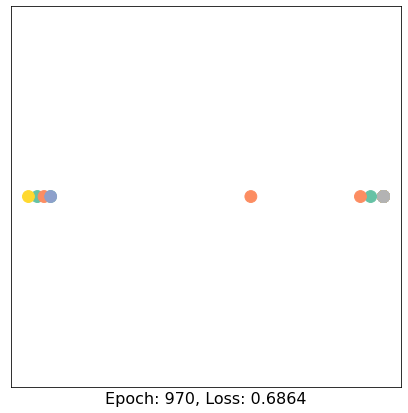

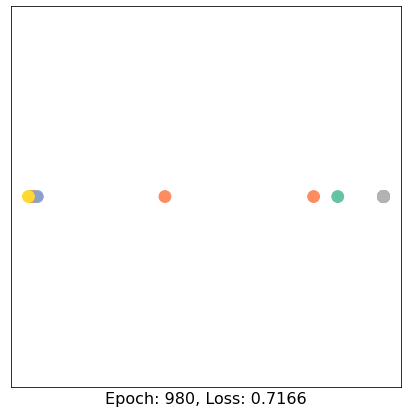

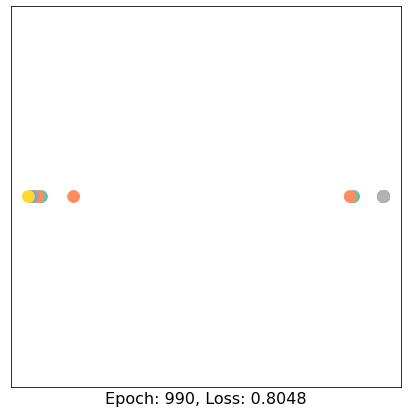

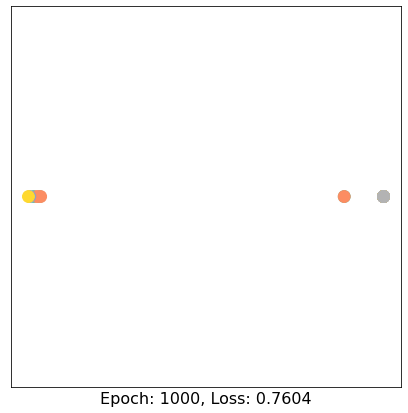

In [55]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN(poseTensor)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

for epoch in range(1001):
    loss, h = train(PoseData)
    if epoch % 10 == 0:
        visualize(h, color=PoseData.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

### 4. Face Training

<IPython.core.display.Javascript object>

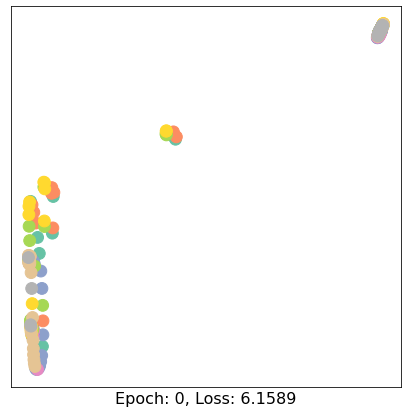

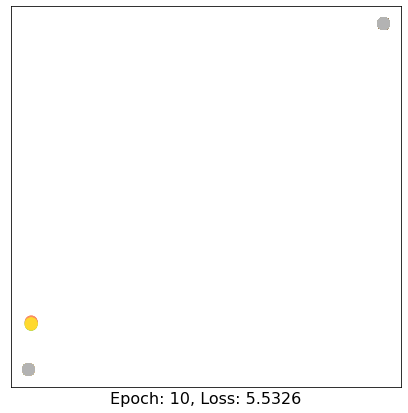

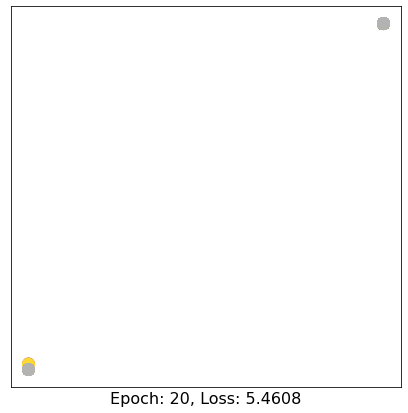

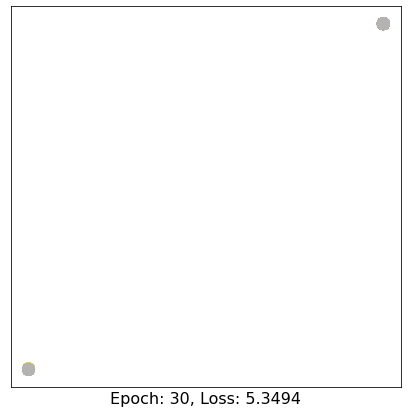

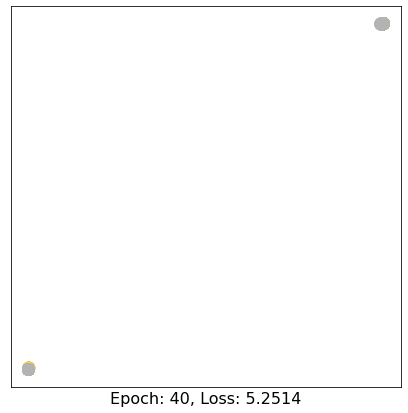

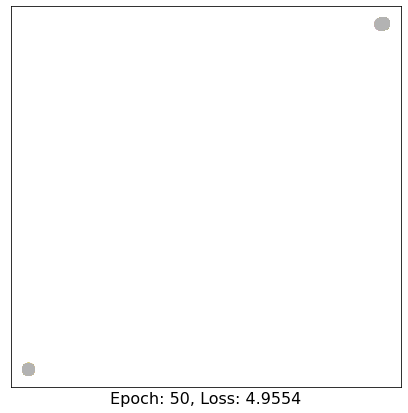

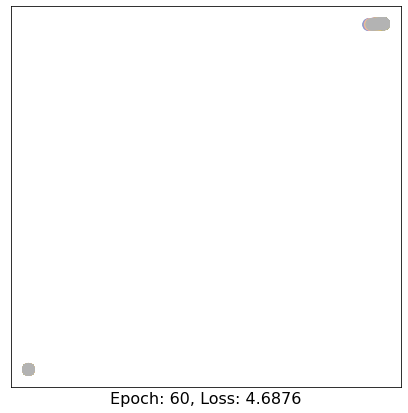

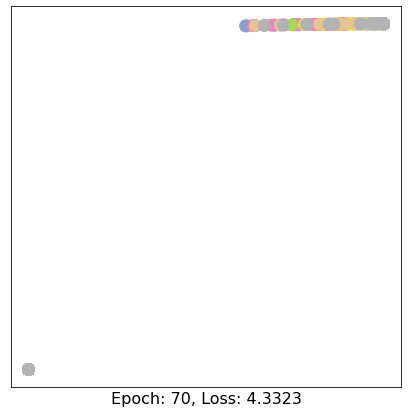

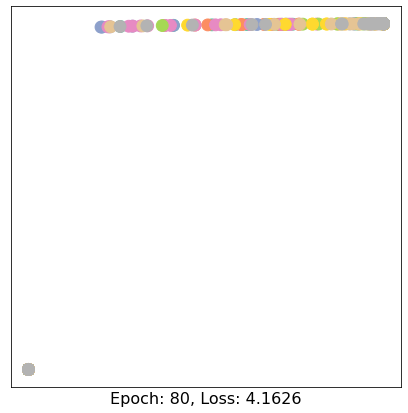

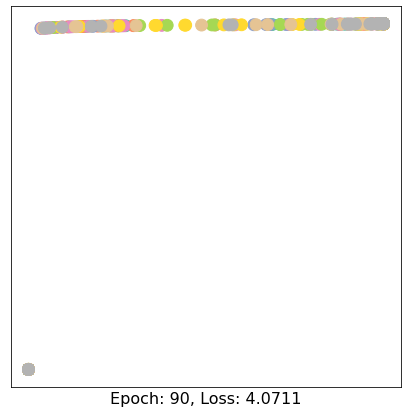

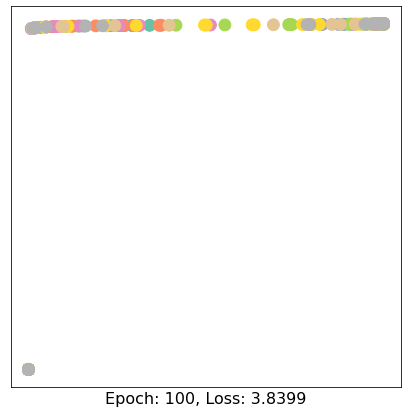

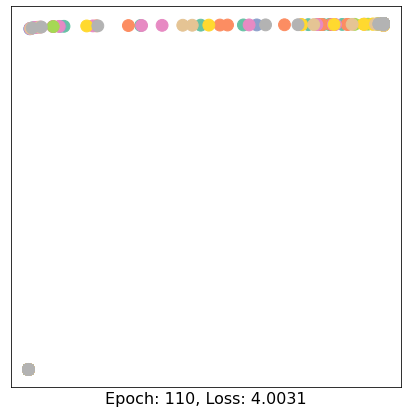

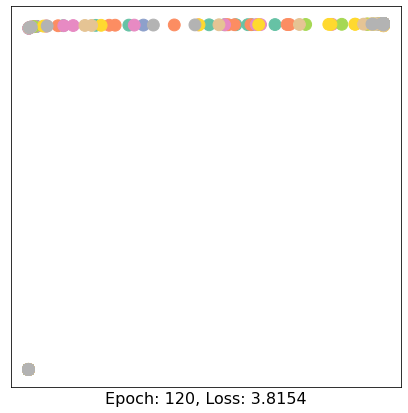

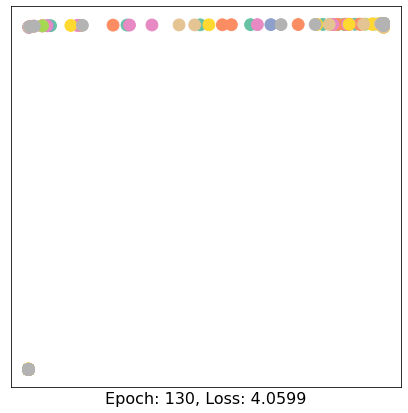

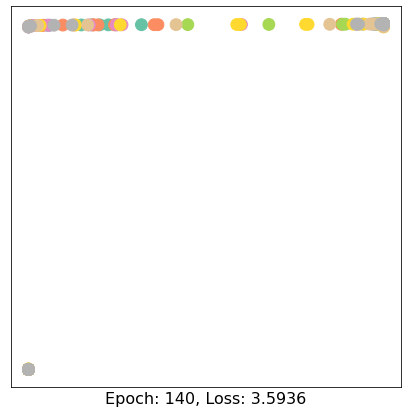

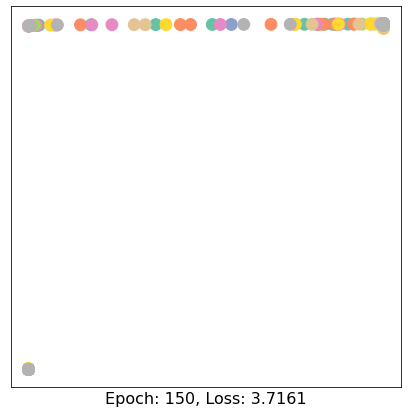

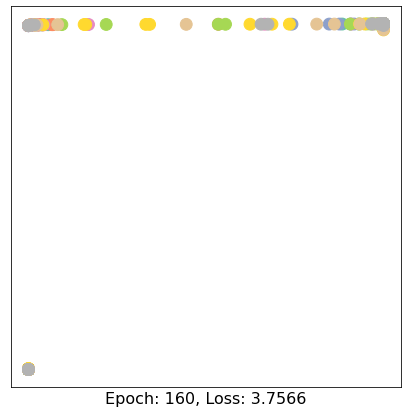

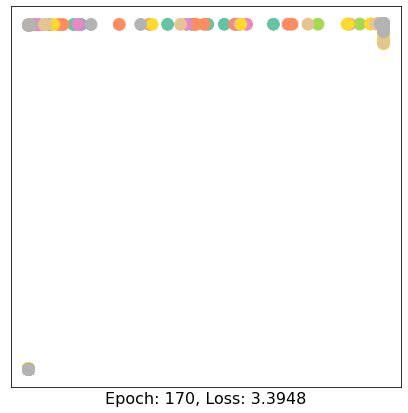

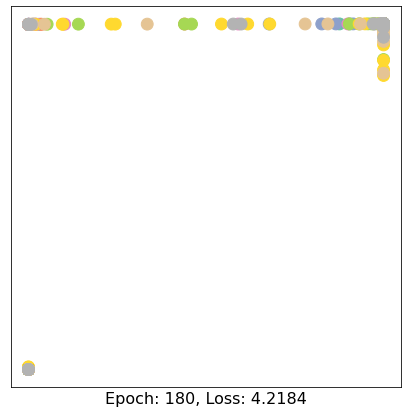

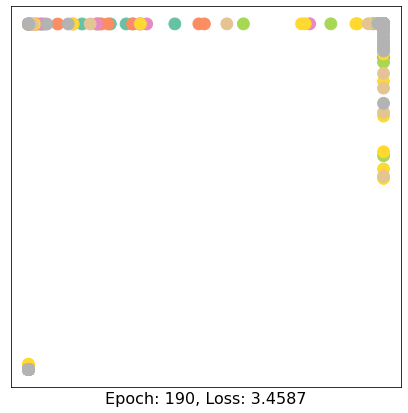

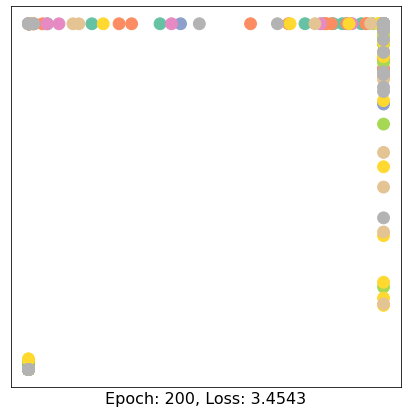

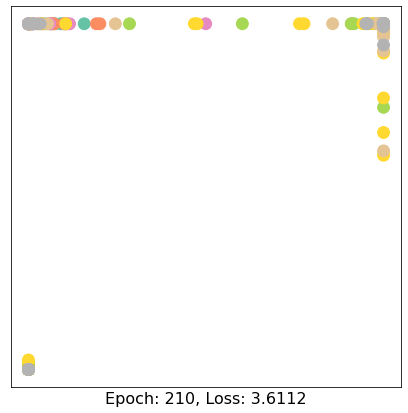

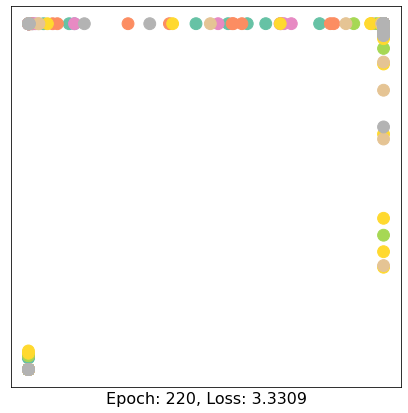

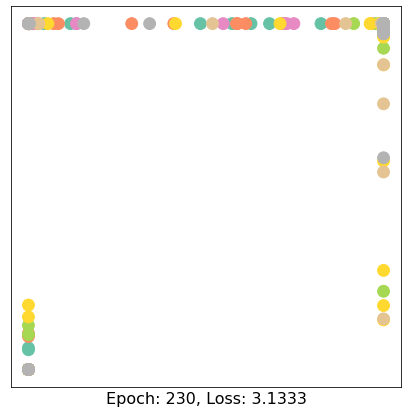

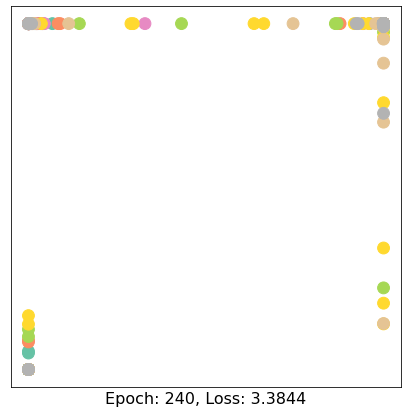

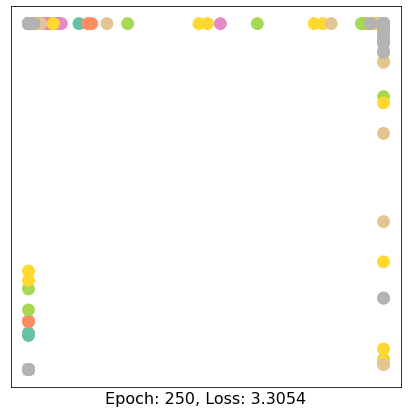

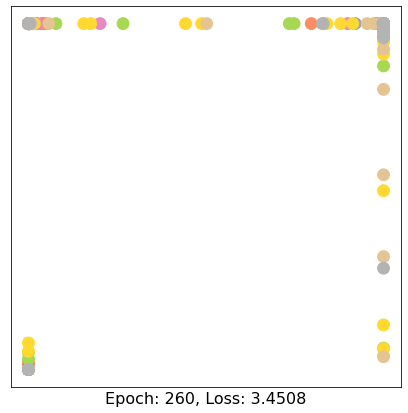

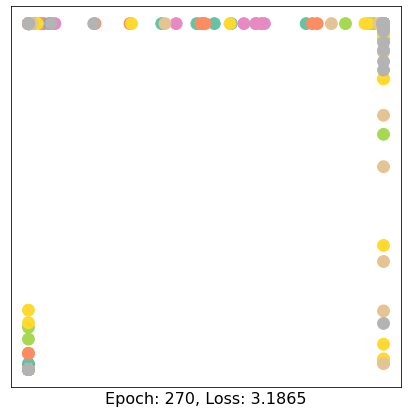

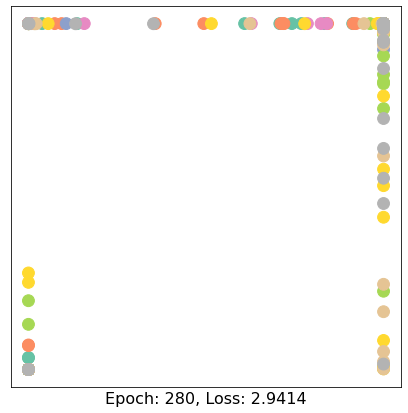

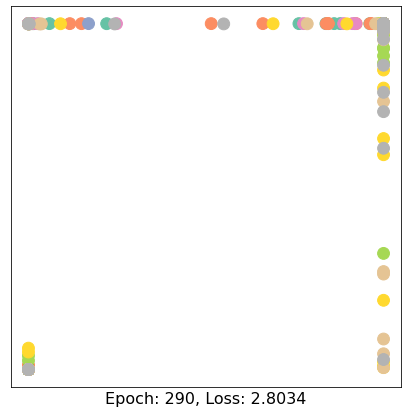

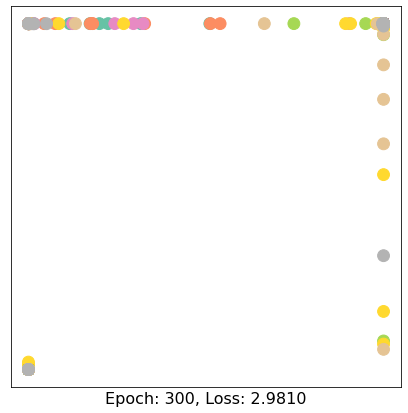

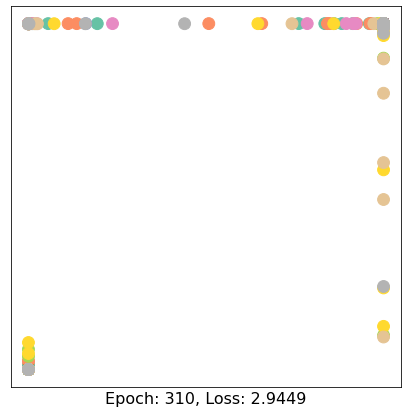

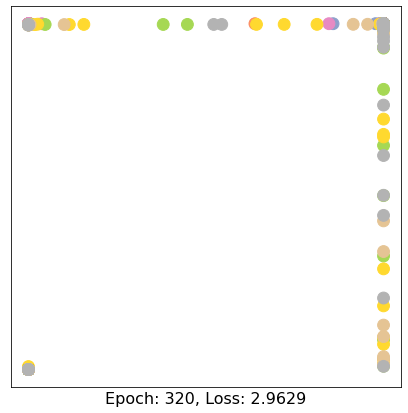

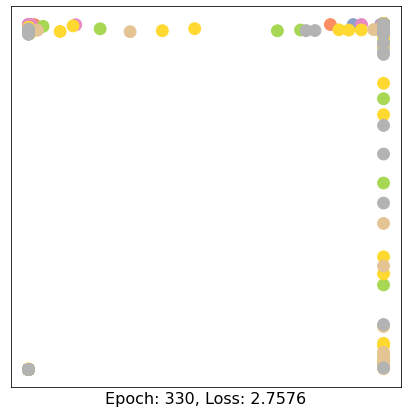

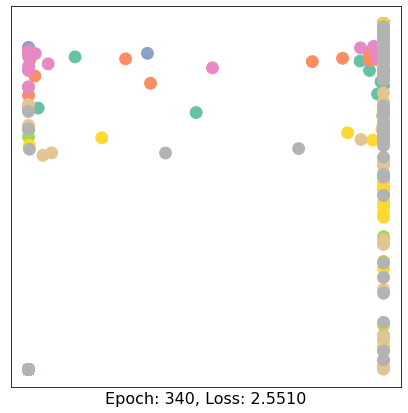

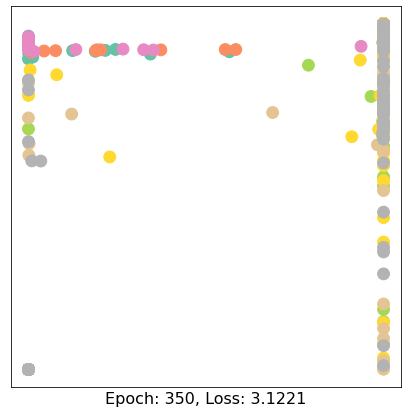

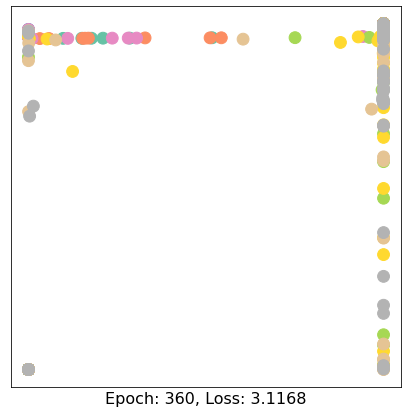

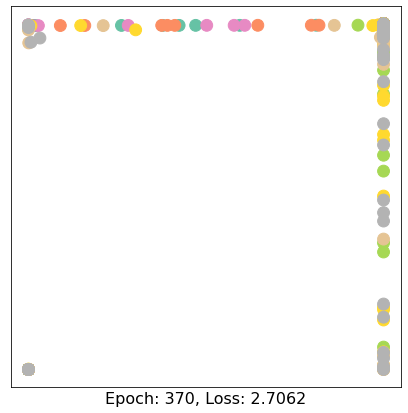

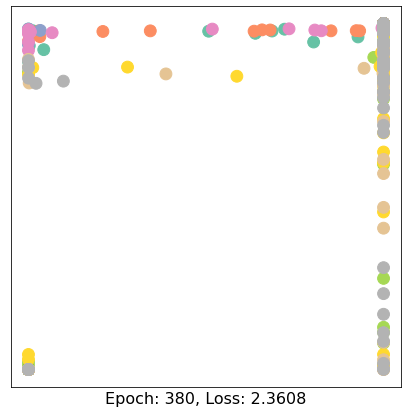

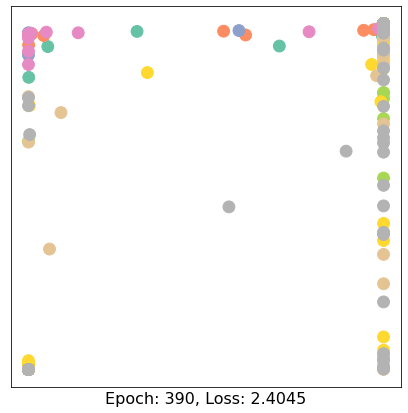

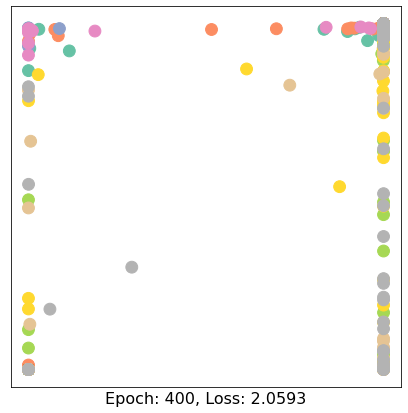

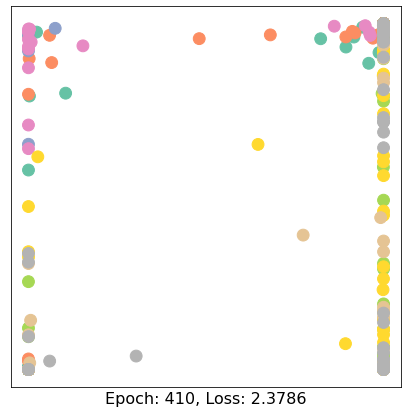

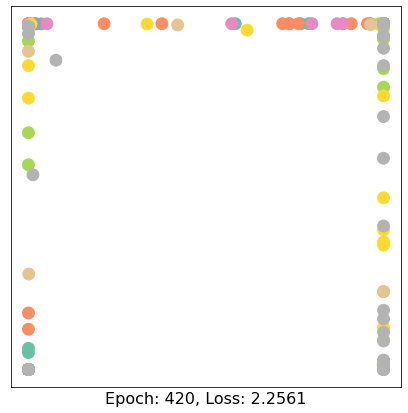

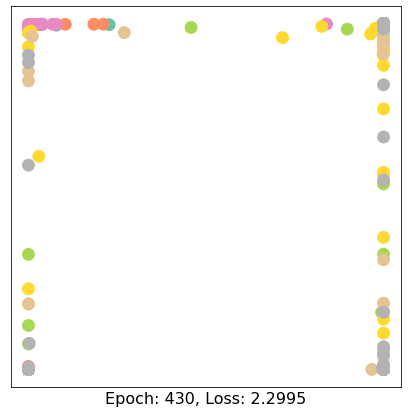

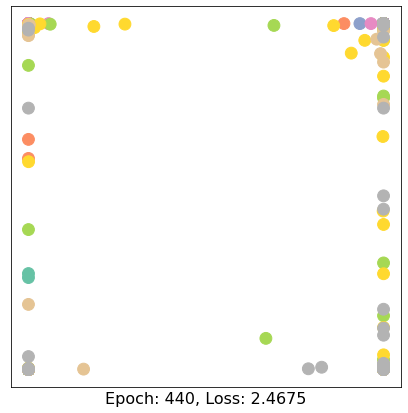

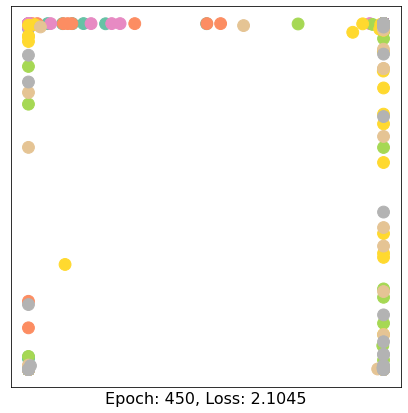

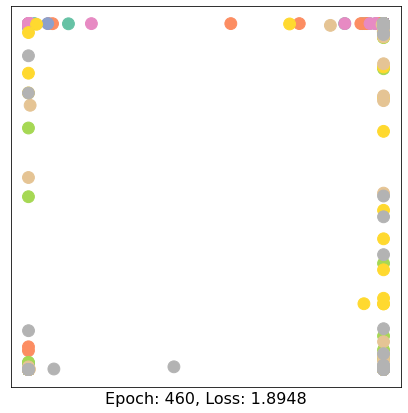

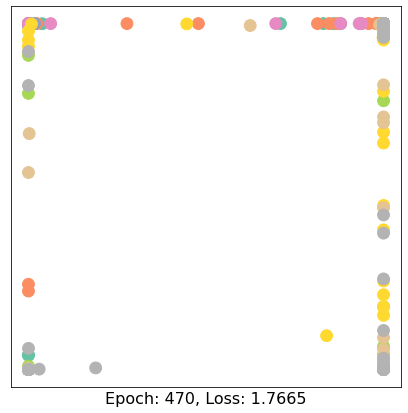

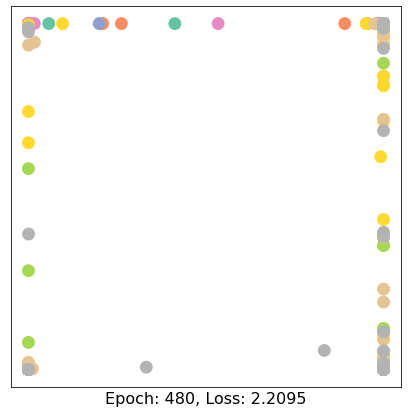

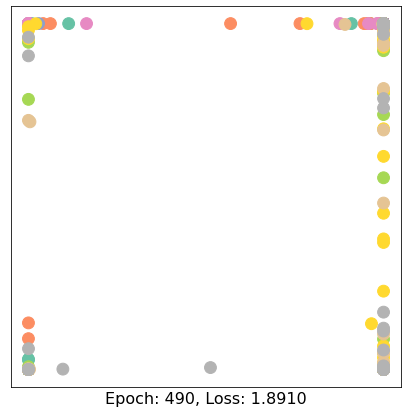

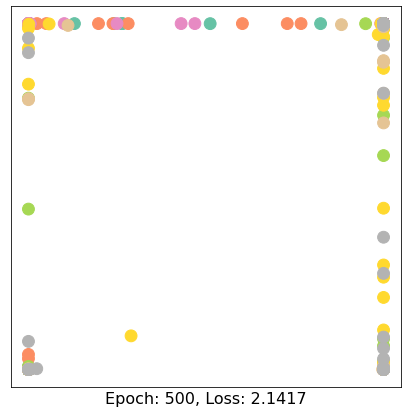

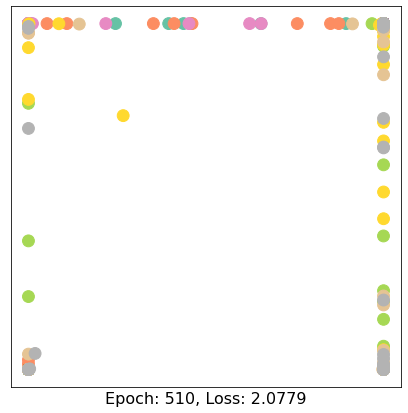

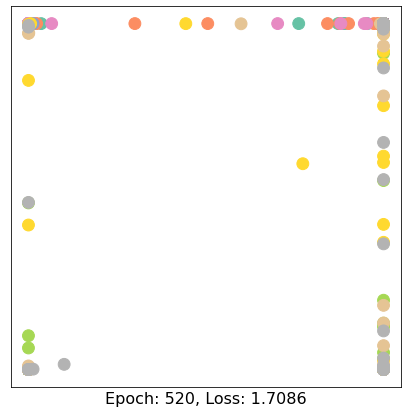

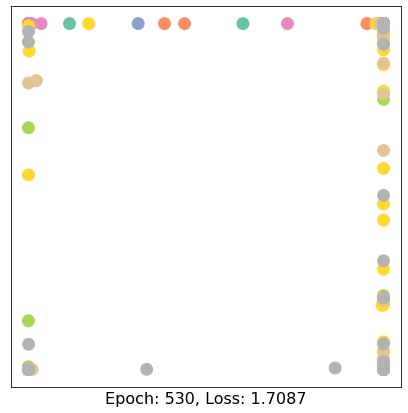

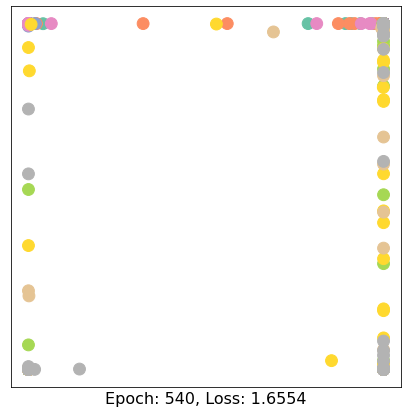

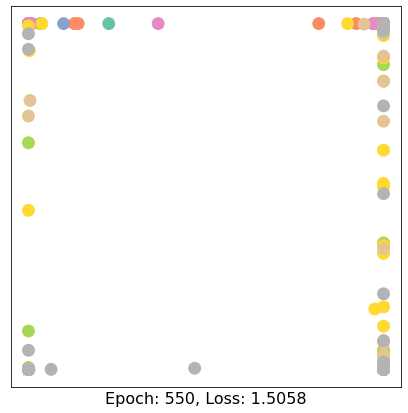

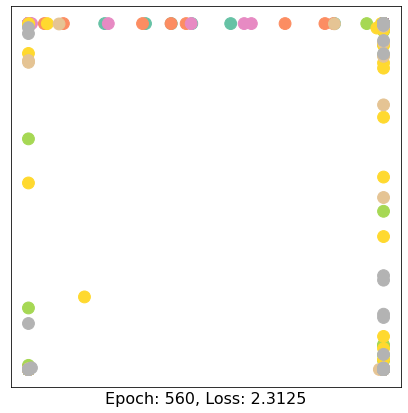

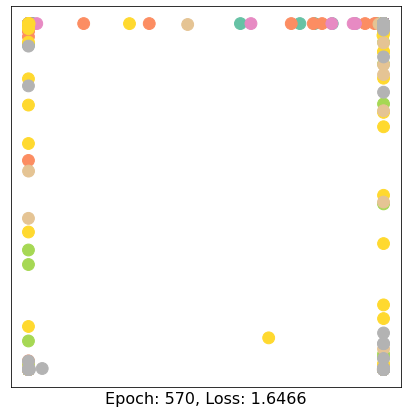

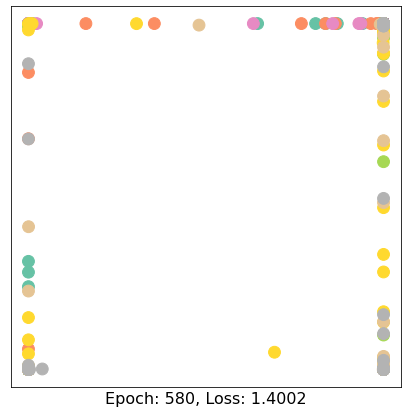

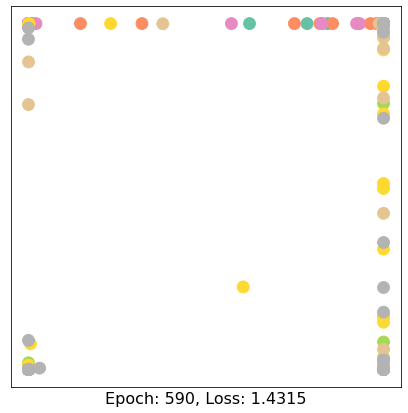

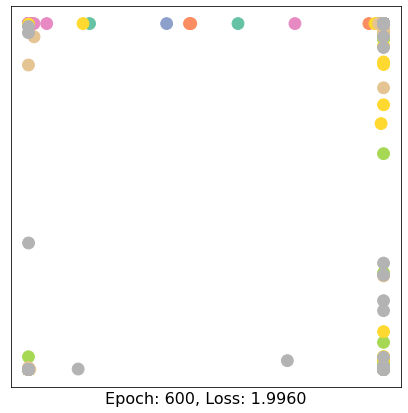

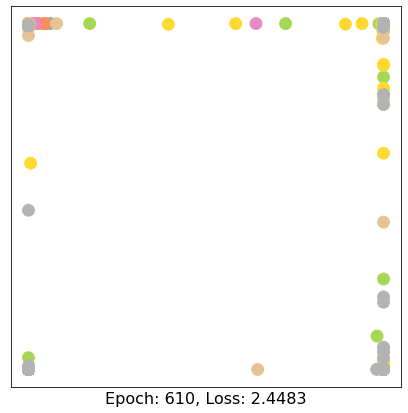

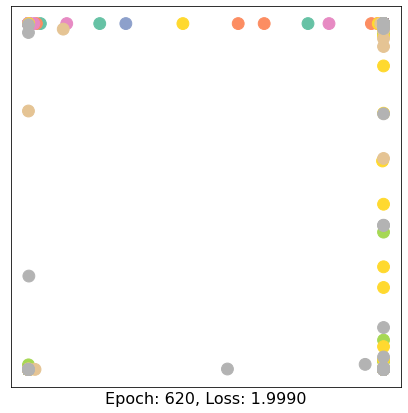

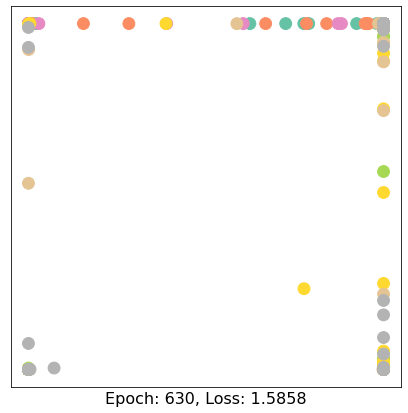

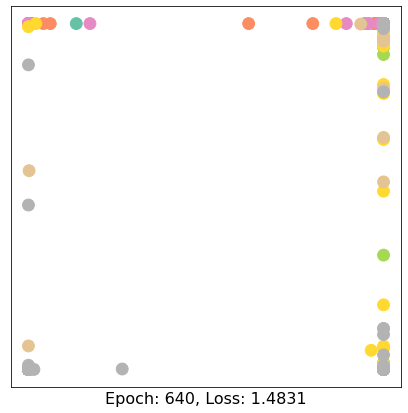

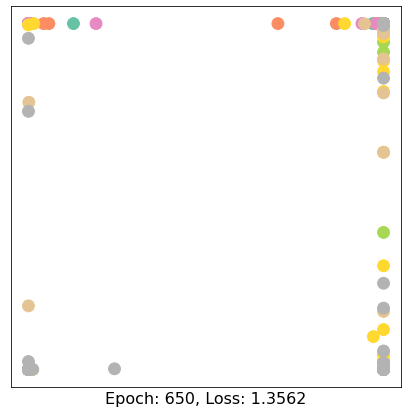

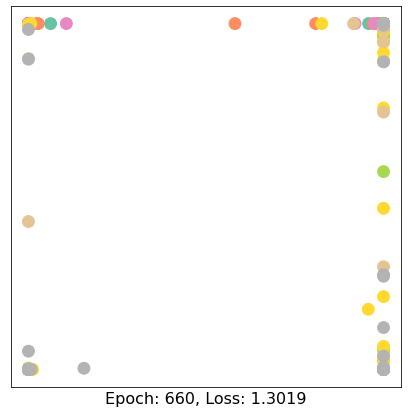

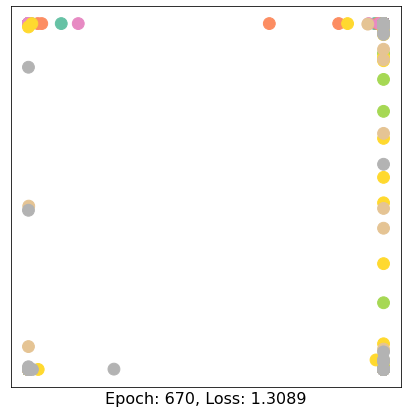

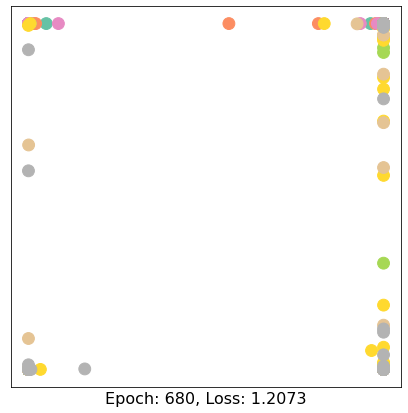

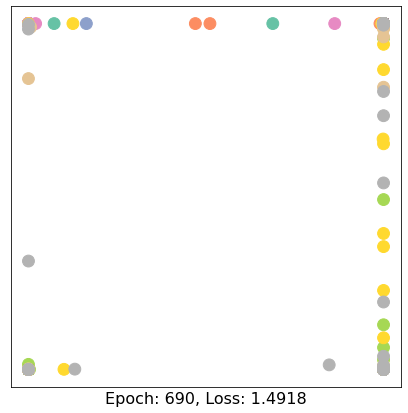

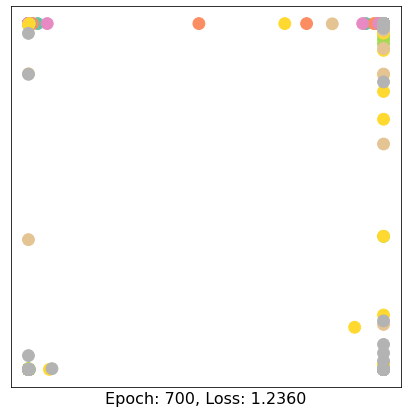

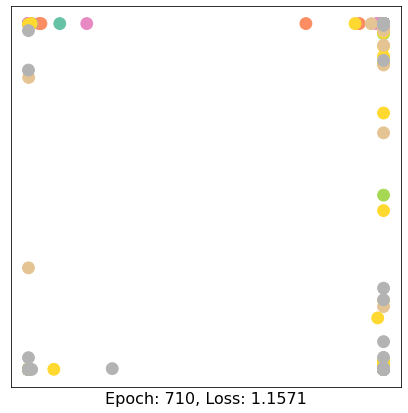

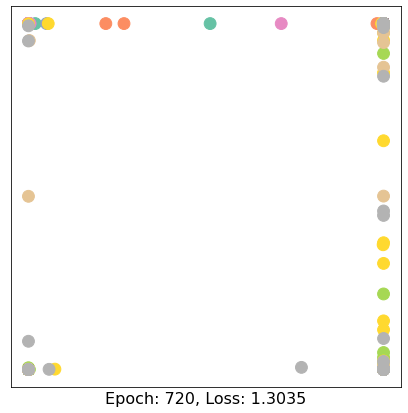

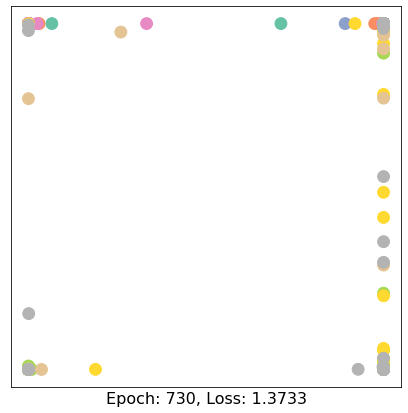

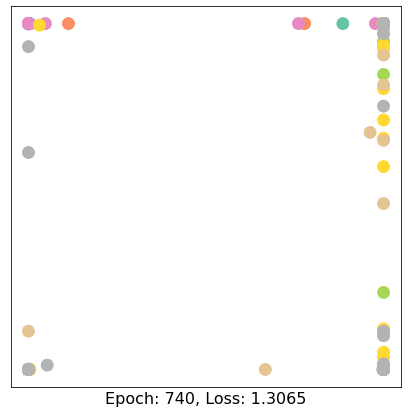

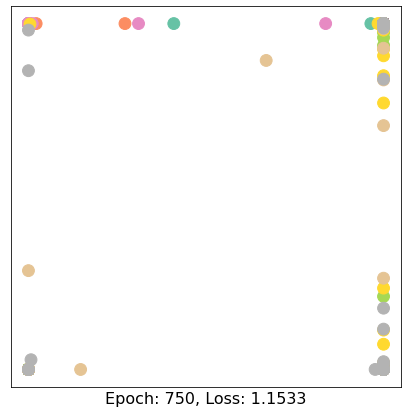

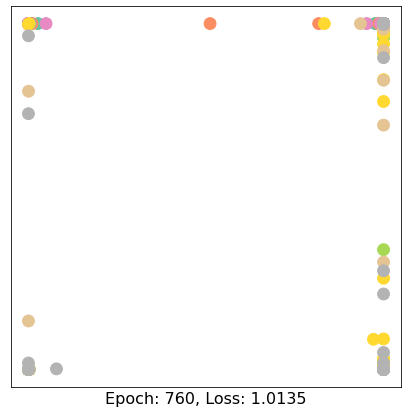

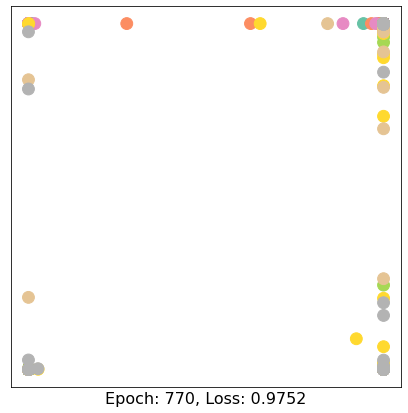

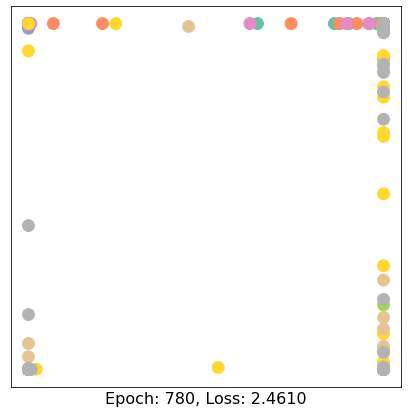

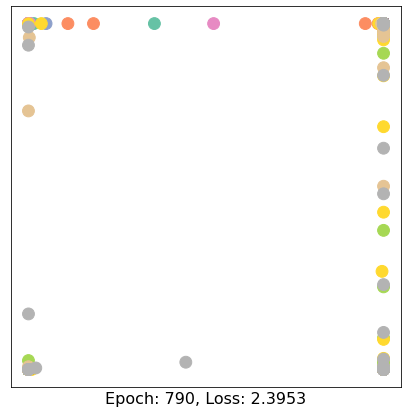

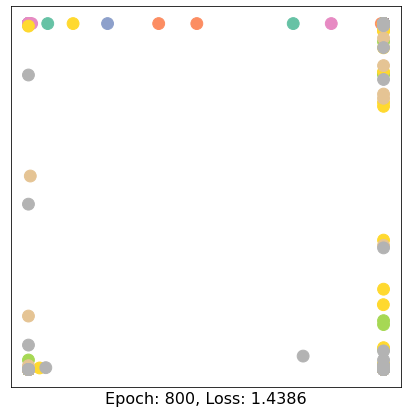

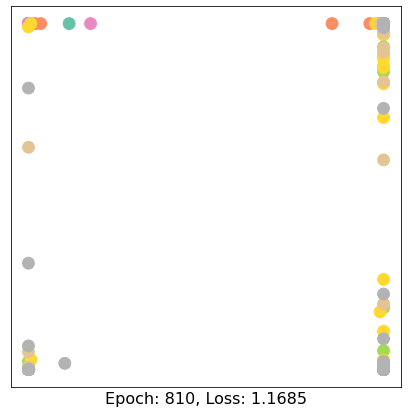

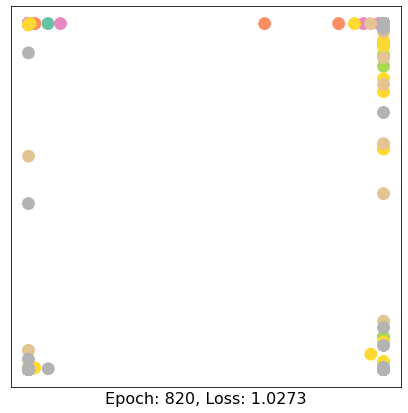

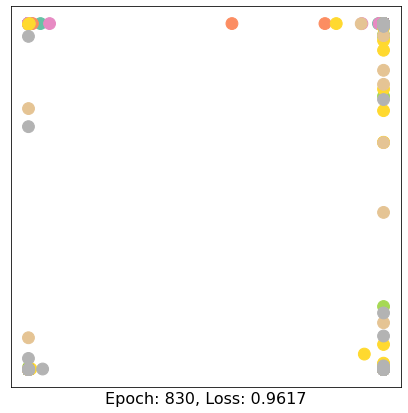

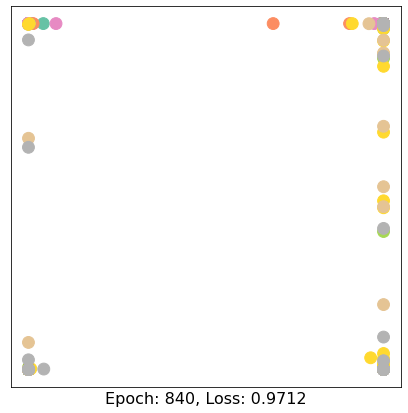

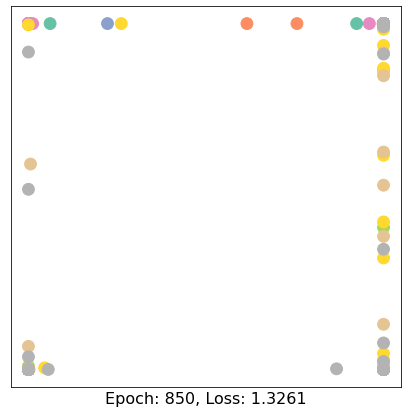

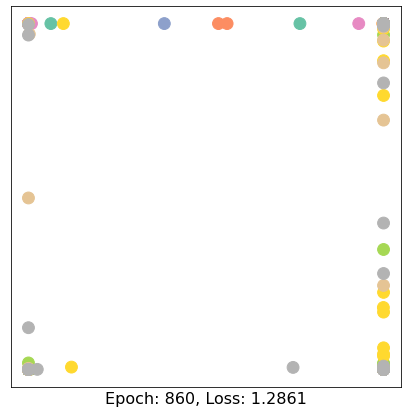

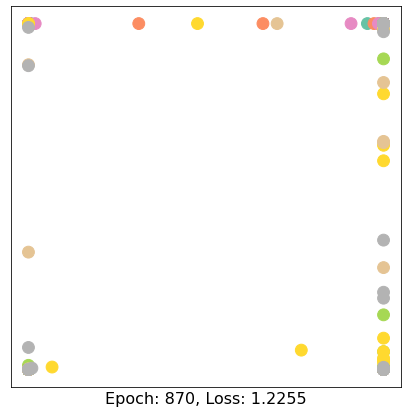

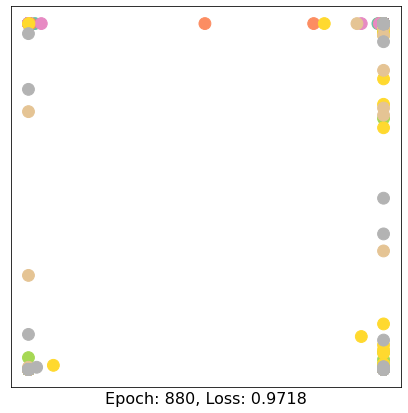

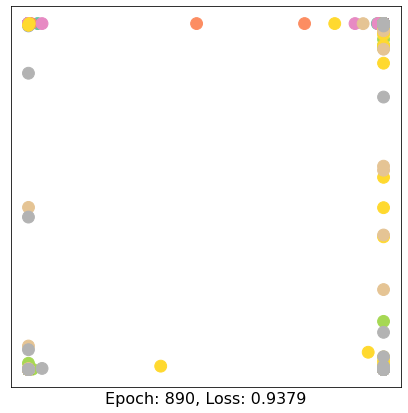

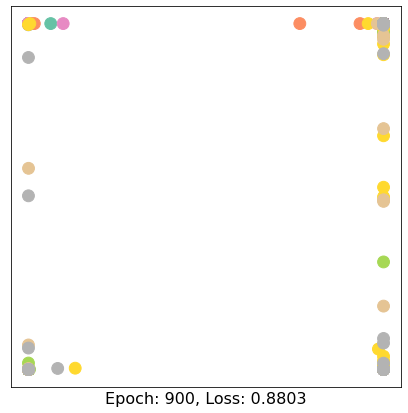

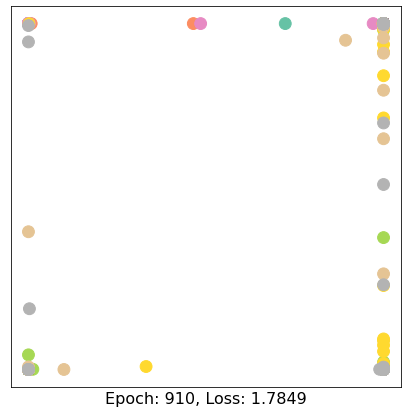

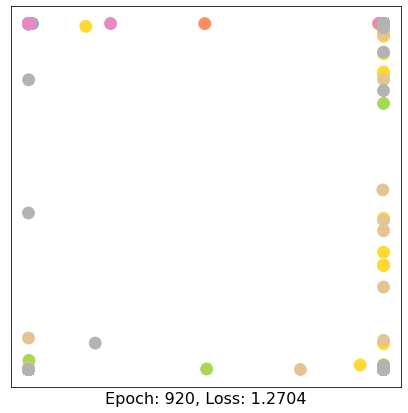

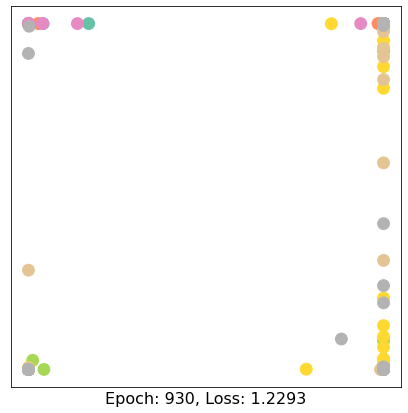

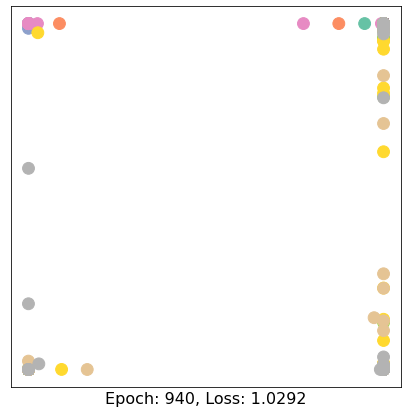

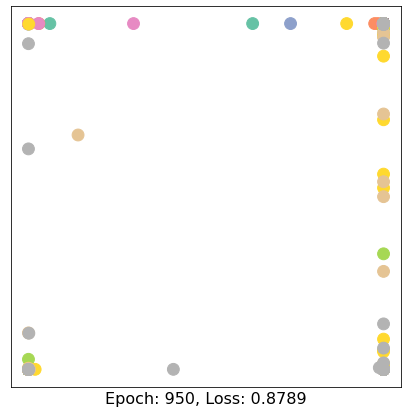

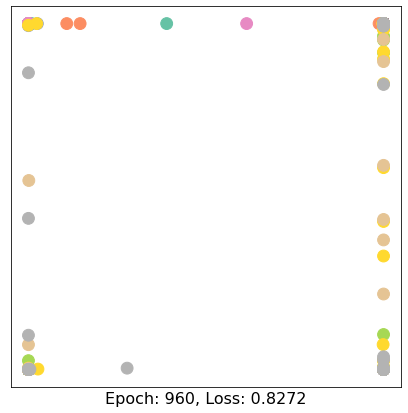

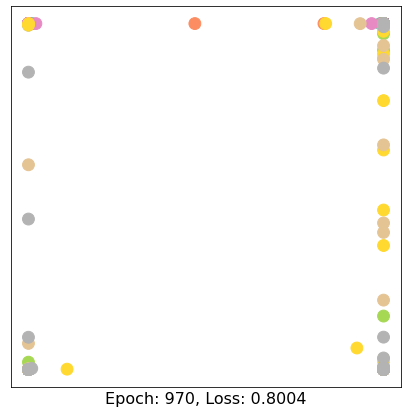

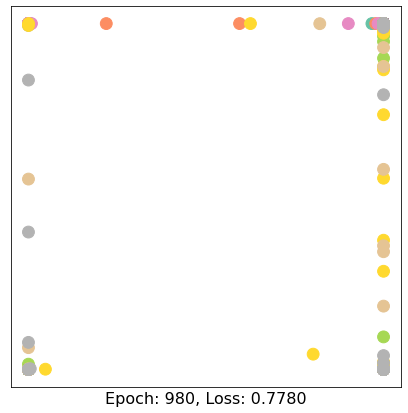

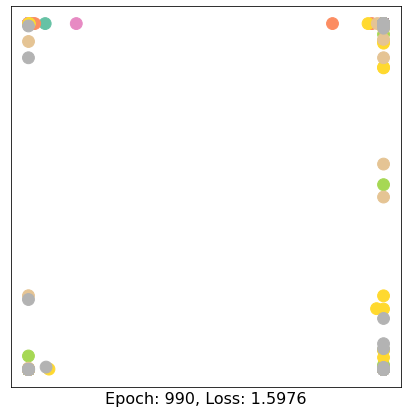

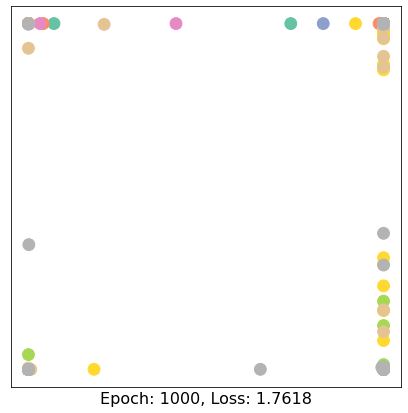

In [56]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN(FaceTensor)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

for epoch in range(1001):
    loss, h = train(FaceData)
    if epoch % 10 == 0:
        visualize(h, color=FaceData.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

Embedding shape: [21, 128], 0frame


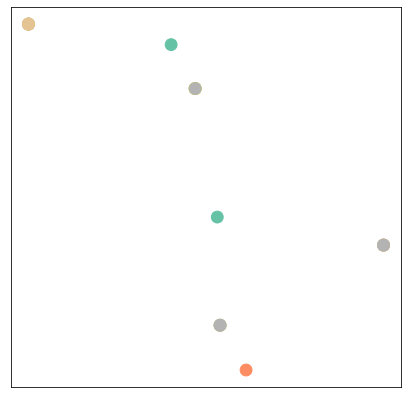

Embedding shape: [21, 128], 1frame


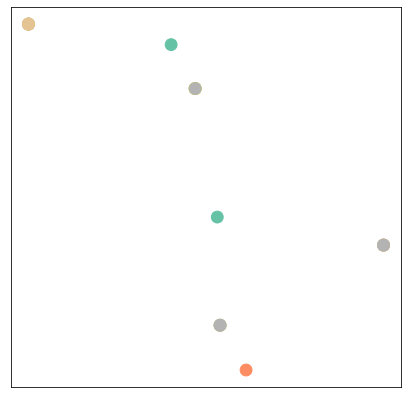

Embedding shape: [21, 128], 2frame


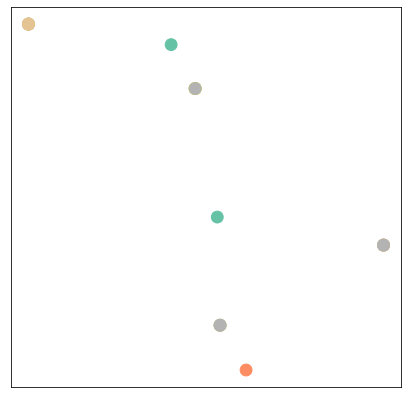

Embedding shape: [21, 128], 3frame


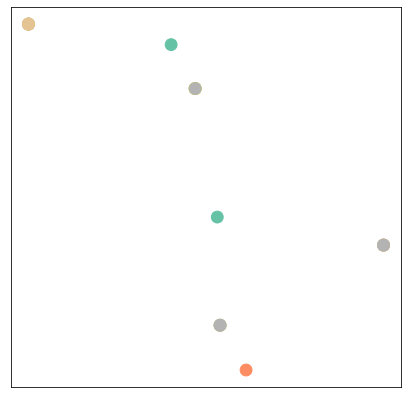

Embedding shape: [21, 128], 4frame


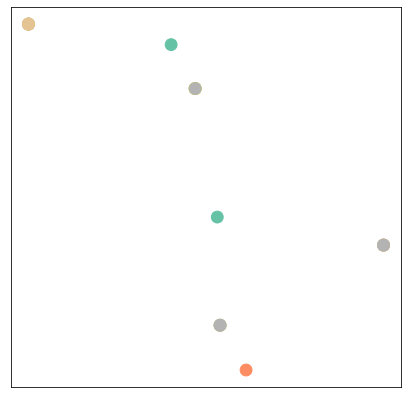

Embedding shape: [21, 128], 5frame


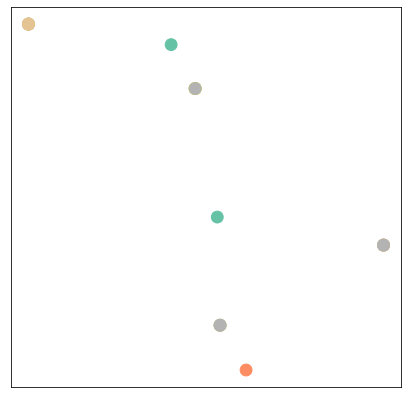

Embedding shape: [21, 128], 6frame


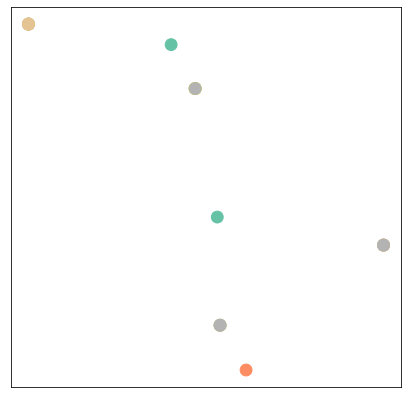

Embedding shape: [21, 128], 7frame


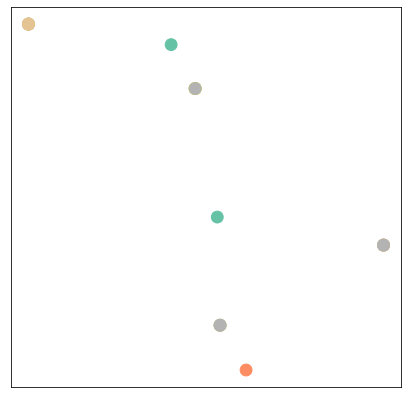

Embedding shape: [21, 128], 8frame


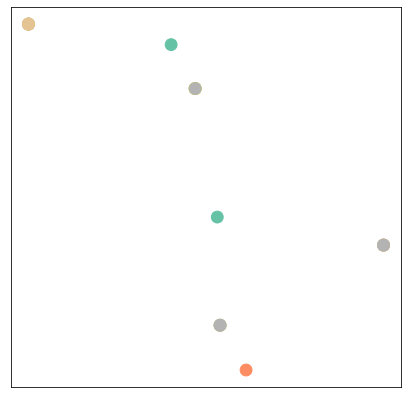

Embedding shape: [21, 128], 9frame


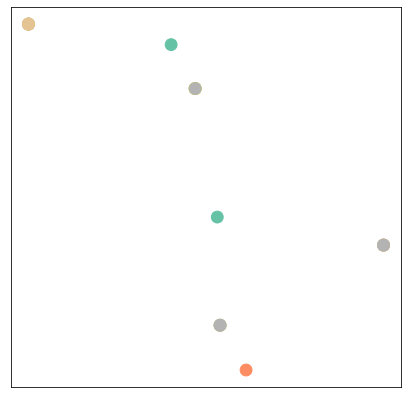

Embedding shape: [21, 128], 10frame


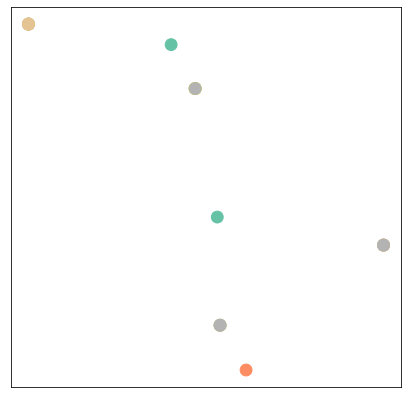

Embedding shape: [21, 128], 11frame


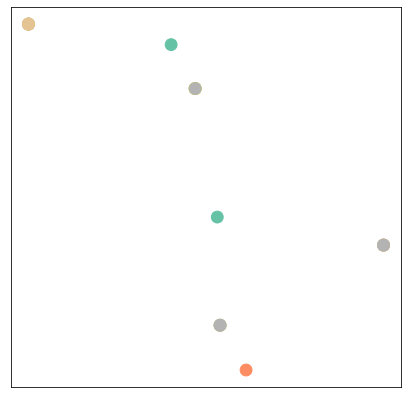

Embedding shape: [21, 128], 12frame


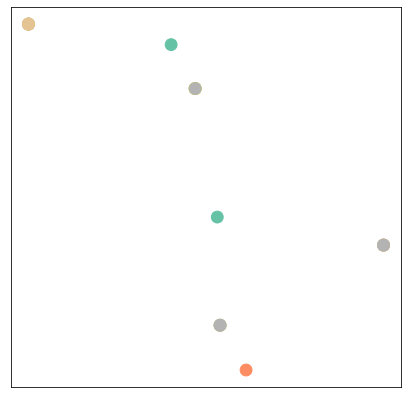

Embedding shape: [21, 128], 13frame


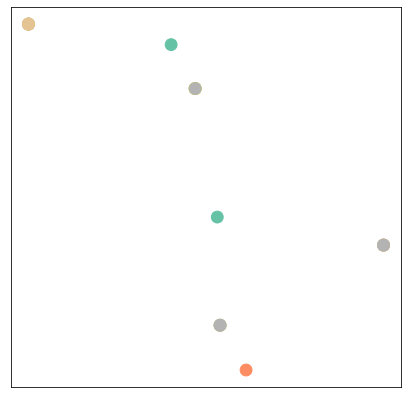

Embedding shape: [21, 128], 14frame


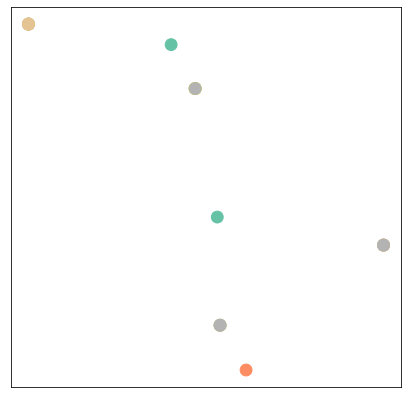

Embedding shape: [21, 128], 15frame


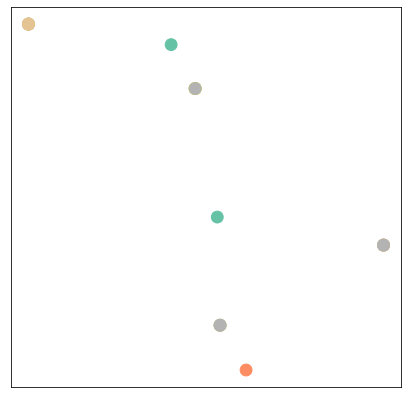

Embedding shape: [21, 128], 16frame


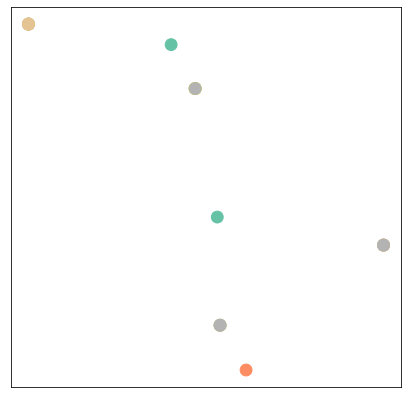

Embedding shape: [21, 128], 17frame


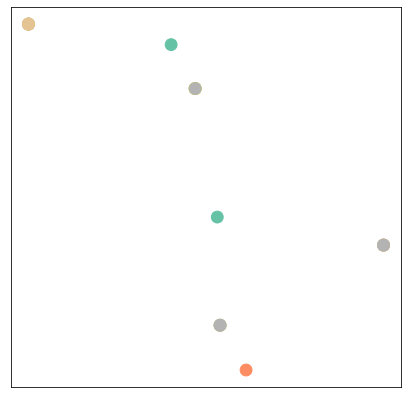

Embedding shape: [21, 128], 18frame


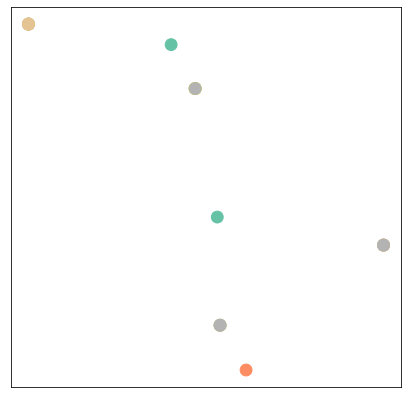

Embedding shape: [21, 128], 19frame


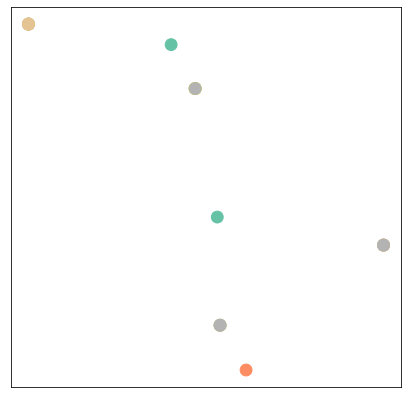

Embedding shape: [21, 128], 20frame


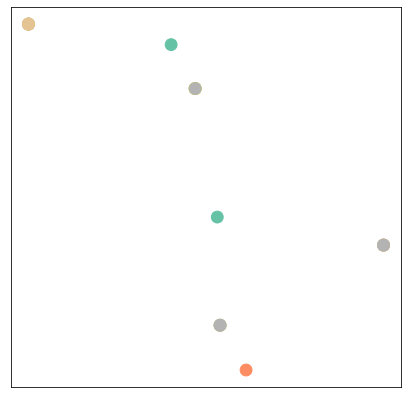

Embedding shape: [21, 128], 21frame


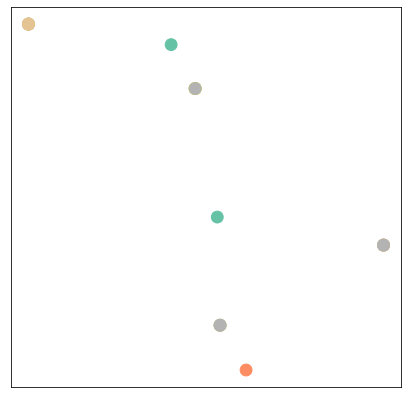

Embedding shape: [21, 128], 22frame


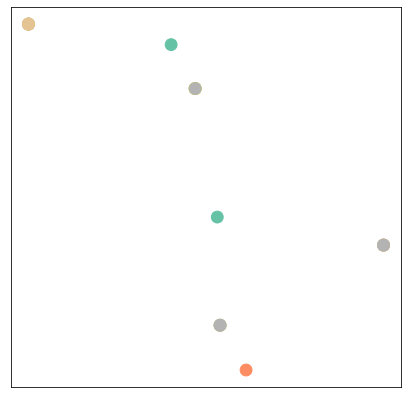

Embedding shape: [21, 128], 23frame


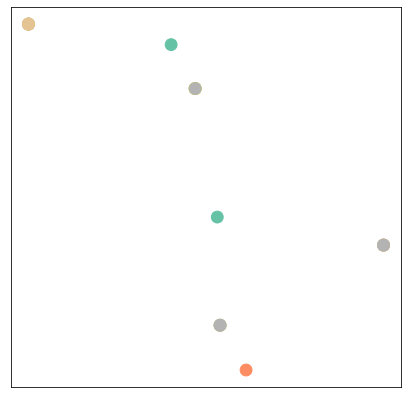

Embedding shape: [21, 128], 24frame


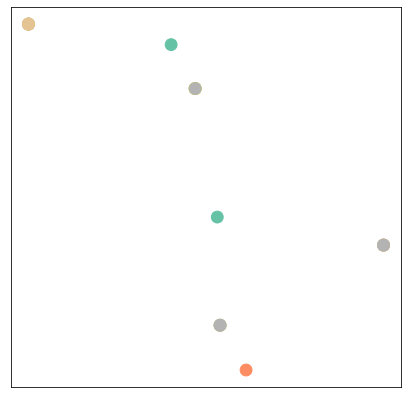

Embedding shape: [21, 128], 25frame


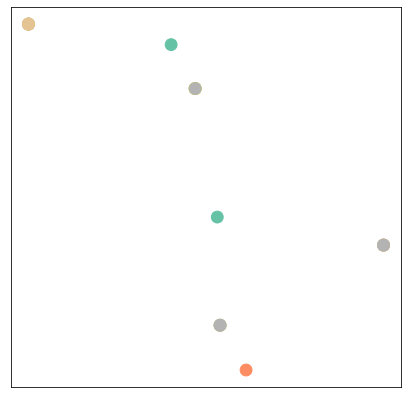

Embedding shape: [21, 128], 26frame


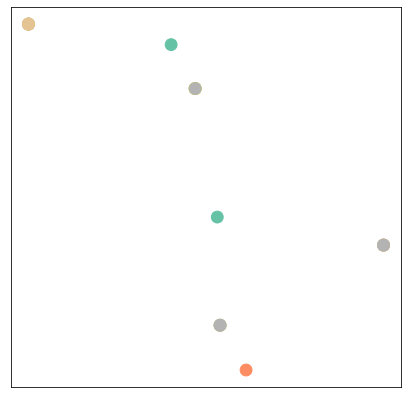

Embedding shape: [21, 128], 27frame


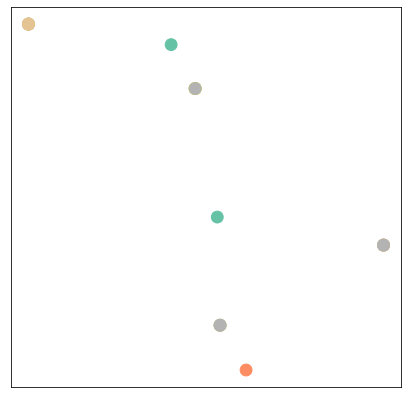

Embedding shape: [21, 128], 28frame


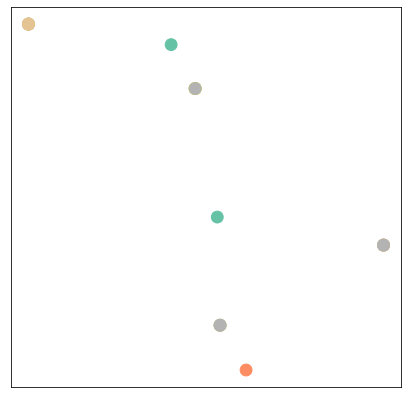

Embedding shape: [21, 128], 29frame


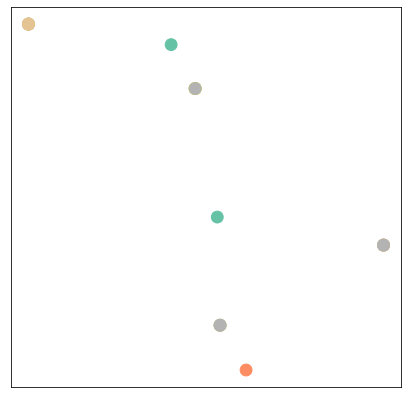

Embedding shape: [21, 128], 30frame


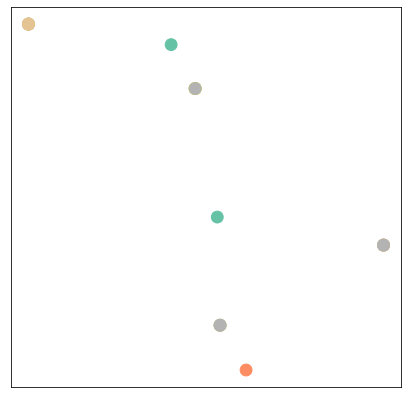

Embedding shape: [21, 128], 31frame


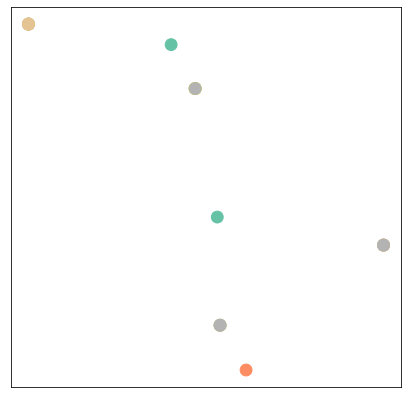

Embedding shape: [21, 128], 32frame


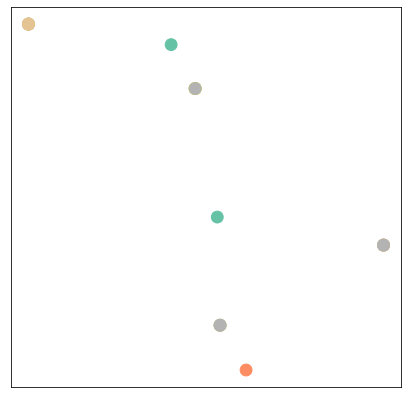

Embedding shape: [21, 128], 33frame


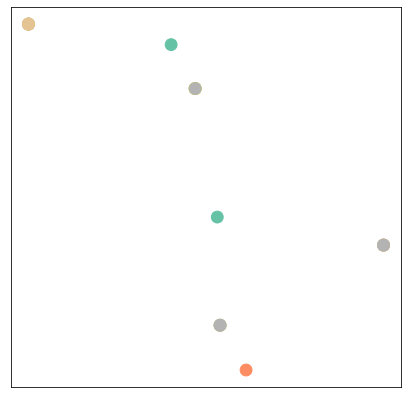

Embedding shape: [21, 128], 34frame


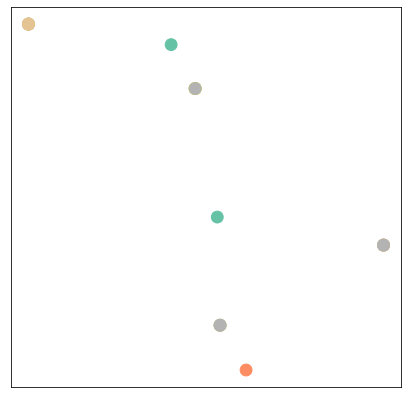

Embedding shape: [21, 128], 35frame


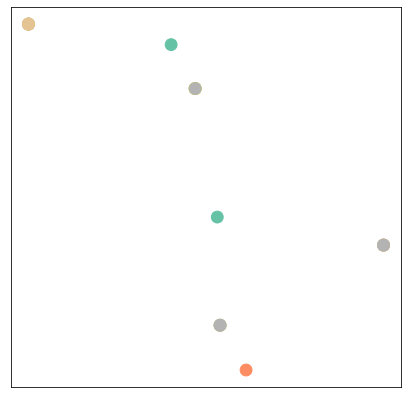

Embedding shape: [21, 128], 36frame


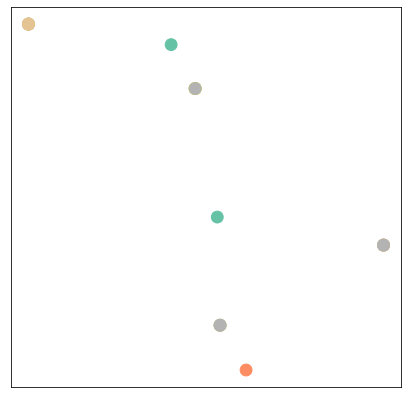

Embedding shape: [21, 128], 37frame


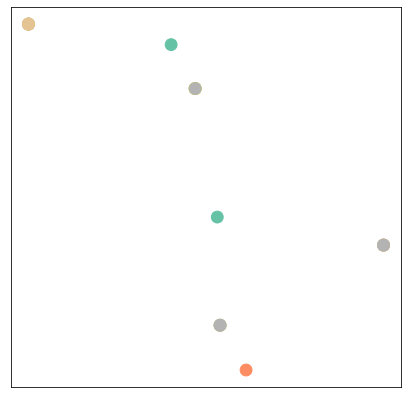

Embedding shape: [21, 128], 38frame


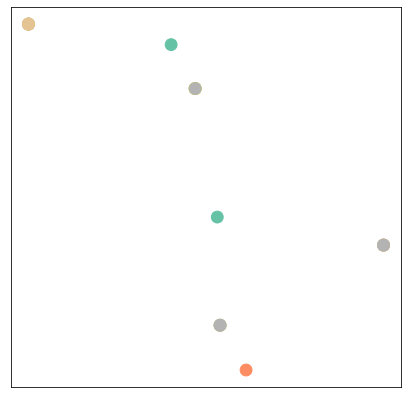

Embedding shape: [21, 128], 39frame


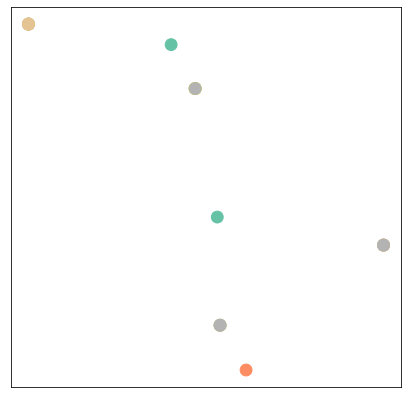

Embedding shape: [21, 128], 40frame


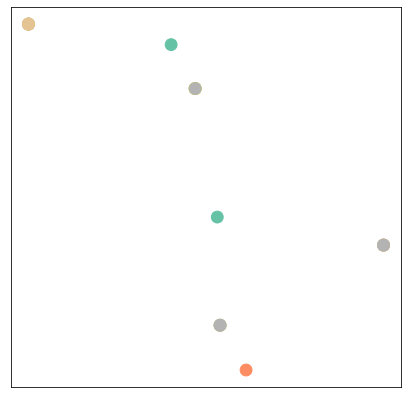

Embedding shape: [21, 128], 41frame


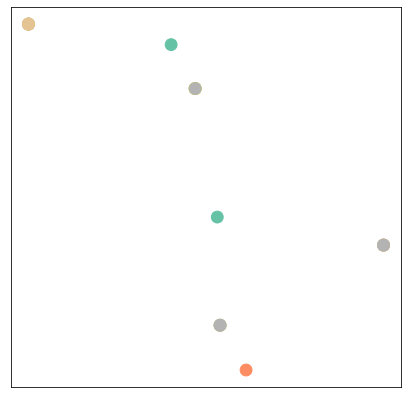

Embedding shape: [21, 128], 42frame


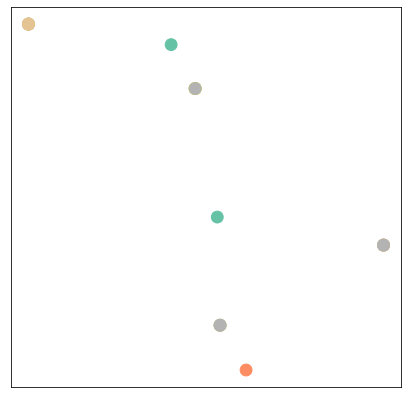

Embedding shape: [21, 128], 43frame


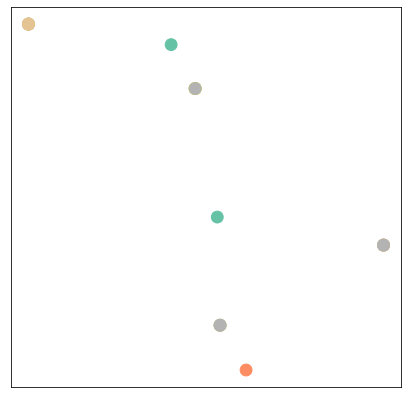

Embedding shape: [21, 128], 44frame


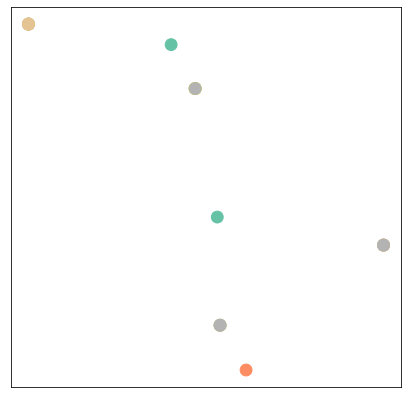

Embedding shape: [21, 128], 45frame


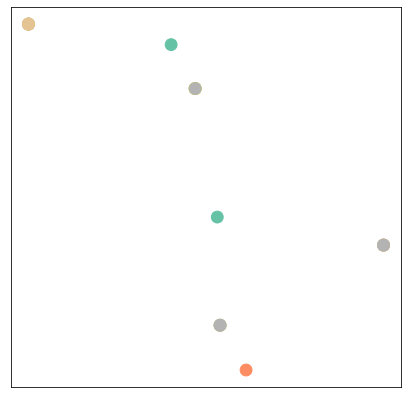

Embedding shape: [21, 128], 46frame


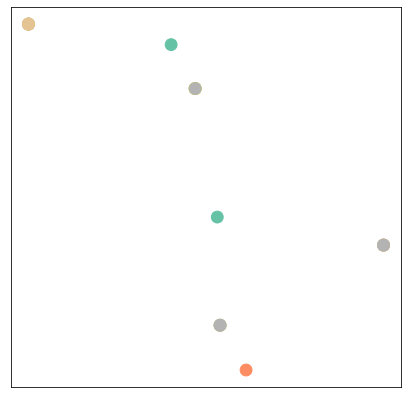

Embedding shape: [21, 128], 47frame


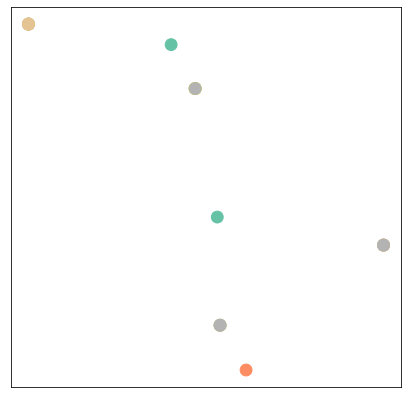

Embedding shape: [21, 128], 48frame


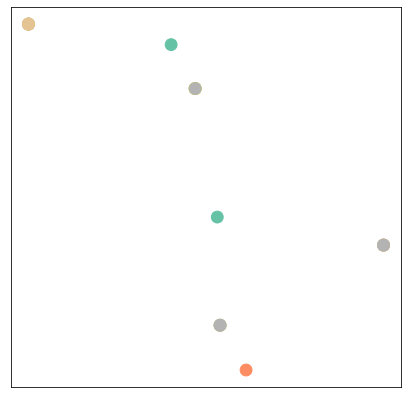

Embedding shape: [21, 128], 49frame


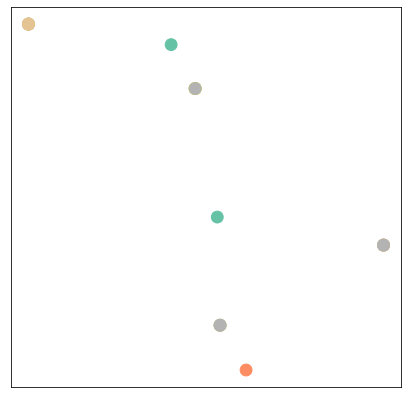

Embedding shape: [21, 128], 50frame


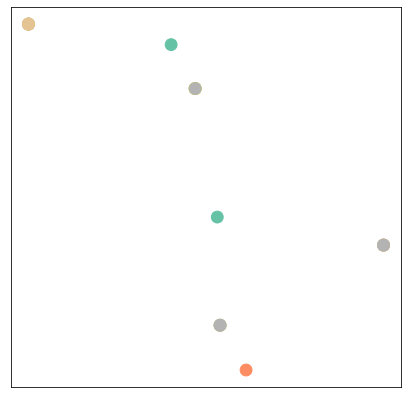

Embedding shape: [21, 128], 51frame


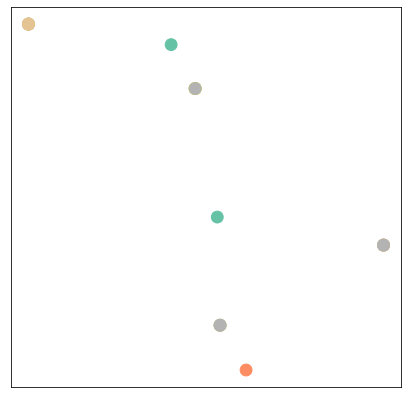

Embedding shape: [21, 128], 52frame


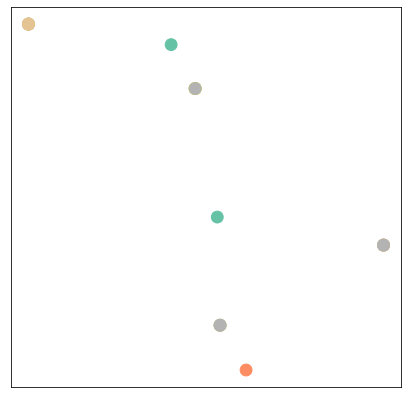

Embedding shape: [21, 128], 53frame


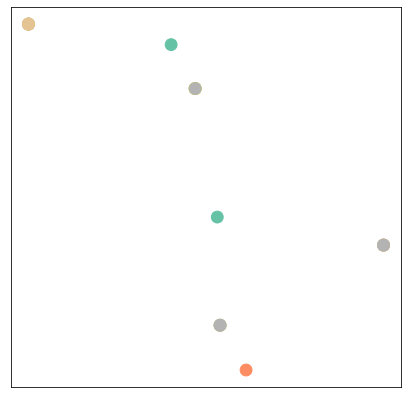

Embedding shape: [21, 128], 54frame


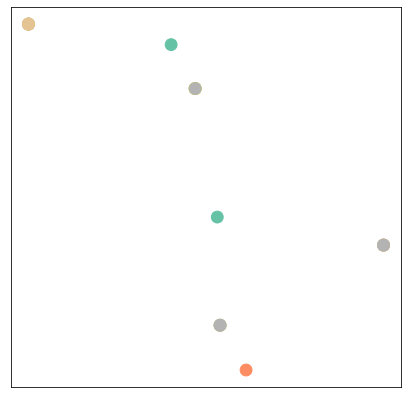

Embedding shape: [21, 128], 55frame


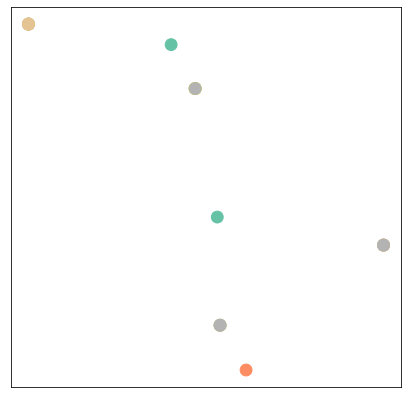

Embedding shape: [21, 128], 56frame


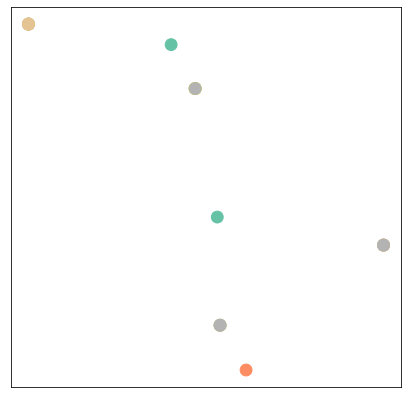

Embedding shape: [21, 128], 57frame


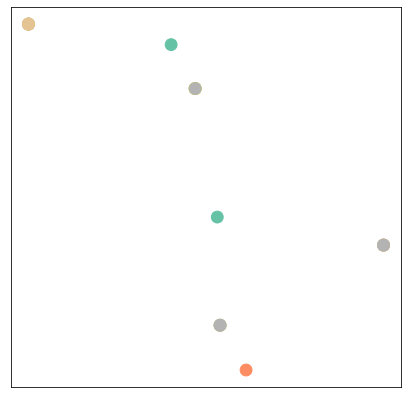

Embedding shape: [21, 128], 58frame


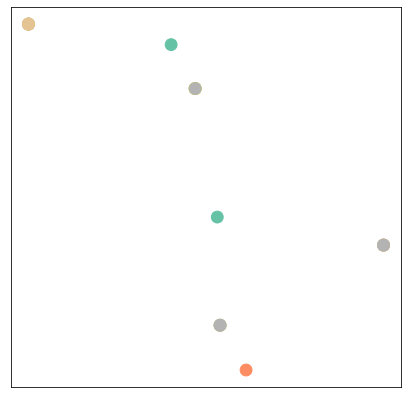

Embedding shape: [21, 128], 59frame


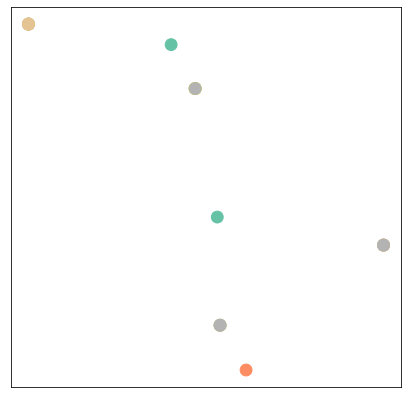

Embedding shape: [21, 128], 60frame


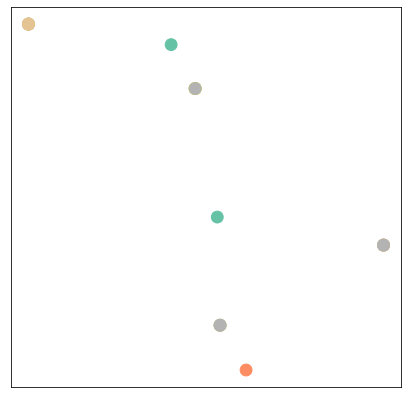

Embedding shape: [21, 128], 61frame


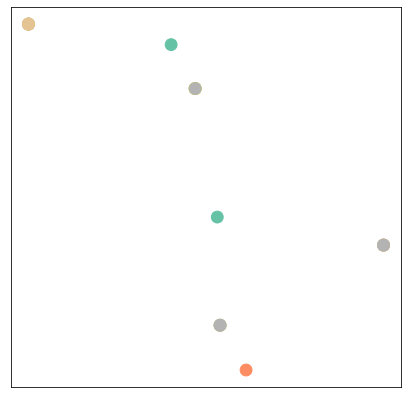

Embedding shape: [21, 128], 62frame


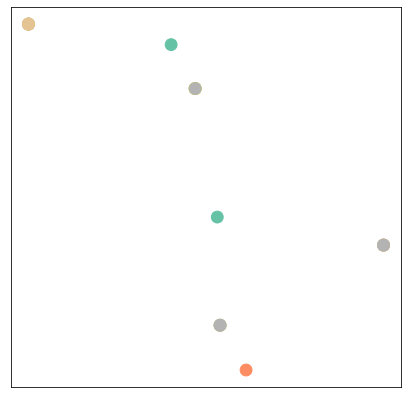

Embedding shape: [21, 128], 63frame


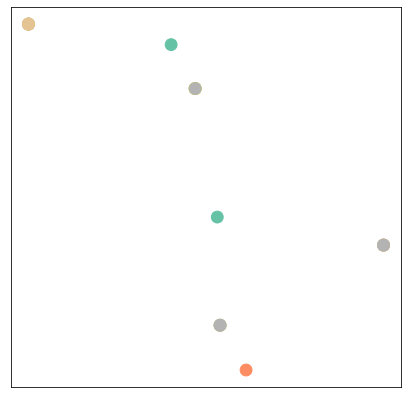

Embedding shape: [21, 128], 64frame


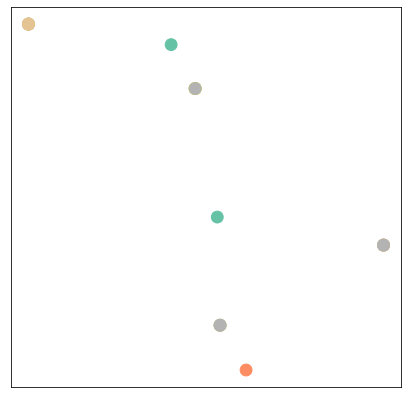

Embedding shape: [21, 128], 65frame


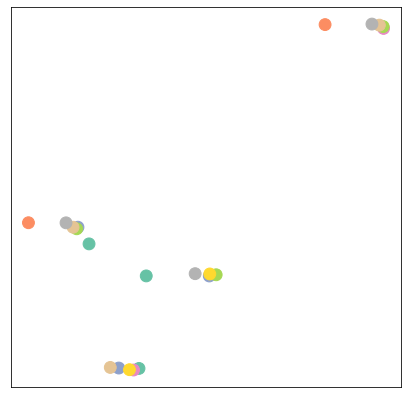

Embedding shape: [21, 128], 66frame


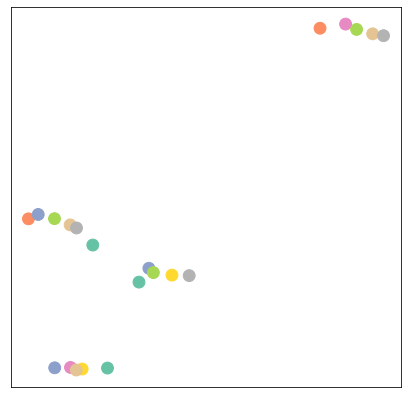

Embedding shape: [21, 128], 67frame


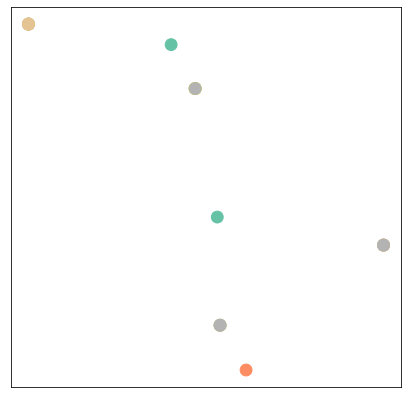

Embedding shape: [21, 128], 68frame


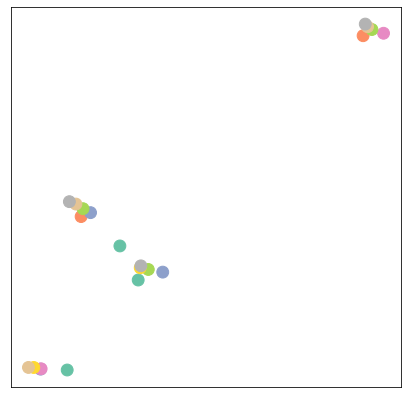

Embedding shape: [21, 128], 69frame


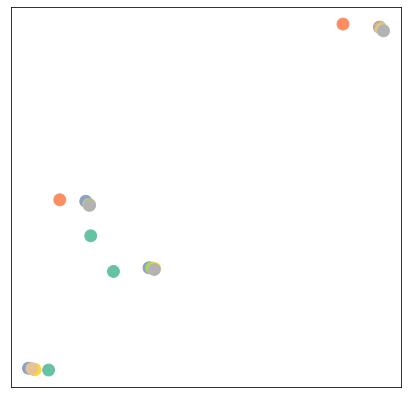

Embedding shape: [21, 128], 70frame


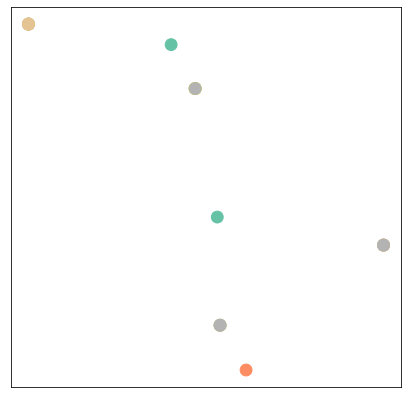

Embedding shape: [21, 128], 71frame


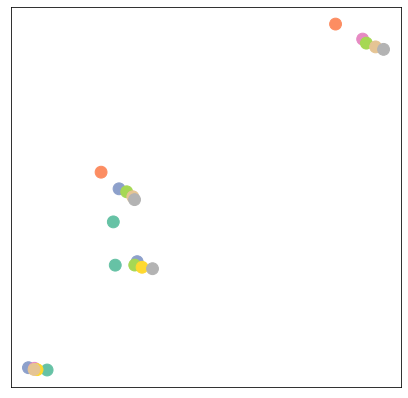

Embedding shape: [21, 128], 72frame


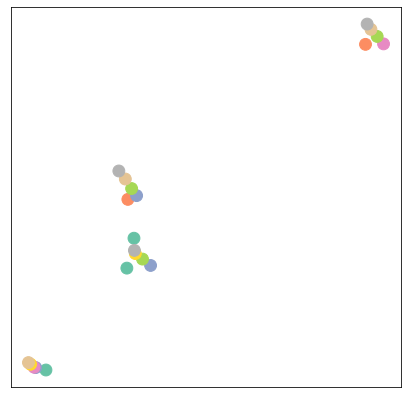

Embedding shape: [21, 128], 73frame


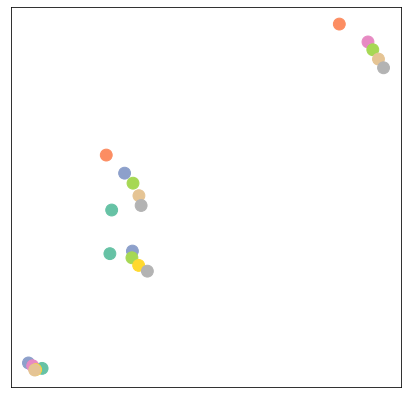

Embedding shape: [21, 128], 74frame


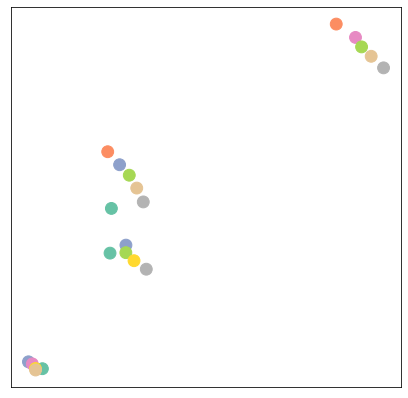

Embedding shape: [21, 128], 75frame


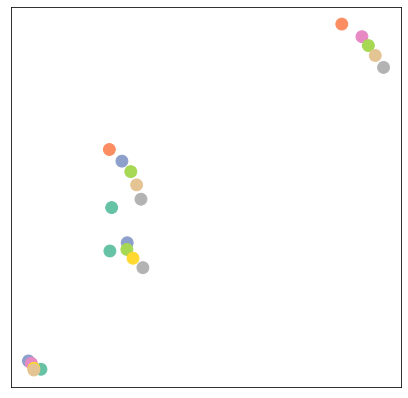

Embedding shape: [21, 128], 76frame


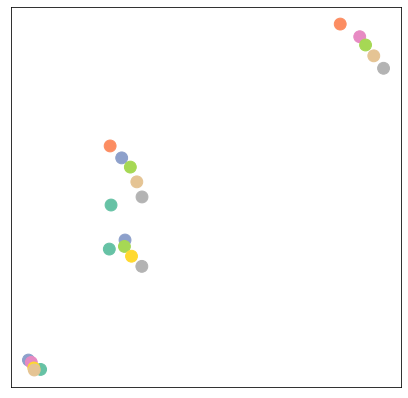

Embedding shape: [21, 128], 77frame


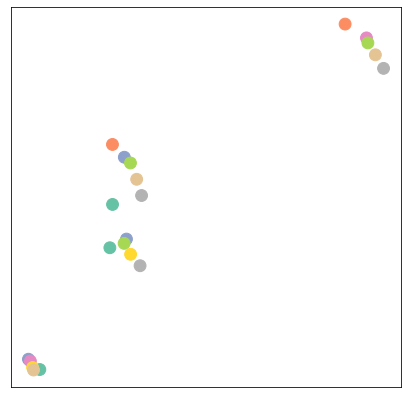

Embedding shape: [21, 128], 78frame


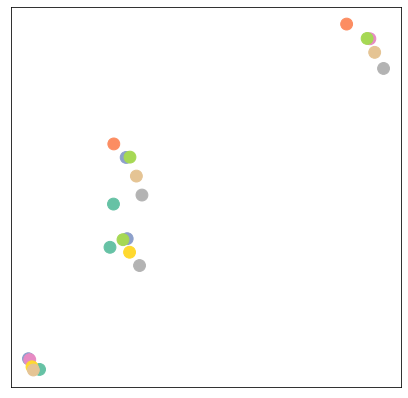

Embedding shape: [21, 128], 79frame


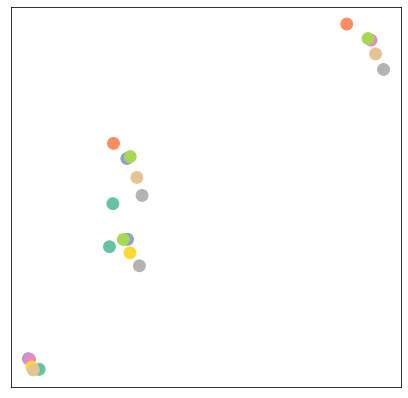

Embedding shape: [21, 128], 80frame


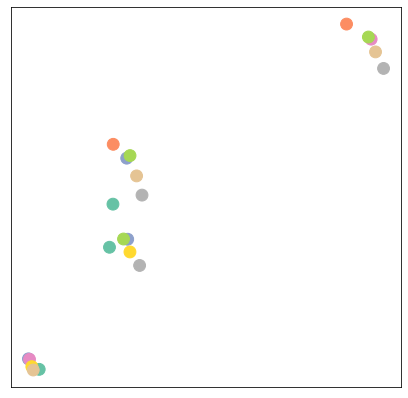

Embedding shape: [21, 128], 81frame


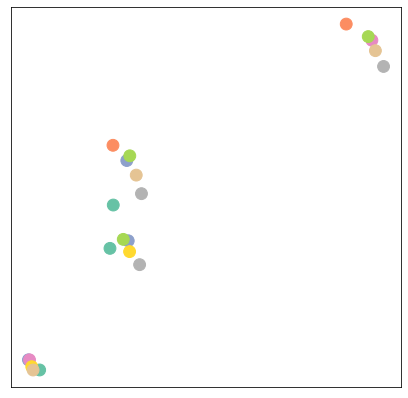

Embedding shape: [21, 128], 82frame


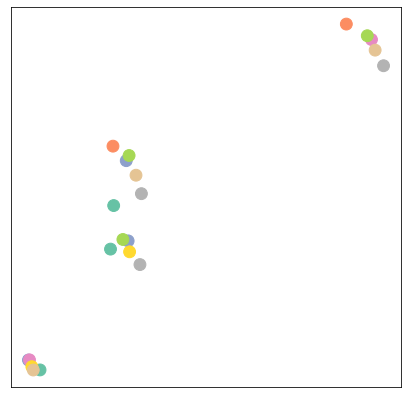

Embedding shape: [21, 128], 83frame


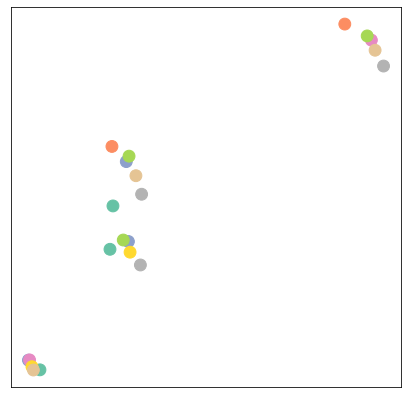

Embedding shape: [21, 128], 84frame


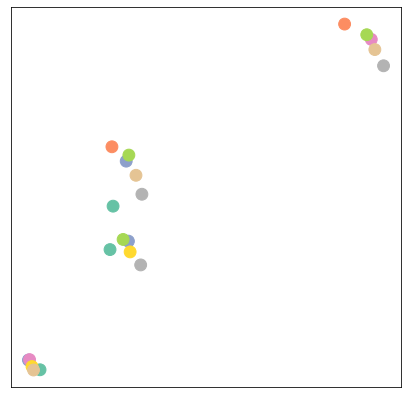

Embedding shape: [21, 128], 85frame


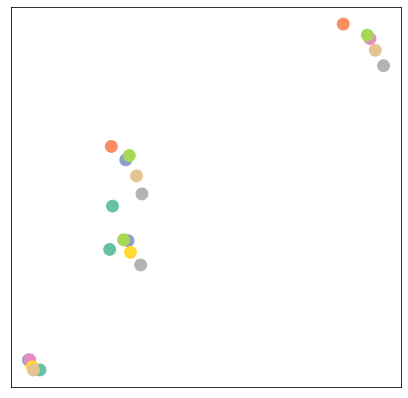

Embedding shape: [21, 128], 86frame


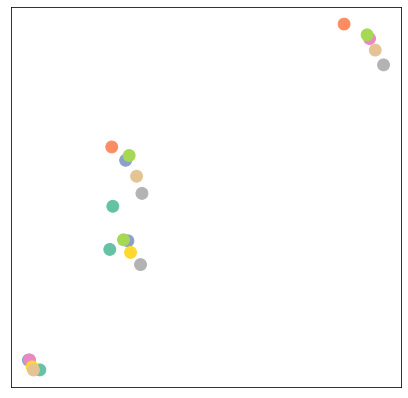

Embedding shape: [21, 128], 87frame


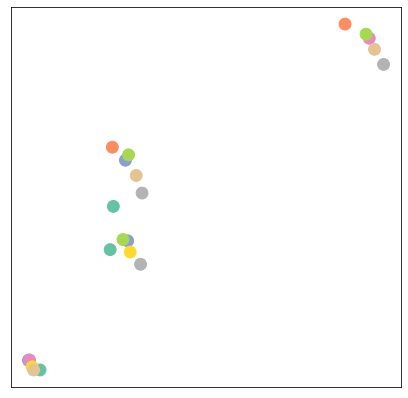

Embedding shape: [21, 128], 88frame


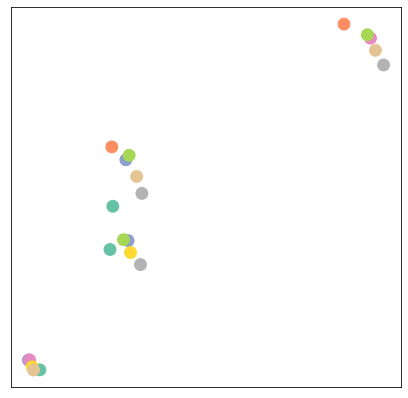

Embedding shape: [21, 128], 89frame


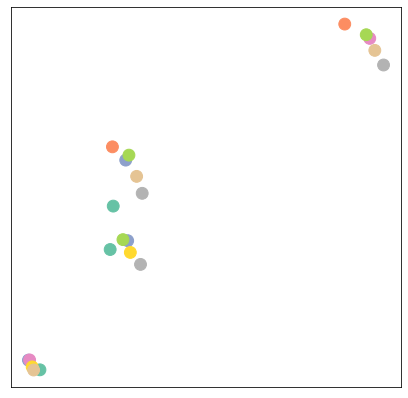

Embedding shape: [21, 128], 90frame


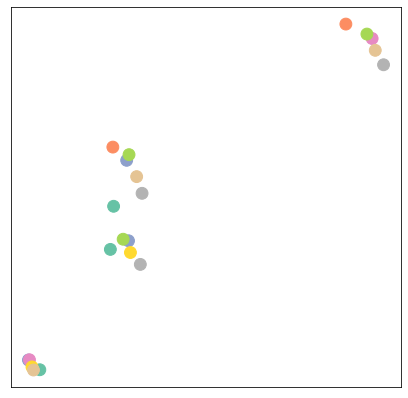

Embedding shape: [21, 128], 91frame


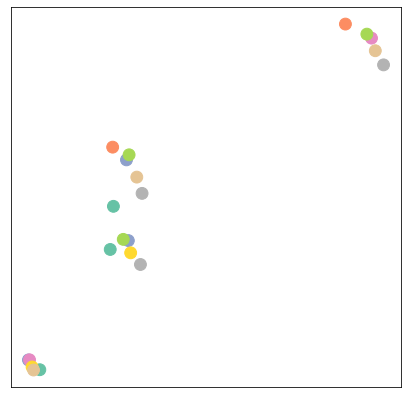

Embedding shape: [21, 128], 92frame


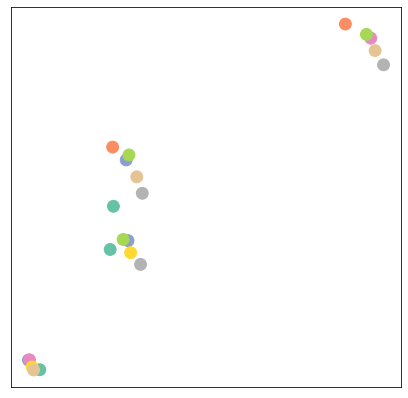

Embedding shape: [21, 128], 93frame


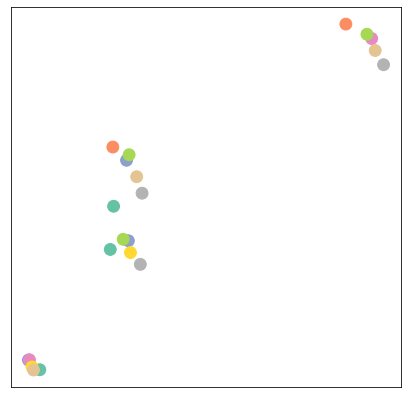

Embedding shape: [21, 128], 94frame


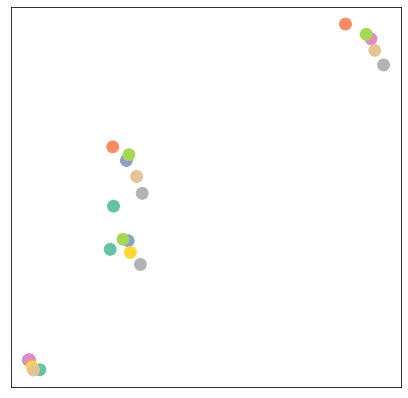

Embedding shape: [21, 128], 95frame


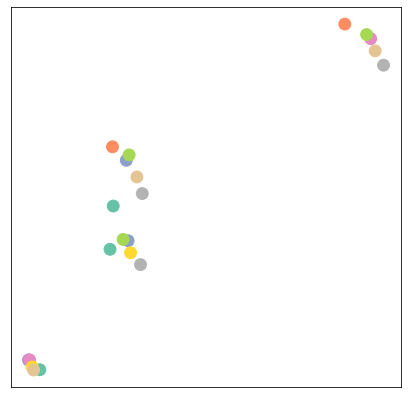

Embedding shape: [21, 128], 96frame


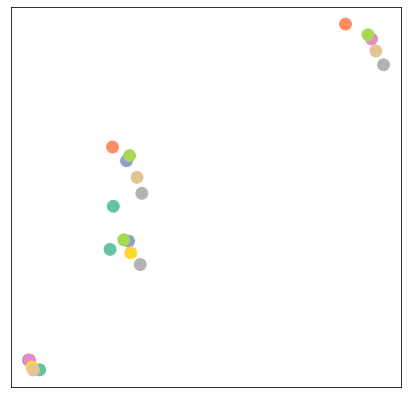

Embedding shape: [21, 128], 97frame


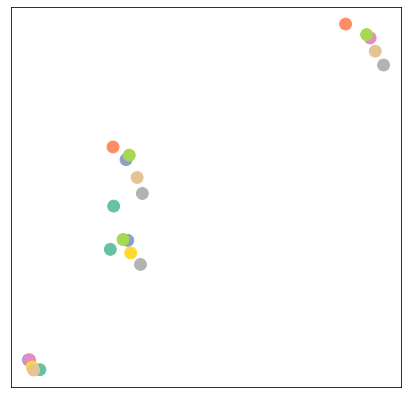

Embedding shape: [21, 128], 98frame


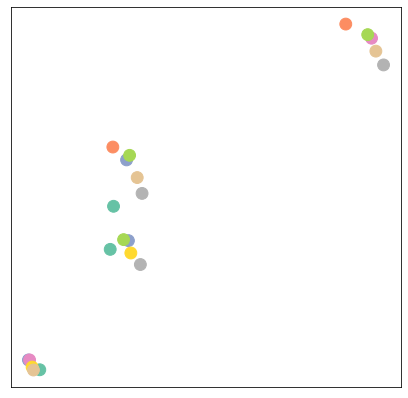

Embedding shape: [21, 128], 99frame


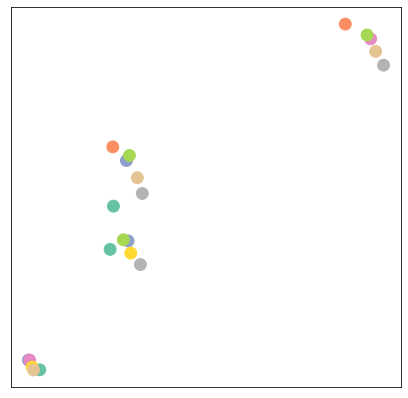

Embedding shape: [21, 128], 100frame


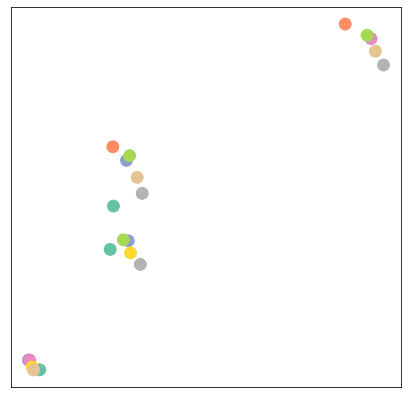

Embedding shape: [21, 128], 101frame


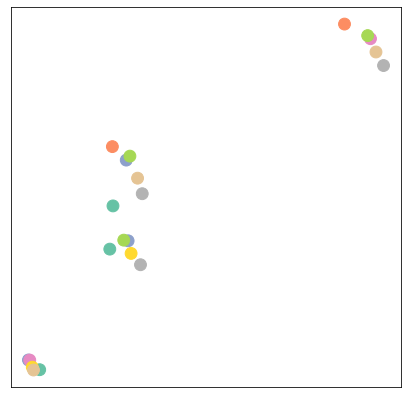

Embedding shape: [21, 128], 102frame


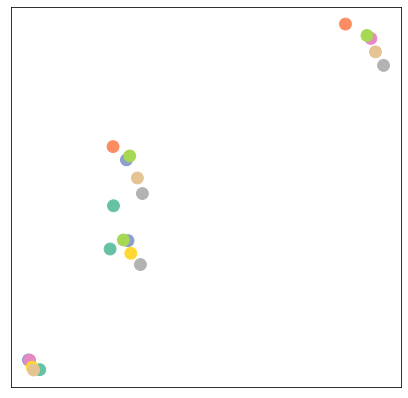

Embedding shape: [21, 128], 103frame


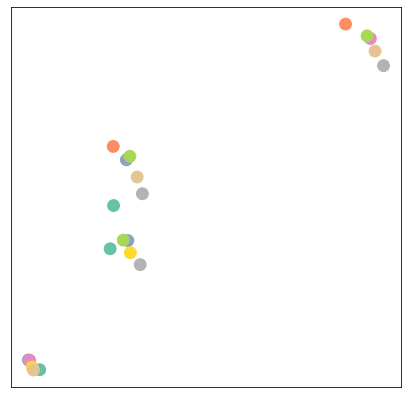

Embedding shape: [21, 128], 104frame


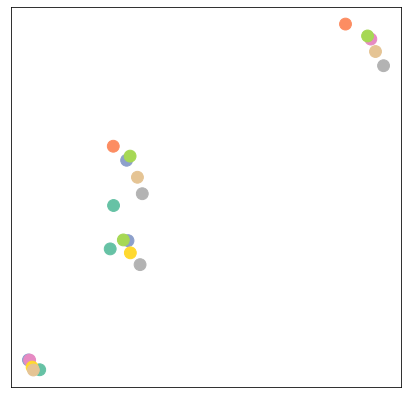

Embedding shape: [21, 128], 105frame


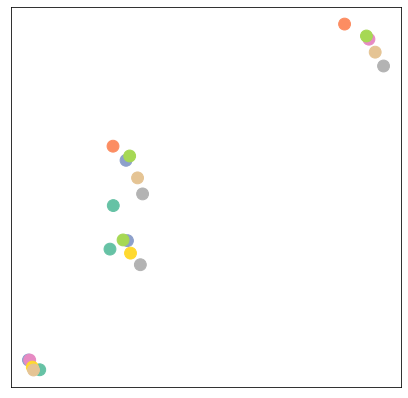

Embedding shape: [21, 128], 106frame


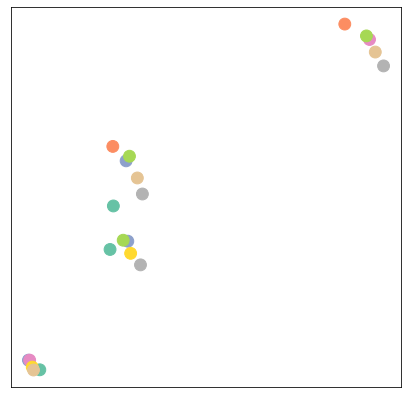

Embedding shape: [21, 128], 107frame


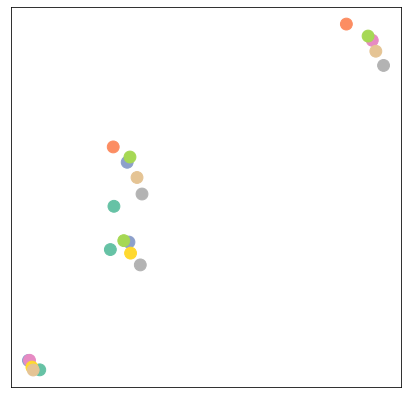

Embedding shape: [21, 128], 108frame


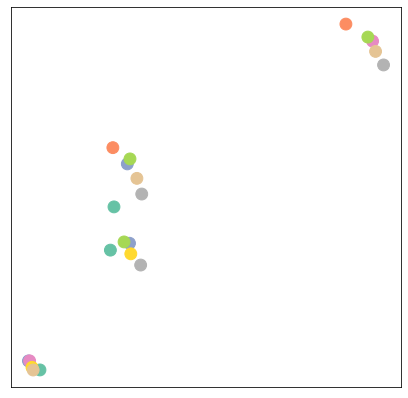

Embedding shape: [21, 128], 109frame


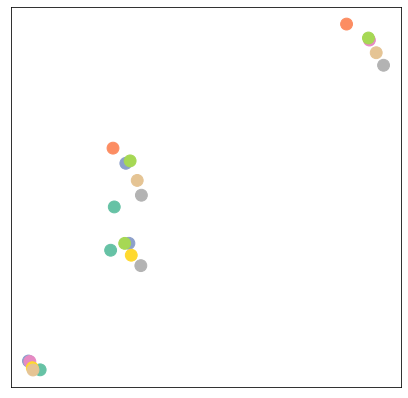

Embedding shape: [21, 128], 110frame


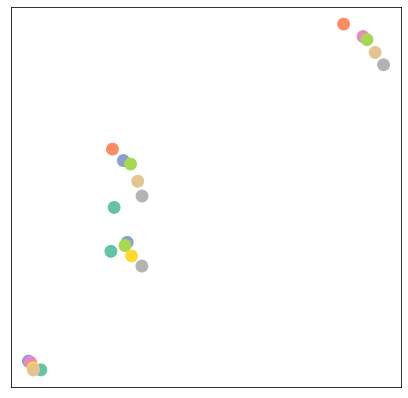

Embedding shape: [21, 128], 111frame


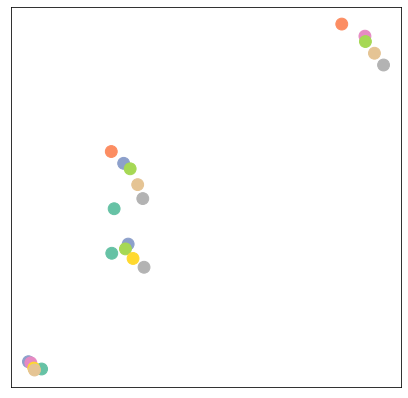

Embedding shape: [21, 128], 112frame


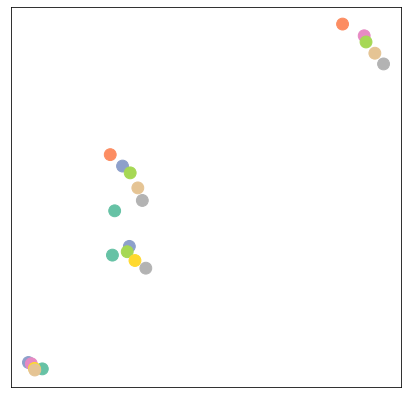

Embedding shape: [21, 128], 113frame


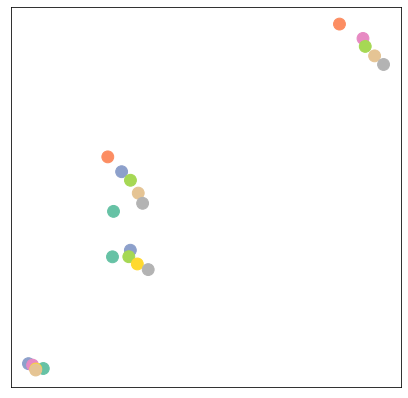

Embedding shape: [21, 128], 114frame


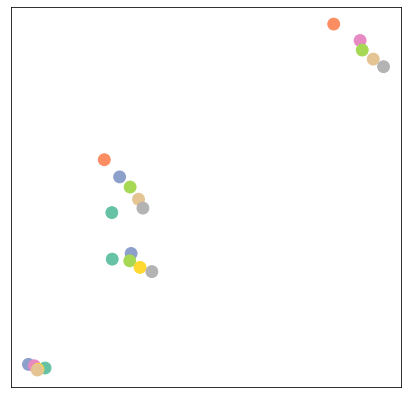

Embedding shape: [21, 128], 115frame


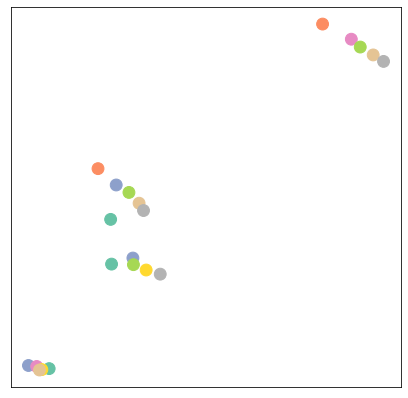

Embedding shape: [21, 128], 116frame


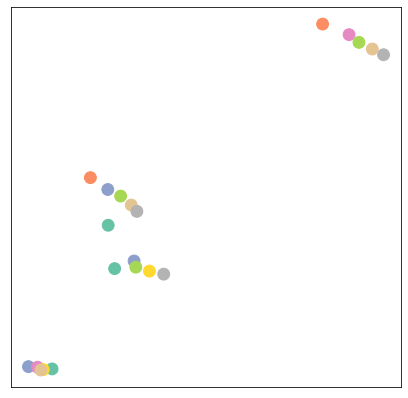

Embedding shape: [21, 128], 117frame


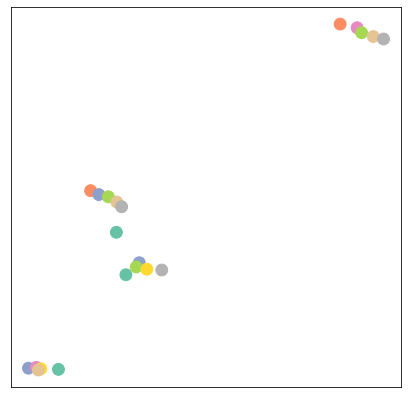

Embedding shape: [21, 128], 118frame


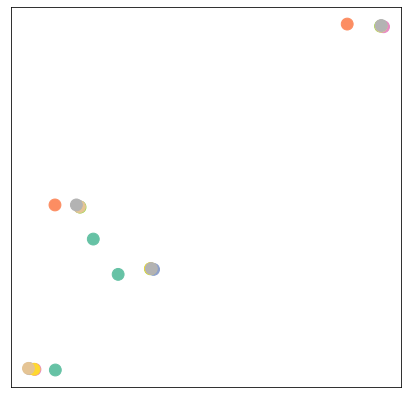

Embedding shape: [21, 128], 119frame


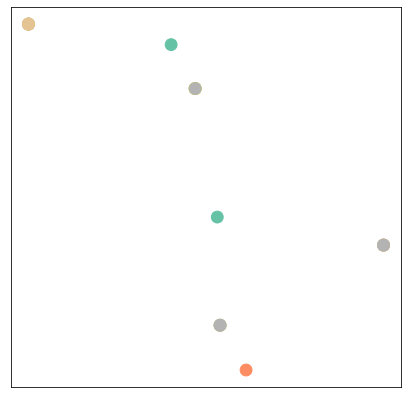

Embedding shape: [21, 128], 120frame


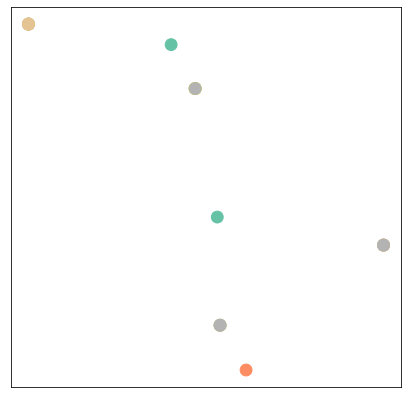

Embedding shape: [21, 128], 121frame


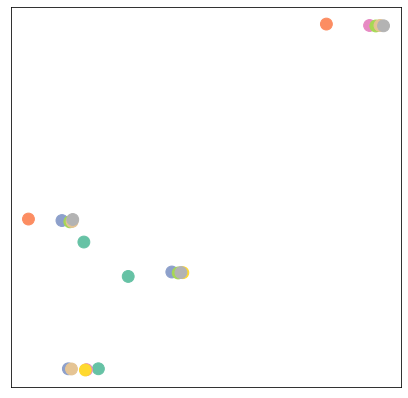

Embedding shape: [21, 128], 122frame


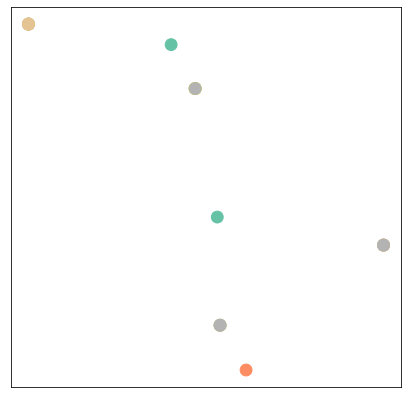

Embedding shape: [21, 128], 123frame


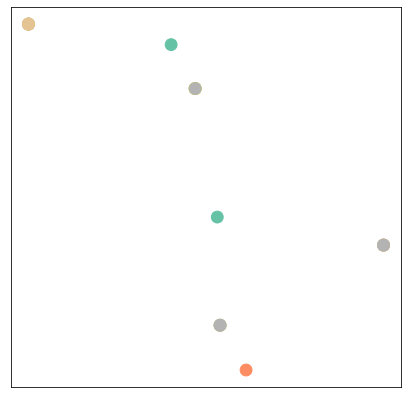

Embedding shape: [21, 128], 124frame


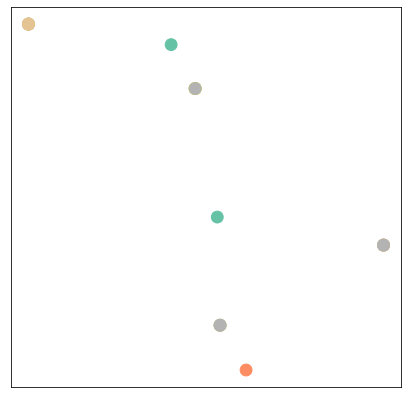

Embedding shape: [21, 128], 125frame


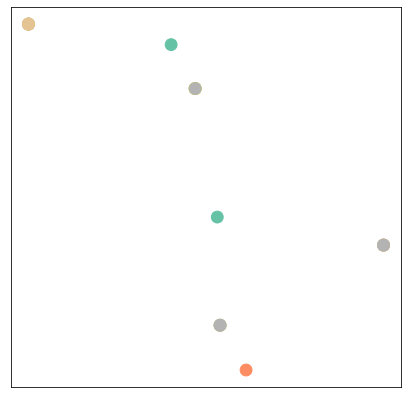

Embedding shape: [21, 128], 126frame


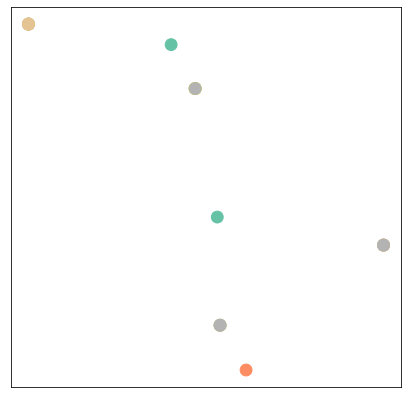

Embedding shape: [21, 128], 127frame


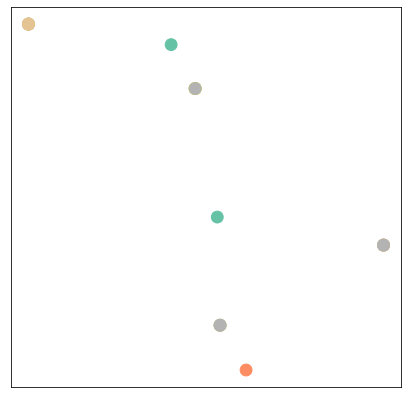

Embedding shape: [21, 128], 128frame


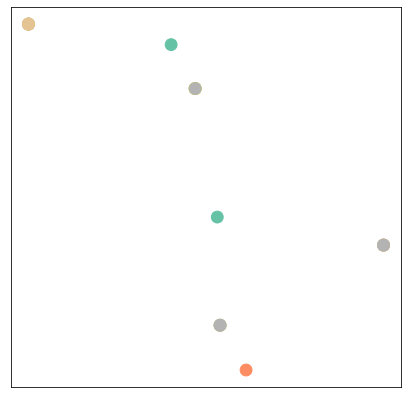

Embedding shape: [21, 128], 129frame


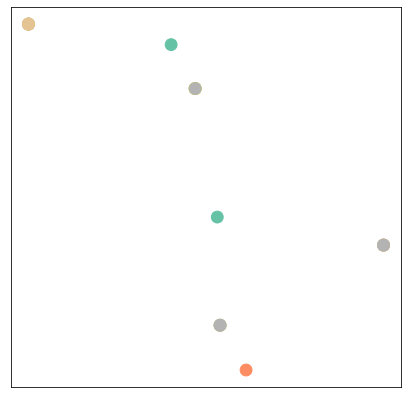

Embedding shape: [21, 128], 130frame


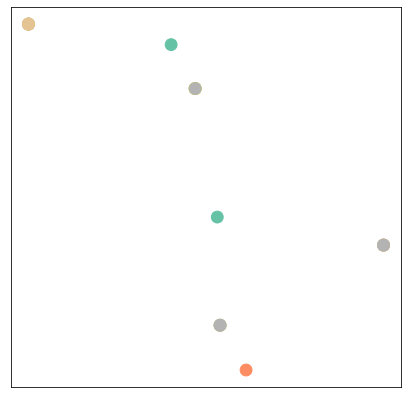

Embedding shape: [21, 128], 131frame


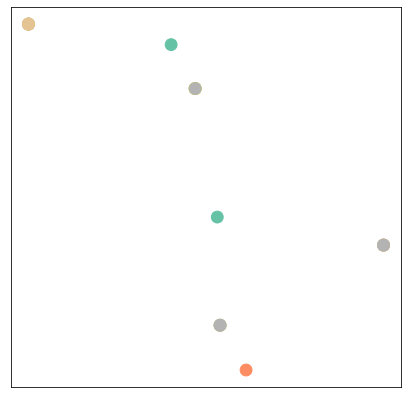

Embedding shape: [21, 128], 132frame


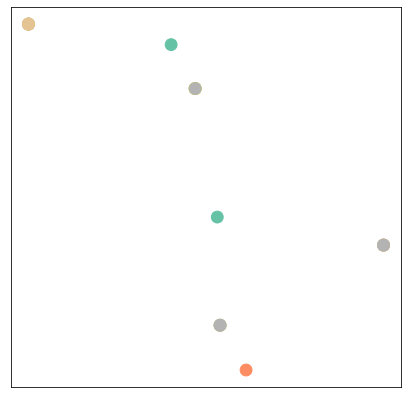

Embedding shape: [21, 128], 133frame


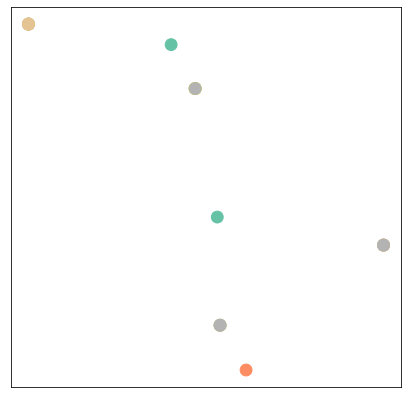

Embedding shape: [21, 128], 134frame


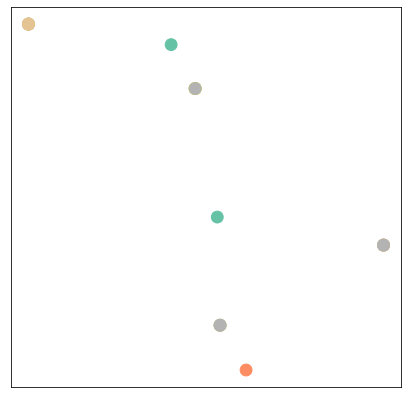

Embedding shape: [21, 128], 135frame


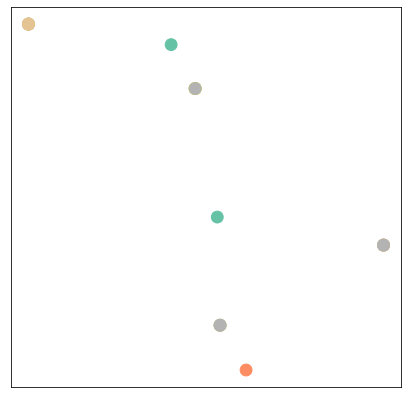

Embedding shape: [21, 128], 136frame


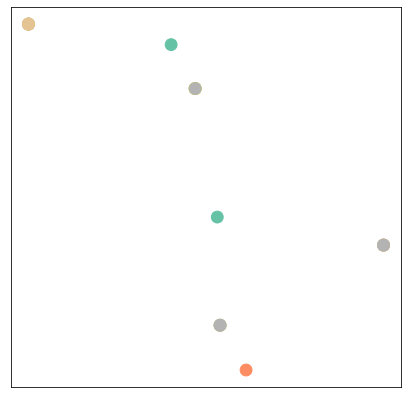

Embedding shape: [21, 128], 137frame


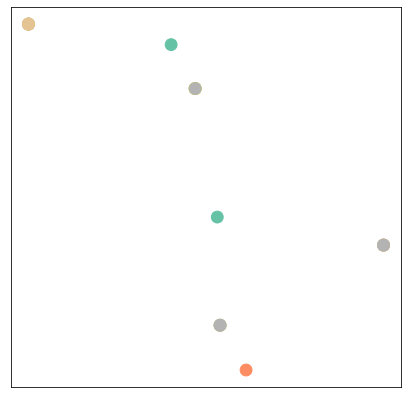

Embedding shape: [21, 128], 138frame


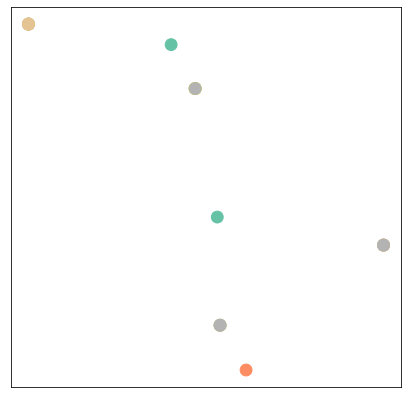

Embedding shape: [21, 128], 139frame


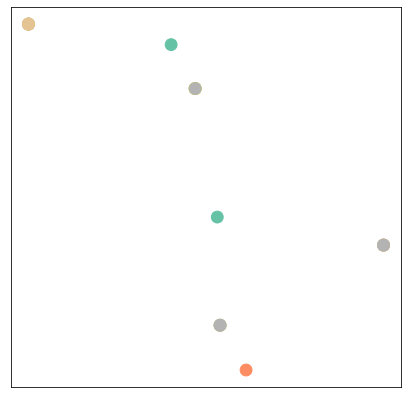

Embedding shape: [21, 128], 140frame


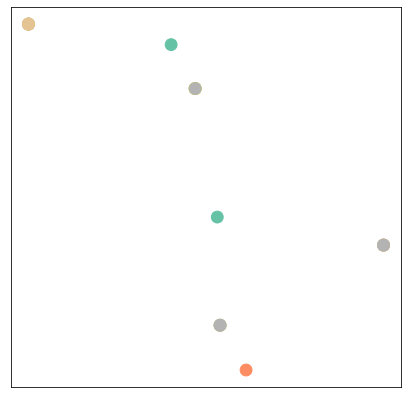

Embedding shape: [21, 128], 141frame


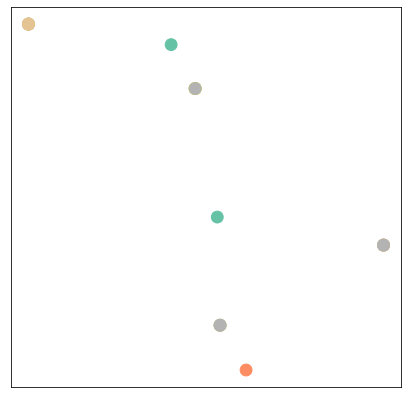

Embedding shape: [21, 128], 142frame


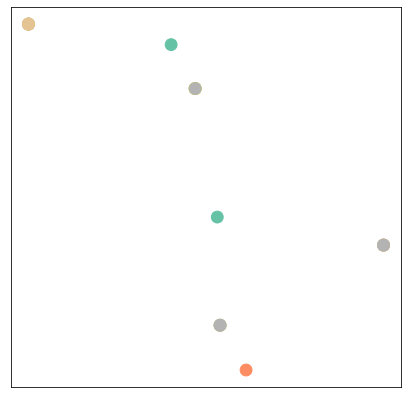

Embedding shape: [21, 128], 143frame


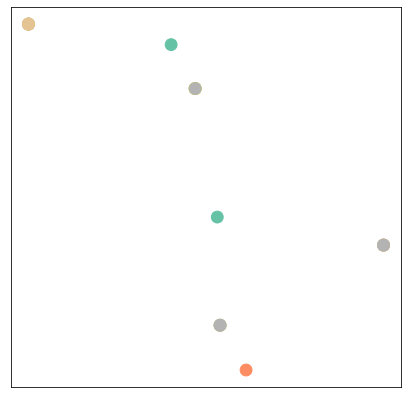

Embedding shape: [21, 128], 144frame


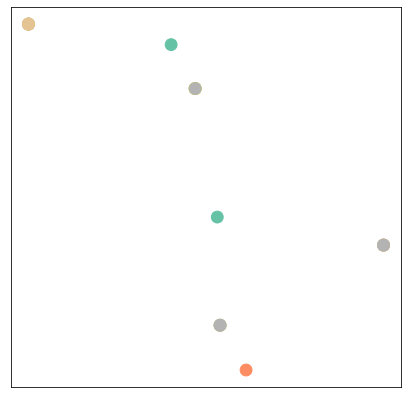

Embedding shape: [21, 128], 145frame


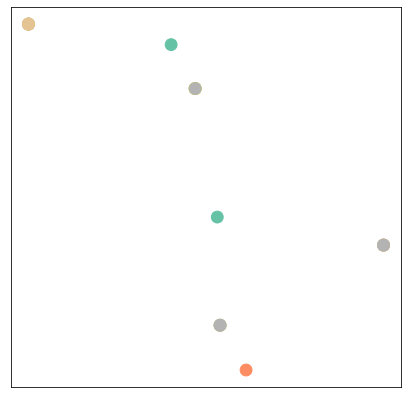

Embedding shape: [21, 128], 146frame


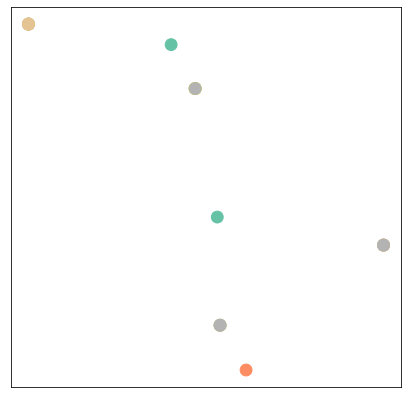

Embedding shape: [21, 128], 147frame


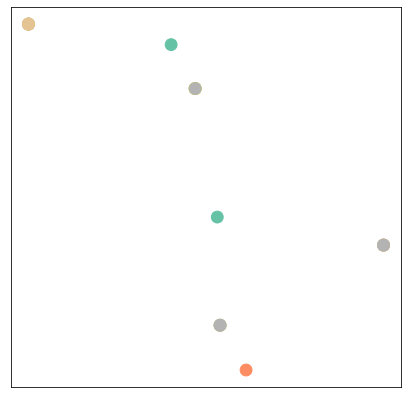

Embedding shape: [21, 128], 148frame


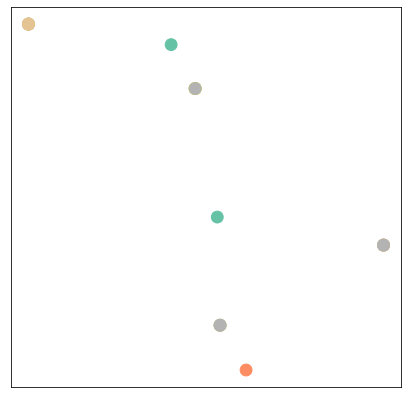

Embedding shape: [21, 128], 149frame


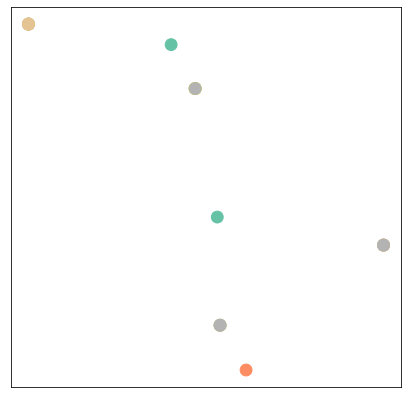

Embedding shape: [21, 128], 150frame


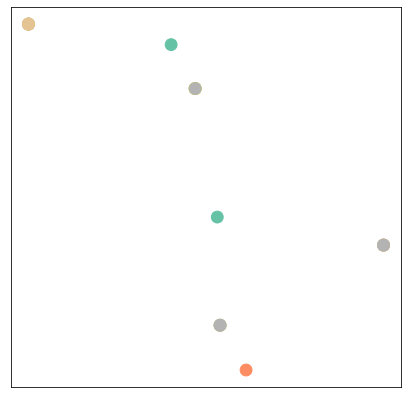

Embedding shape: [21, 128], 151frame


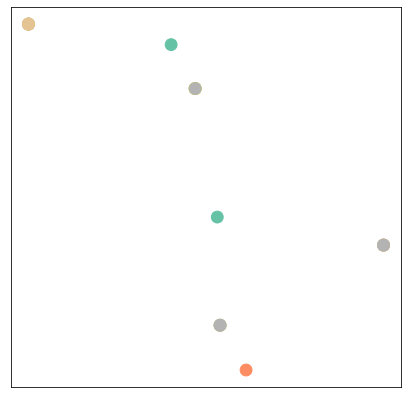

Embedding shape: [21, 128], 152frame


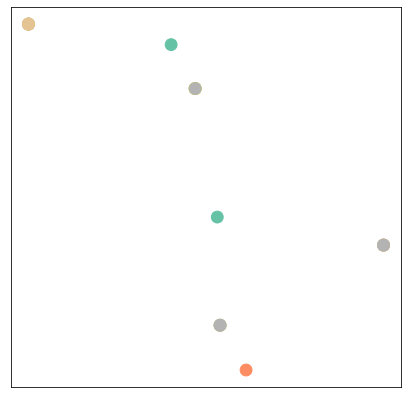

Embedding shape: [21, 128], 153frame


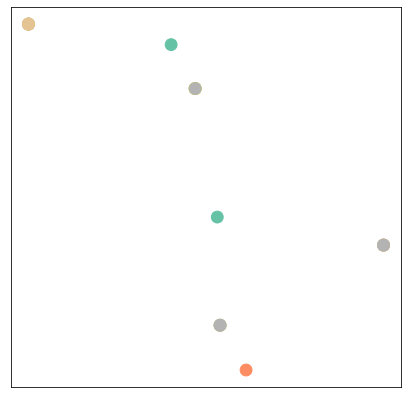

Embedding shape: [21, 128], 154frame


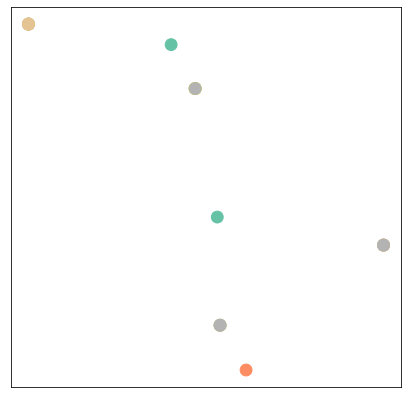

Embedding shape: [21, 128], 155frame


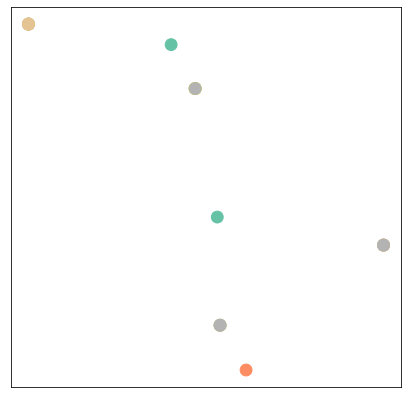

In [57]:
EmbededTensor = torch.FloatTensor()
for i in range(156):
  model = GCN(LeftHandTensor)
  LeftHandData = Data(x=LeftHandTensor[i],edge_index=TransposedHandEdge,y=HandY, train_mask = HandTrainMask)
  _, h = model(LeftHandData.x, LeftHandData.edge_index)
  torch.cat((EmbededTensor,h),0)
  print(f'Embedding shape: {list(h.shape)}, {i}frame')
  visualize(h, color=LeftHandData.y)

In [58]:
EmbededTensor = torch.cat((EmbededTensor,h),0)

In [59]:
EmbededTensor.shape

torch.Size([21, 128])

In [61]:
model = GCN(LeftHandTensor)
EVTensor = torch.FloatTensor()
for i in range(LeftHandTensor.shape[0]):
  _, h = model(LeftHandData.x, LeftHandData.edge_index)
  EVTensor = torch.cat([EVTensor,h],dim=0)
EVTensor = EVTensor.view([-1,42,64])

In [62]:
print(EVTensor.shape)

torch.Size([156, 42, 64])


In [134]:
from torch_geometric.nn.models.autoencoder import GAE, VGAE
import torch.nn.functional as F
from torch_geometric.utils import train_test_split_edges

In [135]:
GAE

torch_geometric.nn.models.autoencoder.GAE

In [136]:
class Encoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Encoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv2 = GCNConv(2 * out_channels, out_channels, cached=True)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)
#Auto Encoder의 Encoder

In [137]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [138]:
from torch_geometric.nn.models import InnerProductDecoder

In [160]:
LeftHandData = Data(x=LeftHandTensor[100],edge_index=TransposedHandEdge,y=HandY, train_mask = HandTrainMask)

In [161]:
data = train_test_split_edges(LeftHandData,val_ratio=0.2,test_ratio=0.2)

In [162]:
data

Data(test_neg_edge_index=[2, 4], test_pos_edge_index=[2, 4], train_mask=[21], train_neg_adj_mask=[21, 21], train_pos_edge_index=[2, 26], val_neg_edge_index=[2, 4], val_pos_edge_index=[2, 4], x=[21, 3], y=[21])

In [163]:
x = LeftHandTensor[100]
train_pos_edge_index = data.train_pos_edge_index

def train(epoch):
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    loss.backward()
    optimizer.step()

def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

In [164]:
y = torch.zeros(LeftHandTensor.shape[1],LeftHandTensor.shape[1])
y[range(LeftHandTensor.shape[1]),data.y] = 1
#one - hot encoding

In [165]:
data.y = y

In [195]:
out_channels = 64

In [196]:
model = GAE(Encoder(3,out_channels=out_channels))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 1001):
    train(epoch)
    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    if epoch % 10 == 0:
        print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))

Epoch: 010, AUC: 0.5000, AP: 0.7321
Epoch: 020, AUC: 0.5000, AP: 0.7321
Epoch: 030, AUC: 0.6875, AP: 0.7333
Epoch: 040, AUC: 0.5000, AP: 0.7321
Epoch: 050, AUC: 0.7500, AP: 0.7708
Epoch: 060, AUC: 0.7500, AP: 0.7708
Epoch: 070, AUC: 0.6875, AP: 0.7470
Epoch: 080, AUC: 0.7500, AP: 0.7708
Epoch: 090, AUC: 0.6875, AP: 0.7333
Epoch: 100, AUC: 0.7500, AP: 0.7708
Epoch: 110, AUC: 0.6875, AP: 0.7333
Epoch: 120, AUC: 0.6875, AP: 0.6458
Epoch: 130, AUC: 0.6250, AP: 0.7095
Epoch: 140, AUC: 0.8125, AP: 0.8542
Epoch: 150, AUC: 0.8125, AP: 0.8542
Epoch: 160, AUC: 0.6250, AP: 0.7095
Epoch: 170, AUC: 0.6875, AP: 0.7333
Epoch: 180, AUC: 0.8125, AP: 0.8542
Epoch: 190, AUC: 0.6875, AP: 0.7333
Epoch: 200, AUC: 0.8125, AP: 0.8542
Epoch: 210, AUC: 0.8125, AP: 0.8542
Epoch: 220, AUC: 0.7500, AP: 0.8167
Epoch: 230, AUC: 0.8750, AP: 0.9167
Epoch: 240, AUC: 0.8750, AP: 0.9167
Epoch: 250, AUC: 0.8750, AP: 0.9167
Epoch: 260, AUC: 0.6875, AP: 0.7333
Epoch: 270, AUC: 0.8125, AP: 0.8542
Epoch: 280, AUC: 0.8125, AP:

In [199]:
z = model.encode(x, train_pos_edge_index)

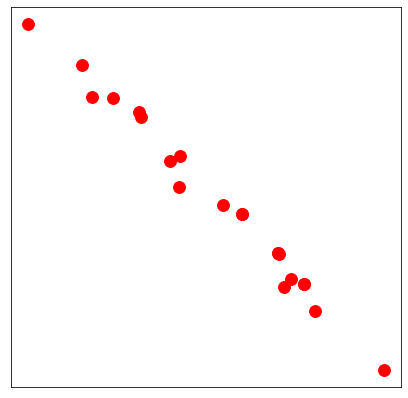

In [200]:
visualize(z)

In [201]:
z.shape

torch.Size([21, 64])